# TABLES

In [55]:
from IPython.display import IFrame 
IFrame("https://docs.google.com/spreadsheets/d/1TCbnBrarLlmono3MTRd9HVw_pfjopouK5D6-LTHiGYc/edit?usp=sharing", width = 1500, height = 800)

In [31]:
import pandas as pd
LinkData="https://docs.google.com/spreadsheets/d/1TCbnBrarLlmono3MTRd9HVw_pfjopouK5D6-LTHiGYc/export?format=csv"
educa = pd.read_csv(LinkData,
                          index_col=0)
educa

PRESUPUESTO   AÑO  CANTIDAD_SOLES
PROVINCIA                                  
ABANCAY           PIM  2015      31282478.0
ABANCAY           PIM  2019      38007071.0
ABANCAY           PIM  2023      46493901.0
ABANCAY           PIA  2015      24405446.0
ABANCAY           PIA  2019      31554750.0
...               ...   ...             ...
ZARUMILLA         PIA  2019      10583213.0
ZARUMILLA         PIA  2023      12477335.0
ZARUMILLA      Girado  2015       9006364.0
ZARUMILLA      Girado  2019      12216462.0
ZARUMILLA      Girado  2023      14515168.0

[1764 rows x 3 columns]

In [33]:
# some exploration
educa.describe().apply(lambda s: s.apply(lambda x: '{0:.5f}'.format(x) if isinstance(x, (int, float)) else x))

AÑO   CANTIDAD_SOLES
count  1764.00000       1551.00000
mean   2019.00000   25663054.27466
std       3.26691   22816671.00276
min    2015.00000          0.00000
25%    2015.00000   10900520.00000
50%    2019.00000   18520456.00000
75%    2023.00000   34266693.00000
max    2023.00000  151000000.00000

In [77]:
# exploring
educa.PRESUPUESTO.value_counts()

PRESUPUESTO
PIM       588
PIA       588
Girado    588
Name: count, dtype: int64

Better labels:

In [81]:
# exploring
educa.AÑO.value_counts(sort=False)

AÑO
2.015    588
2.019    588
2.023    588
Name: count, dtype: int64

Discretizing:

In [ ]:
binLimits=[0,15,50,110]
theLabels=["a_menor_a_16","b_entre_16y50","c_mayor_a_50"]
dengue["edad_grupos"]=pd.cut(dengue['edad'], include_lowest=True,
                                     bins=binLimits,
                                     labels=theLabels,
                                     ordered=True)

# see

dengue.head()

The surface:

In [ ]:
pd.crosstab( dengue.enfermedad_text,dengue.edad_grupos, dropna=False, normalize='columns')

In [ ]:
pd.crosstab(dengue.enfermedad_text,[dengue.sexo,dengue.edad_grupos], dropna=False, normalize='columns')

# Yearly look

In [3]:
# for colab
#!pip install altair_viewer
#!pip install vega
# # !pip install "vegafusion-jupyter[embed]"
!pip install jupyterlab
!jupyter labextension install @jupyterlab/vega5-extension


(Deprecated) Installing extensions with the jupyter labextension install command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 
C:\Users\LENOVO\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:56: UserWarning: An error occurred.
  warnings.warn("An error occurred.")
C:\Users\LENOVO\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:57: UserWarning: ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
  warnings.warn(msg[-1].strip())
C:\Users\LENOVO\anaconda3\Lib\site-packages\jupyterlab\debuglog.py:58: UserWarning: See the log file for details: C:\Users\LENOVO\AppData\Local\Temp\jupyterlab-debug-jufwae88.log
  warnings.warn(f"See 

In [27]:
print(educa.dtypes)


PRESUPUESTO        object
AÑO                 int32
CANTIDAD_SOLES    float64
dtype: object


In [29]:
# Rellenar valores nulos con 0 en CANTIDAD_SOLES
educa_grouped_filled = educa_grouped.fillna({'CANTIDAD_SOLES': 0})

# Verifica el resultado
print(educa_grouped_filled.head())


   AÑO PRESUPUESTO  CANTIDAD_SOLES
0    2      Girado    1.486001e+09
1    2         PIA    6.140000e+08
2    2         PIM    1.490001e+09


In [23]:
# Convertir la columna 'CANTIDAD_SOLES' a numérico, forzando la conversión
educa['CANTIDAD_SOLES'] = pd.to_numeric(educa['CANTIDAD_SOLES'], errors='coerce')

# Revisa si hay valores NaN en la columna
print(educa['CANTIDAD_SOLES'].isna().sum())



1709


In [49]:
import pandas as pd
import altair as alt

# Verificar si hay valores nulos en el DataFrame original
print(educa.isnull().sum())

# Asegurarse de que 'AÑO' sea de tipo entero y 'CANTIDAD_SOLES' sea numérico
educa['AÑO'] = educa['AÑO'].astype(int)
educa['CANTIDAD_SOLES'] = pd.to_numeric(educa['CANTIDAD_SOLES'], errors='coerce')

# Verificar los primeros registros después de la conversión
print(educa.head())

# Agrupar los datos por 'AÑO' y 'PRESUPUESTO', sumando las 'CANTIDAD_SOLES'
educa_grouped = educa.groupby(['AÑO', 'PRESUPUESTO'], as_index=False)['CANTIDAD_SOLES'].sum()

# Verificar el DataFrame agrupado
print(educa_grouped.head())

import altair as alt

chart = alt.Chart(educa_grouped).mark_line().encode(
    x='AÑO:O',  # Eje X con el año como ordinal (discreto)
    y='CANTIDAD_SOLES:Q',  # Eje Y con la suma de CANTIDAD_SOLES
    color='PRESUPUESTO:N'  # Diferenciar por tipo de presupuesto
).properties(
    width=500,  # Ancho del gráfico
    height=300  # Alto del gráfico (opcional)
)

# Mostrar el gráfico
chart



PRESUPUESTO         0
AÑO                 0
CANTIDAD_SOLES    213
dtype: int64
          PRESUPUESTO   AÑO  CANTIDAD_SOLES
PROVINCIA                                  
ABANCAY           PIM  2015      31282478.0
ABANCAY           PIM  2019      38007071.0
ABANCAY           PIM  2023      46493901.0
ABANCAY           PIA  2015      24405446.0
ABANCAY           PIA  2019      31554750.0
    AÑO PRESUPUESTO  CANTIDAD_SOLES
0  2015      Girado    3.332964e+09
1  2015         PIA    2.625579e+09
2  2015         PIM    3.368955e+09
3  2019      Girado    4.702782e+09
4  2019         PIA    3.964665e+09


alt.Chart(...)

In [51]:
import pandas as pd

# Asegúrate de que los datos estén en un DataFrame
df = educa_grouped.copy()  # Si ya tienes 'educa_grouped' o reemplázalo por el nombre de tu DataFrame

# Formatear la columna CANTIDAD_SOLES para mostrar con comas y 2 decimales
df['CANTIDAD_SOLES'] = df['CANTIDAD_SOLES'].apply(lambda x: "{:,.2f}".format(x))

# Mostrar la tabla de manera bonita en Jupyter
import IPython.display as display
display.display(df)


AÑO PRESUPUESTO    CANTIDAD_SOLES
0  2015      Girado  3,332,963,634.00
1  2015         PIA  2,625,578,553.00
2  2015         PIM  3,368,954,900.00
3  2019      Girado  4,702,782,102.00
4  2019         PIA  3,964,664,578.00
5  2019         PIM  4,797,768,941.00
6  2023      Girado  5,971,830,257.00
7  2023         PIA  5,014,793,805.00
8  2023         PIM  6,024,060,410.00

In [103]:
import pandas as pd
LinkData2="https://docs.google.com/spreadsheets/d/1y1DUTVrzaxPX5AljWyUzmiylB38cdy75Ic4iygHQRWA/export?format=csv"
educa2 = pd.read_csv(LinkData2,
                          index_col=0)
educa2

2012_P     2013_P     2014_P     2015_P     2016_P  \
DEPARTAMENTO                                                           
AMAZONAS        91061070   99067749  112928803  124327885  139121063   
ANCASH         168399143  184797366  225992110  236172272  246003532   
APURIMAC        88373481  116305321  124555724  141662130  141897718   
AREQUIPA       114403831  129498364  136322939  158733686  161601367   
AYACUCHO       142502357  167235992  179442842  214631631  215382144   
CAJAMARCA      279053974  324430677  351722382  392647444  424654670   
CUSCO          210101595  232164000  249471757  293032439  306487093   
HUANCAVELICA    92253444  113081657  157962136  144497028  151388144   
HUANUCO        160095194  173203174  174615778  196090867  211535970   
ICA             80119748   93976211   99004362  117180308  131645162   
JUNIN          168806111  191844881  212109507  224565061  242986306   
LA LIBERTAD    220589567  251582044  273229654  292482694  303864221   
LAMBAYEQUE     115201842  127983106  144091845  161091431  179722300   
LORETO         177733471  179953188  211998288  270591652  286280347   
MADRE DE DIOS   30219133   22145352   32620468   41776511   37531238   
MOQUEGUA        30210220   41633985   41673863   45236424   53578868   
PASCO           58598093   67118223   65131883   73551028   77136246   
PIURA          194812229  209711035  240334610  289303240  308585662   
PUNO           202415452  251101499  255553079  287672121  300651787   
SAN MARTIN     125079813  138958093  163918217  206085894  217147371   
TACNA           50094912   47620504   41804293   47266641   46856870   
TUMBES          29298212   33082471   37016236   40388941   42421881   
UCAYALI         66122564   68331686   79157833   89764440  146415978   
LIMA           126918538  147121282  152675665  160569115  160344191   
CALLAO          72562333   68646421   81813584   80542242   80708109   

                  2017_P     2018_P     2019_P     2020_P     2021_P  \
DEPARTAMENTO                                                           
AMAZONAS       163716383  197403983  213419757  225965780  236026019   
ANCASH         280334571  295983673  343828607  366125459  371443990   
APURIMAC       160528606  182190064  192056796  189992994  202082069   
AREQUIPA       181785957  191641514  213015717  225655210  239996604   
AYACUCHO       238234587  246096814  254265032  269426834  268303133   
CAJAMARCA      499399794  510741341  535286728  583959158  634810593   
CUSCO          337753250  350674773  351921469  364912349  394706754   
HUANCAVELICA   170806880  175955172  195121900  188068096  189945154   
HUANUCO        244737145  260529622  256463468  268704404  286389597   
ICA            160966191  134353413  149076075  146403184  156593211   
JUNIN          281672415  304707946  326583541  333456320  362715110   
LA LIBERTAD    343048069  367003272  404079416  437250902  475092011   
LAMBAYEQUE     195047490  193873604  228018162  249371560  251091025   
LORETO         352156207  363076368  422064458  207177640  211331270   
MADRE DE DIOS   47949080   48757441   53540635  455322299  422904191   
MOQUEGUA        51122840   49554833   49956216   38851725   45585782   
PASCO           80284871   88191299   97853623   48051340   50967417   
PIURA          338239437  364760551  394472357  103699028  106536351   
PUNO           332805341  354921412  395951017  412430169  467105579   
SAN MARTIN     243438173  249999324  262565040  393749965  418044760   
TACNA           51723567   53468674   61093986  276802737  296798190   
TUMBES          59292572   61395848   67509206   64287523   65572418   
UCAYALI        159966529  152686616  162467872   65092689   68452914   
LIMA           178016036  195375405  214827324  162399908  185889895   
CALLAO          90175349   99692435  107663422  116340013  131004903   

                  2022_P     2023_P     2024_P  
DEPARTAMENTO                                    
AMAZONAS       254229551  2481

In [105]:
# Supongamos que 'educa2' es tu dataframe

# Agregar el presupuesto total por cada departamento
indexList = ['DEPARTAMENTO']
aggregator = {col: 'sum' for col in educa2.columns if '_P' in col}  # Agrega todos los presupuestos

ByYearDepa = educa2.groupby(indexList).agg(aggregator)

# Convertir de formato largo a formato ancho
ByYearDepa_wide = ByYearDepa.fillna(0)

# Calcular la proporción del presupuesto de cada año sobre el total de cada departamento
ByYearDepaShare = ByYearDepa_wide.div(ByYearDepa_wide.sum(axis=1), axis=0)

# Renombrar la serie para que sea más entendible
ByYearDepaShare.name = 'budgetShare'

# Restablecer el índice
ByYearDepaShare = ByYearDepaShare.reset_index()

ByYearDepaShare



DEPARTAMENTO    2012_P    2013_P    2014_P    2015_P    2016_P    2017_P  \
0        AMAZONAS  0.038275  0.041640  0.047466  0.052258  0.058476  0.068813   
1          ANCASH  0.042069  0.046165  0.056457  0.059000  0.061456  0.070032   
2        APURIMAC  0.039886  0.052492  0.056216  0.063937  0.064043  0.072452   
3        AREQUIPA  0.043790  0.049568  0.052180  0.060758  0.061856  0.069582   
4        AYACUCHO  0.045580  0.053491  0.057396  0.068651  0.068891  0.076201   
5       CAJAMARCA  0.041580  0.048342  0.052408  0.058506  0.063276  0.074413   
6          CALLAO  0.051123  0.048364  0.057640  0.056745  0.056862  0.063532   
7           CUSCO  0.046784  0.051697  0.055551  0.065251  0.068247  0.075209   
8    HUANCAVELICA  0.041474  0.050837  0.071014  0.064960  0.068058  0.076788   
9         HUANUCO  0.050008  0.054103  0.054544  0.061252  0.066077  0.076448   
10            ICA  0.043210  0.050683  0.053395  0.063197  0.070999  0.086812   
11          JUNIN  0.042429  0.048219  0.053313  0.056443  0.061073  0.070797   
12    LA LIBERTAD  0.044209  0.050421  0.054759  0.058618  0.060899  0.068752   
13     LAMBAYEQUE  0.042902  0.047662  0.053661  0.059992  0.066930  0.072637   
14           LIMA  0.051237  0.059393  0.061636  0.064822  0.064731  0.071866   
15         LORETO  0.048019  0.048619  0.057277  0.073107  0.077346  0.095144   
16  MADRE DE DIOS  0.013564  0.009940  0.014642  0.018752  0.016846  0.021522   
17       MOQUEGUA  0.044380  0.061162  0.061220  0.066454  0.078709  0.075101   
18          PASCO  0.062058  0.071081  0.068977  0.077893  0.081690  0.085025   
19          PIURA  0.058693  0.063182  0.072408  0.087161  0.092971  0.101905   
20           PUNO  0.041140  0.051036  0.051941  0.058469  0.061107  0.067642   
21     SAN MARTIN  0.033769  0.037516  0.044255  0.055640  0.058626  0.065724   
22          TACNA  0.026921  0.025591  0.022466  0.025401  0.025181  0.027796   
23         TUMBES  0.037518  0.042364  0.047401  0.051720  0.054323  0.075927   
24        UCAYALI  0.045555  0.047077  0.054535  0.061842  0.100872  0.110208   

      2018_P    2019_P    2020_P    2021_P    2022_P    2023_P    2024_P  
0   0.082973  0.089705  0.094978  0.099207  0.106858  0.104284  0.115067  
1   0.073942  0.085894  0.091464  0.092793  0.099923  0.107491  0.113315  
2   0.082228  0.086681  0.085750  0.091206  0.095695  0.099337  0.110076  
3   0.073354  0.081536  0.086374  0.091863  0.093035  0.109449  0.126655  
4   0.078715  0.081328  0.086177  0.085818  0.089806  0.098288  0.109658  
5   0.076103  0.079760  0.087013  0.094590  0.096987  0.104971  0.122050  
6   0.070237  0.075852  0.081965  0.092297  0.107772  0.103198  0.134413  
7   0.078086  0.078364  0.081256  0.087891  0.090256  0.109819  0.111591  
8   0.079103  0.087719  0.084548  0.085392  0.091312  0.096329  0.102466  
9   0.081381  0.080111  0.083934  0.089459  0.091643  0.104882  0.106157  
10  0.072459  0.080399  0.078958  0.084453  0.088699  0.104220  0.122516  
11  0.076587  0.082085  0.083813  0.091167  0.094820  0.112234  0.127020  
12  0.073553  0.080983  0.087631  0.095215  0.092543  0.107543  0.124876  
13  0.072200  0.084915  0.092868  0.093508  0.095632  0.108895  0.108200  
14  0.078874  0.086726  0.065561  0.075044  0.093503  0.097405  0.129201  
15  0.098095  0.114032  0.055974  0.057097  0.125189  0.072393  0.077707  
16  0.021885  0.024032  0.204374  0.189823  0.030119  0.211139  0.223363  
17  0.072798  0.073387  0.057074  0.066967  0.076990  0.117079  0.148679  
18  0.093398  0.103631  0.050888  0.053977  0.108997  0.059791  0.082593  
19  0.109895  0.118847  0.031242  0.032097  0.152207  0.036387  0.043006  
20  0.072137  0.080476  0.083825  0.094938  0.084392  0.116855  0.136043  
21  0.067495  0.070888  0.106306  0.112865  0.081896  0.128506  0.136515  
22  0.028734  0.032832  0.148754  0.159500  0.042054  0.191121  0.243648  
23  0.078620  0.086449  0.082323  0.083969  0.116447  0.115054  0.127884  
24  0.105192  0.111931 

El dataframe que compartes muestra el presupuesto asignado a cada departamento de Perú para educación primaria en los años 2012 a 2024. En cada fila, puedes ver un valor numérico para cada año (2012_P, 2013_P, ..., 2024_P), que representa el porcentaje del presupuesto asignado a cada departamento para esos años.

Por ejemplo:

En AMAZONAS, el presupuesto para 2012 fue 0.038275 (aproximadamente el 3.83% del total asignado a educación primaria en ese año).
En ANCASH, el presupuesto para 2013 fue 0.046165 (aproximadamente el 4.62% del total asignado a educación primaria en ese año).
En MADRE DE DIOS, el presupuesto para 2017 fue 0.095144 (aproximadamente el 9.51% del total en 2017).
Significado de cada columna:
DEPARTAMENTO: El nombre del departamento de Perú.
2012_P a 2024_P: El porcentaje del presupuesto asignado a educación primaria en cada departamento para el año correspondiente. Este valor está expresado como una fracción (por ejemplo, 0.038275 es 3.83%).

In [108]:
ByYearDepaShare.describe()

2012_P     2013_P     2014_P     2015_P     2016_P     2017_P  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    0.043047   0.048426   0.053310   0.059633   0.064382   0.072813   
std     0.009422   0.011786   0.012478   0.013733   0.017073   0.018290   
min     0.013564   0.009940   0.014642   0.018752   0.016846   0.021522   
25%     0.041140   0.047077   0.052180   0.056745   0.060899   0.068813   
50%     0.043210   0.049568   0.054544   0.060758   0.064043   0.072637   
75%     0.046784   0.052492   0.057396   0.064960   0.068891   0.076448   
max     0.062058   0.071081   0.072408   0.087161   0.100872   0.110208   

          2018_P     2019_P     2020_P     2021_P     2022_P     2023_P  \
count  25.000000  25.000000  25.000000  25.000000  25.000000  25.000000   
mean    0.075922   0.082343   0.085516   0.089932   0.095727   0.107191   
std     0.018577   0.020378   0.033365   0.031583   0.025453   0.035006   
min     0.021885   0.024032   0.031242   0.032097   0.030119   0.036387   
25%     0.072459   0.079760   0.078958   0.083969   0.089806   0.098288   
50%     0.076587   0.081536   0.083934   0.091167   0.093503   0.104971   
75%     0.081381   0.086726   0.087631   0.094590   0.106858   0.112234   
max     0.109895   0.118847   0.204374   0.189823   0.152207   0.211139   

          2024_P  
count  25.000000  
mean    0.121759  
std     0.041472  
min     0.043006  
25%     0.108200  
50%     0.122050  
75%     0.129201  
max     0.243648

In [134]:
# Verifica que la columna 'budgetLevels' se creó correctamente
print(ByYearDepaShare[['DEPARTAMENTO', '2015_P', 'budgetLevels']].head())


  DEPARTAMENTO    2015_P budgetLevels
0     AMAZONAS  0.052258   a.below25%
1       ANCASH  0.059000     b.25-50%
2     APURIMAC  0.063937     c.50-75%
3     AREQUIPA  0.060758     b.25-50%
4     AYACUCHO  0.068651   d.above75%


In [136]:
ByYearDepaShare['ano'] = ByYearDepaShare.index


In [156]:
ByYearDepaShare['ano'] = ByYearDepaShare['ano'].astype(str)



In [162]:
# Reestructurar los datos usando melt() para convertir las columnas de los años en una variable
ByYearDepaShare_melted = ByYearDepaShare.melt(id_vars=['DEPARTAMENTO'], 
                                              value_vars=['2012_P', '2013_P', '2014_P', '2015_P', '2016_P', '2017_P', '2018_P', '2019_P', '2020_P', '2021_P', '2022_P', '2023_P'], 
                                              var_name='ano', 
                                              value_name='budget')

# Asegúrate de que 'ano' esté como tipo cadena
ByYearDepaShare_melted['ano'] = ByYearDepaShare_melted['ano'].astype(str)

# Verifica que los datos se hayan reestructurado correctamente
print(ByYearDepaShare_melted.head())


  DEPARTAMENTO     ano    budget
0     AMAZONAS  2012_P  0.038275
1       ANCASH  2012_P  0.042069
2     APURIMAC  2012_P  0.039886
3     AREQUIPA  2012_P  0.043790
4     AYACUCHO  2012_P  0.045580


In [164]:
# Definir los bordes de los niveles de presupuesto
edges = [0, 0.03, 0.05, 0.07, 0.087]

# Asignar los niveles de presupuesto usando pd.cut
ByYearDepaShare_melted['budgetLevels'] = pd.cut(ByYearDepaShare_melted['budget'], bins=edges, labels=theLabels, include_lowest=True)

# Verifica si la columna 'budgetLevels' se ha asignado correctamente
print(ByYearDepaShare_melted[['DEPARTAMENTO', 'ano', 'budget', 'budgetLevels']].head())


  DEPARTAMENTO     ano    budget budgetLevels
0     AMAZONAS  2012_P  0.038275     b.25-50%
1       ANCASH  2012_P  0.042069     b.25-50%
2     APURIMAC  2012_P  0.039886     b.25-50%
3     AREQUIPA  2012_P  0.043790     b.25-50%
4     AYACUCHO  2012_P  0.045580     b.25-50%


In [166]:
import altair as alt

# Crear el gráfico con Altair
alt_BudgetDepa = alt.Chart(ByYearDepaShare_melted).encode(
    x='ano:O',  # 'ano' como variable categórica (los años)
    y=alt.Y('DEPARTAMENTO:N', sort=alt.EncodingSortField(field='budget', op='max', order='descending'))  # Ordenar los departamentos por presupuesto
)

# Definir el color según los niveles de presupuesto
enc1_BudgetDepa = alt_BudgetDepa.encode(
    color=alt.Color('budgetLevels:O').scale(scheme="lightgreyred", reverse=False)
)

# Crear el gráfico con la marca de rectángulo
enc1_BudgetDepa.mark_rect()



alt.Chart(...)

a.below25%: Los departamentos cuyo presupuesto está en el 25% inferior.

b.25-50%: Los departamentos cuyo presupuesto está entre el 25% y el 50%.

c.50-75%: Los departamentos cuyo presupuesto está entre el 50% y el 75%.

d.above75%: Los departamentos cuyo presupuesto está en el 25% superior (más altos).

Esto significa que esos departamentos están recibiendo una gran parte del presupuesto en comparación con otros, probablemente en los años en que hubo mayores asignaciones de recursos. Estas casillas reflejan las áreas con mayor presupuesto en un contexto temporal.

In [201]:
enc2_BudgetDepa = enc1_BudgetDepa.encode(
    text=alt.Text('budget:Q', format=".4f"),  # Mostrar con 4 decimales
    opacity=alt.value(1),
    y=alt.Y('DEPARTAMENTO:N', sort=alt.EncodingSortField(field='budget', op='max', order='descending'),
            scale=alt.Scale(domain=[0, 0.22]))  # Ajustar el dominio de los valores en el eje Y
).properties(
    width=600,
    height=400
)


In [215]:
enc2_BudgetDepa = alt_BudgetDepa.encode(
    text=alt.Text('budget:Q', format=".2f"),  # Mostrar presupuesto con 2 decimales
    opacity=alt.condition('datum.budget >= 0.03', alt.value(1), alt.value(0))  # Solo mostrar texto si el presupuesto es >= 0.03
)

enc2_BudgetDepa.mark_text(fontStyle='bold')  # Hacer el texto en negrita



alt.Chart(...)

In [225]:
# Define el gráfico de los rectángulos (heatmap) con los colores
enc1_BudgetDepa = alt_BudgetDepa.encode(
    color=alt.Color('budgetLevels:O').scale(scheme="lightgreyred", reverse=False)
)

# Define el gráfico de texto, con la condición de que solo aparezca si el presupuesto es >= 0.03
enc2_BudgetDepa = alt_BudgetDepa.encode(
    text=alt.Text('budget:Q', format=".2f"),  # Mostrar presupuesto con 2 decimales
    opacity=alt.condition('datum.budget >= 0.03', alt.value(1), alt.value(0))  # Solo mostrar texto si el presupuesto es >= 0.03
)

# Combina ambos elementos: los rectángulos (heatmap) y el texto
final_chart = enc1_BudgetDepa.mark_rect() + enc2_BudgetDepa.mark_text(fontStyle='bold')

# Ajustar las propiedades del gráfico (ancho, alto)
final_chart = final_chart.properties(
    width=700,  # Ancho
    height=400   # Alto
)

final_chart  # Mostrar el gráfico final


alt.LayerChart(...)

Valores cercanos a 0.09 (o más altos): Están en colores más anaranjados, indicando que esos departamentos tienen un presupuesto mayor en comparación con otros.

Valores más bajos (como 0.20): Están en colores más claros, lo que indica un presupuesto menor en esos departamentos.

# SPATIAL GEODATA

In [229]:
import os, geopandas as gpd

provincias=gpd.read_file(os.path.join("data","Provincias_2023"))

In [231]:
provincias

OBJECTID CCDD CCPP DEPARTAMEN         PROVINCIA  \
0         1.0   01   01   AMAZONAS       CHACHAPOYAS   
1         2.0   01   02   AMAZONAS             BAGUA   
2         3.0   01   03   AMAZONAS           BONGARA   
3         4.0   01   04   AMAZONAS      CONDORCANQUI   
4         5.0   01   05   AMAZONAS              LUYA   
..        ...  ...  ...        ...               ...   
191     192.0   24   03     TUMBES         ZARUMILLA   
192     193.0   25   01    UCAYALI  CORONEL PORTILLO   
193     194.0   25   02    UCAYALI           ATALAYA   
194     195.0   25   03    UCAYALI        PADRE ABAD   
195     196.0   25   04    UCAYALI             PURUS   

                                              geometry  
0    POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...  
1    POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...  
2    POLYGON ((-77.72759 -5.1403, -77.72361 -5.1406...  
3    POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...  
4    POLYGON ((-78.13023 -5.9037, -78.13011 -5.9041...  
..                                                 ...  
191  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...  
192  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...  
193  POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...  
194  POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...  
195  POLYGON ((-70.6138 -9.87339, -70.6214 -9.87808...  

[196 rows x 6 columns]

<Axes: >

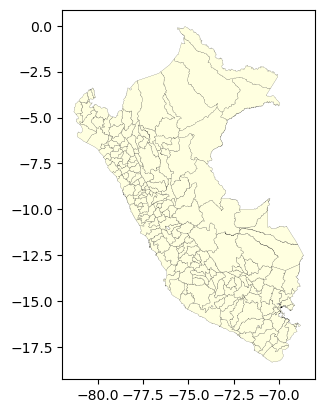

In [233]:
provincias.plot(facecolor="lightyellow",
               edgecolor='black',
               linewidth=0.1)

In [421]:
import pandas as pd
LinkData3="https://docs.google.com/spreadsheets/d/14-EEigbH069IlLtJlqHK6ZsN36FqTaky-KQRyKRM37Y/export?format=csv"
presupuesto = pd.read_csv(LinkData3,
                          index_col=0)
presupuesto

Provincia        2015    PIM_2015  Girado_2015  \
DEPARTAMENTO                                                          
AMAZONAS                 BAGUA  41683146.0  53681152.0   53649195.0   
AMAZONAS               BONGARA         NaN         NaN          NaN   
AMAZONAS           CHACHAPOYAS         NaN         NaN          NaN   
AMAZONAS          CONDORCANQUI  13004732.0  18640853.0   18622565.0   
AMAZONAS                  LUYA         NaN         NaN          NaN   
...                        ...         ...         ...          ...   
UCAYALI                ATALAYA   8398518.0  10749421.0   10584720.0   
UCAYALI       CORONEL PORTILLO  47749416.0  64281149.0   64099088.0   
UCAYALI             PADRE ABAD   9016967.0  11624186.0   11541498.0   
UCAYALI                  PURUS   1158834.0   1488118.0    1463857.0   
NaN                        NaN        24.0         NaN          NaN   

                    2019     PIM_2019  Girado_2019         2023     PIM_2023  \
DEPARTAMENTO                                                                   
AMAZONAS      69006973.0   84742394.0   84588597.0   65298281.0   72158176.0   
AMAZONAS             NaN          NaN          NaN          NaN          NaN   
AMAZONAS             NaN          NaN          NaN          NaN          NaN   
AMAZONAS      29195769.0   36255386.0   35881268.0   41028381.0   47935501.0   
AMAZONAS             NaN          NaN          NaN          NaN          NaN   
...                  ...          ...          ...          ...          ...   
UCAYALI       17840272.0   25406385.0   25356769.0   31281617.0   36205321.0   
UCAYALI       84435603.0  106468859.0  105409490.0  124679166.0  146804784.0   
UCAYALI       15401527.0   20198119.0   20089967.0   25002545.0   30167025.0   
UCAYALI        2316809.0    3717706.0    3551368.0    3355599.0    3429678.0   
NaN                  NaN          NaN          NaN          NaN          NaN   

              Girado_2023  
DEPARTAMENTO               
AMAZONAS       72122274.0  
AMAZONAS              NaN  
AMAZONAS              NaN  
AMAZONAS       47915560.0  
AMAZONAS              NaN  
...                   ...  
UCAYALI        36185199.0  
UCAYALI       146752535.0  
UCAYALI        30140125.0  
UCAYALI         3428278.0  
NaN                   NaN  

[195 rows x 10 columns]

In [423]:
presupuesto['Provincia']=presupuesto.Provincia.str.upper()
presupuesto.head()

Provincia        2015    PIM_2015  Girado_2015        2019  \
DEPARTAMENTO                                                                  
AMAZONAS             BAGUA  41683146.0  53681152.0   53649195.0  69006973.0   
AMAZONAS           BONGARA         NaN         NaN          NaN         NaN   
AMAZONAS       CHACHAPOYAS         NaN         NaN          NaN         NaN   
AMAZONAS      CONDORCANQUI  13004732.0  18640853.0   18622565.0  29195769.0   
AMAZONAS              LUYA         NaN         NaN          NaN         NaN   

                PIM_2019  Girado_2019        2023    PIM_2023  Girado_2023  
DEPARTAMENTO                                                                
AMAZONAS      84742394.0   84588597.0  65298281.0  72158176.0   72122274.0  
AMAZONAS             NaN          NaN         NaN         NaN          NaN  
AMAZONAS             NaN          NaN         NaN         NaN          NaN  
AMAZONAS      36255386.0   35881268.0  41028381.0  47935501.0   47915560.0  
AMAZONAS             NaN          NaN         NaN         NaN          NaN

NOMBRES DIFERENTES EN AMBAS DATAS:

In [426]:
onlyPresupuesto=set(presupuesto.Provincia)- set(provincias.PROVINCIA)
onlyMap=set(provincias.PROVINCIA)- set(presupuesto.Provincia)

In [428]:
onlyPresupuesto

{nan}

In [430]:
onlyMap

{'CALLAO', 'TAHUAMANU'}

In [432]:
theMapAndData=provincias.merge(presupuesto,left_on='PROVINCIA', right_on='Provincia')
# nuevo mapa
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   OBJECTID     194 non-null    float64 
 1   CCDD         194 non-null    object  
 2   CCPP         194 non-null    object  
 3   DEPARTAMEN   194 non-null    object  
 4   PROVINCIA    194 non-null    object  
 5   geometry     194 non-null    geometry
 6   Provincia    194 non-null    object  
 7   2015         170 non-null    float64 
 8   PIM_2015     170 non-null    float64 
 9   Girado_2015  170 non-null    float64 
 10  2019         174 non-null    float64 
 11  PIM_2019     174 non-null    float64 
 12  Girado_2019  174 non-null    float64 
 13  2023         173 non-null    float64 
 14  PIM_2023     173 non-null    float64 
 15  Girado_2023  173 non-null    float64 
dtypes: float64(10), geometry(1), object(5)
memory usage: 24.4+ KB


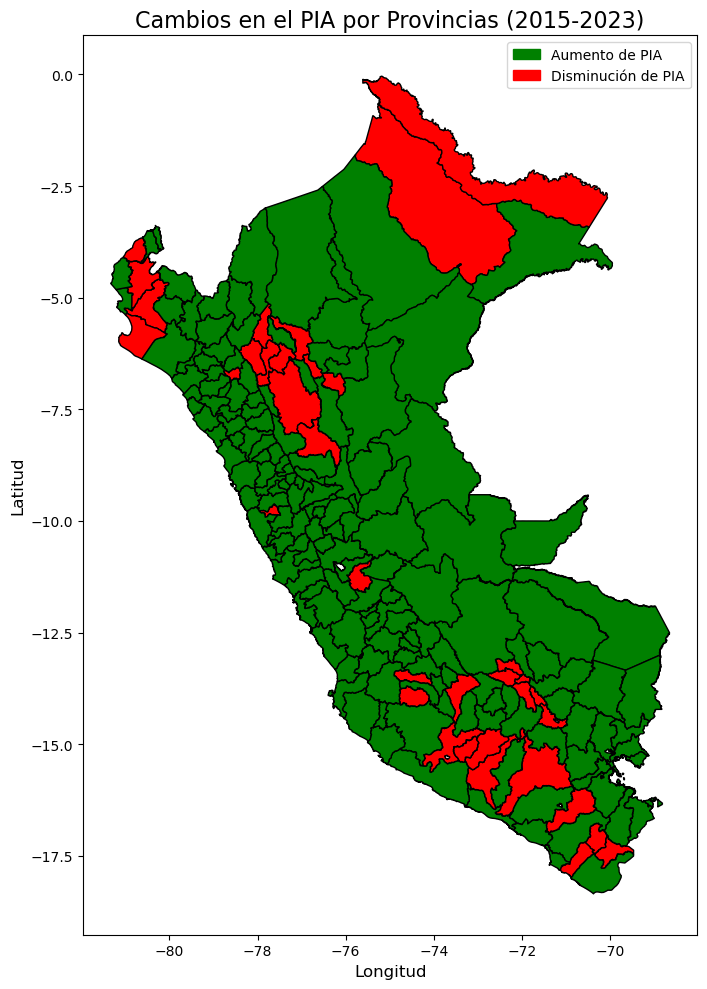

In [448]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
gdf = theMapAndData
gdf['change'] = gdf['2023'] - gdf['2015']
gdf['trend'] = gdf['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')
colors = {'increase': 'green', 'decrease': 'red'}
fig, ax = plt.subplots(figsize=(12, 10))
gdf.assign(color=gdf['trend'].map(colors)).plot(ax=ax, color=gdf['trend'].map(colors), edgecolor='black')
plt.title('Cambios en el PIA por Provincias (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
legend_elements = [
    patches.Patch(color='green', label='Aumento de PIA'),
    patches.Patch(color='red', label='Disminución de PIA')
]
plt.legend(handles=legend_elements, loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()

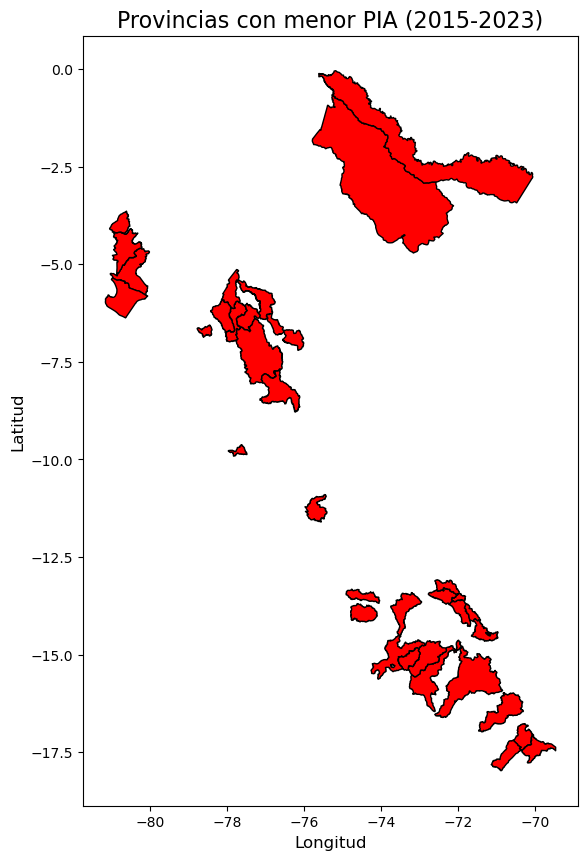

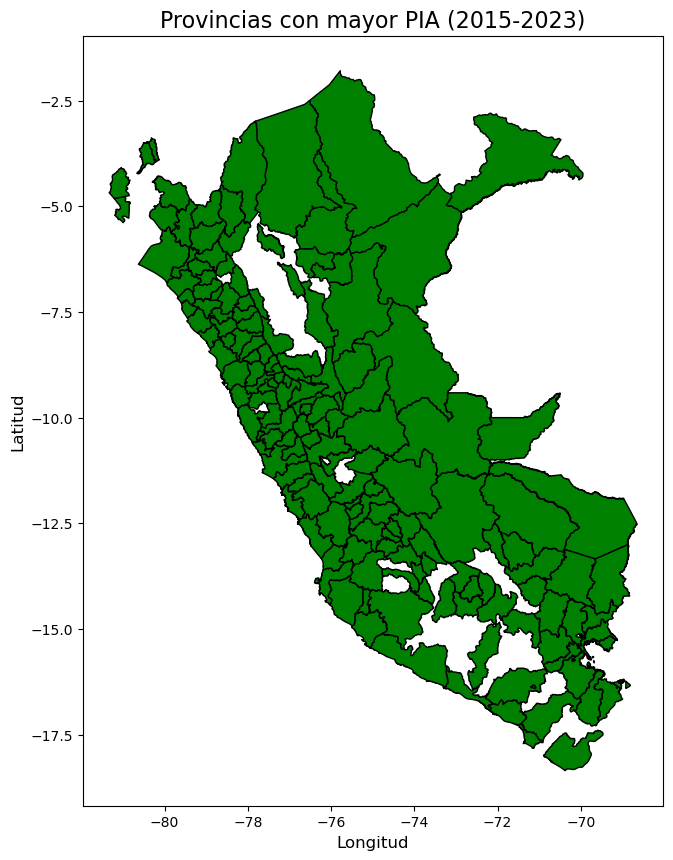

In [458]:
gdf = theMapAndData
#Provincias que disminuyeron el PIA
gdf['change'] = gdf['2023'] - gdf['2015']
gdf['trend'] = gdf['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')
colors = {'increase': 'green', 'decrease': 'red'}
fig, ax = plt.subplots(figsize=(12, 10))
gdf_decrease = gdf[gdf['trend'] == 'decrease']
gdf_decrease.plot(ax=ax, color='red', edgecolor='black')
plt.title('Provincias con menor PIA (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

#Provincias que aumentaron el PIA
fig, ax = plt.subplots(figsize=(12, 10))
gdf_increase = gdf[gdf['trend'] == 'increase']
gdf_increase.plot(ax=ax, color='green', edgecolor='black')
plt.title('Provincias con mayor PIA (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

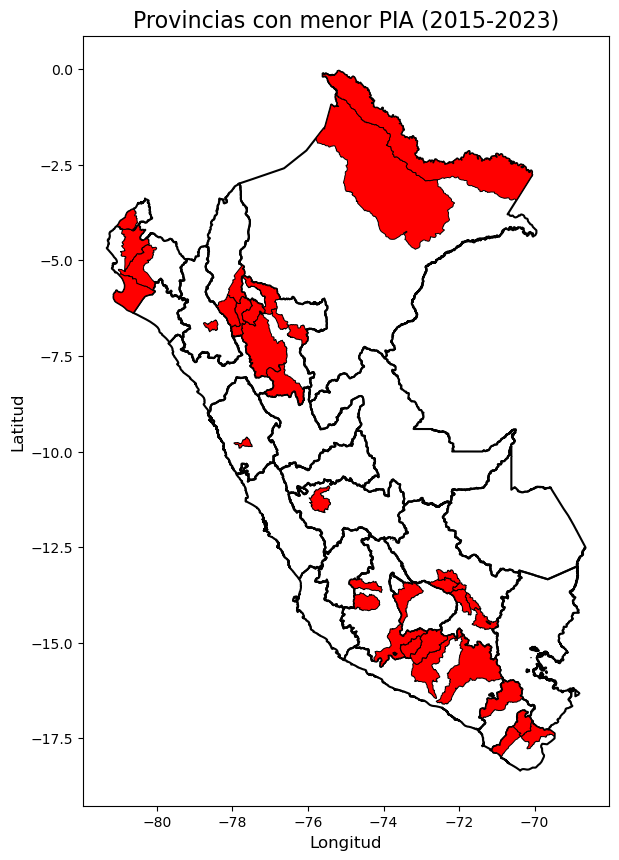

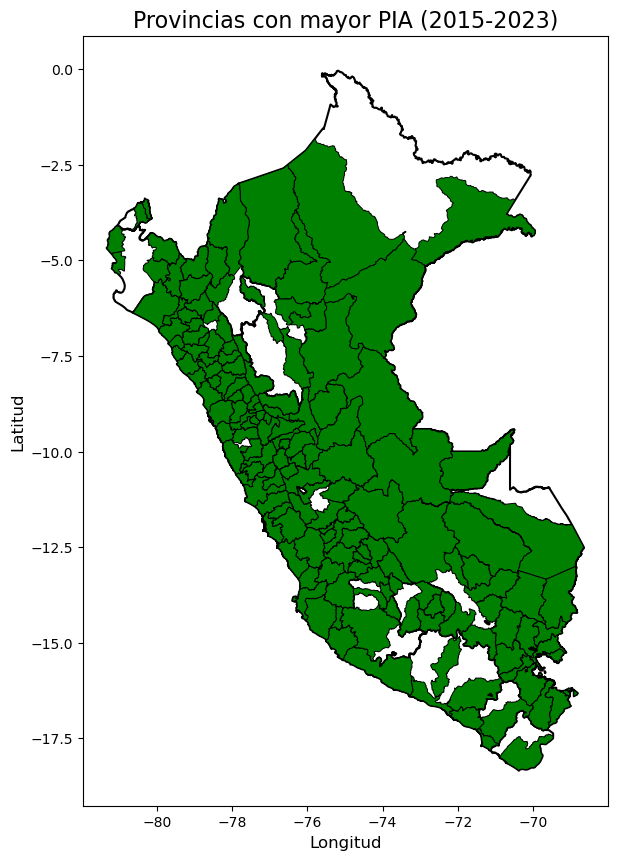

In [464]:
gdf_provincias = theMapAndData
gdf_departamentos = gpd.read_file(os.path.join("data", "Departamentos_2023"))

gdf_provincias['change'] = gdf_provincias['2023'] - gdf_provincias['2015']
gdf_provincias['trend'] = gdf_provincias['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')

# Provincias que disminuyeron las protestas
fig, ax = plt.subplots(figsize=(12, 10))
# Plotear el shapefile de los departamentos
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_decrease = gdf_provincias[gdf_provincias['trend'] == 'decrease']
gdf_decrease.plot(ax=ax, color='red', edgecolor='black', linewidth=0.7)
plt.title('Provincias con menor PIA (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

# Provincias que aumentaron las protestas
fig, ax = plt.subplots(figsize=(12, 10))
# Plotear el shapefile de los departamentos
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_increase = gdf_provincias[gdf_provincias['trend'] == 'increase']
gdf_increase.plot(ax=ax, color='green', edgecolor='black', linewidth=0.7)
plt.title('Provincias con mayor PIA (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


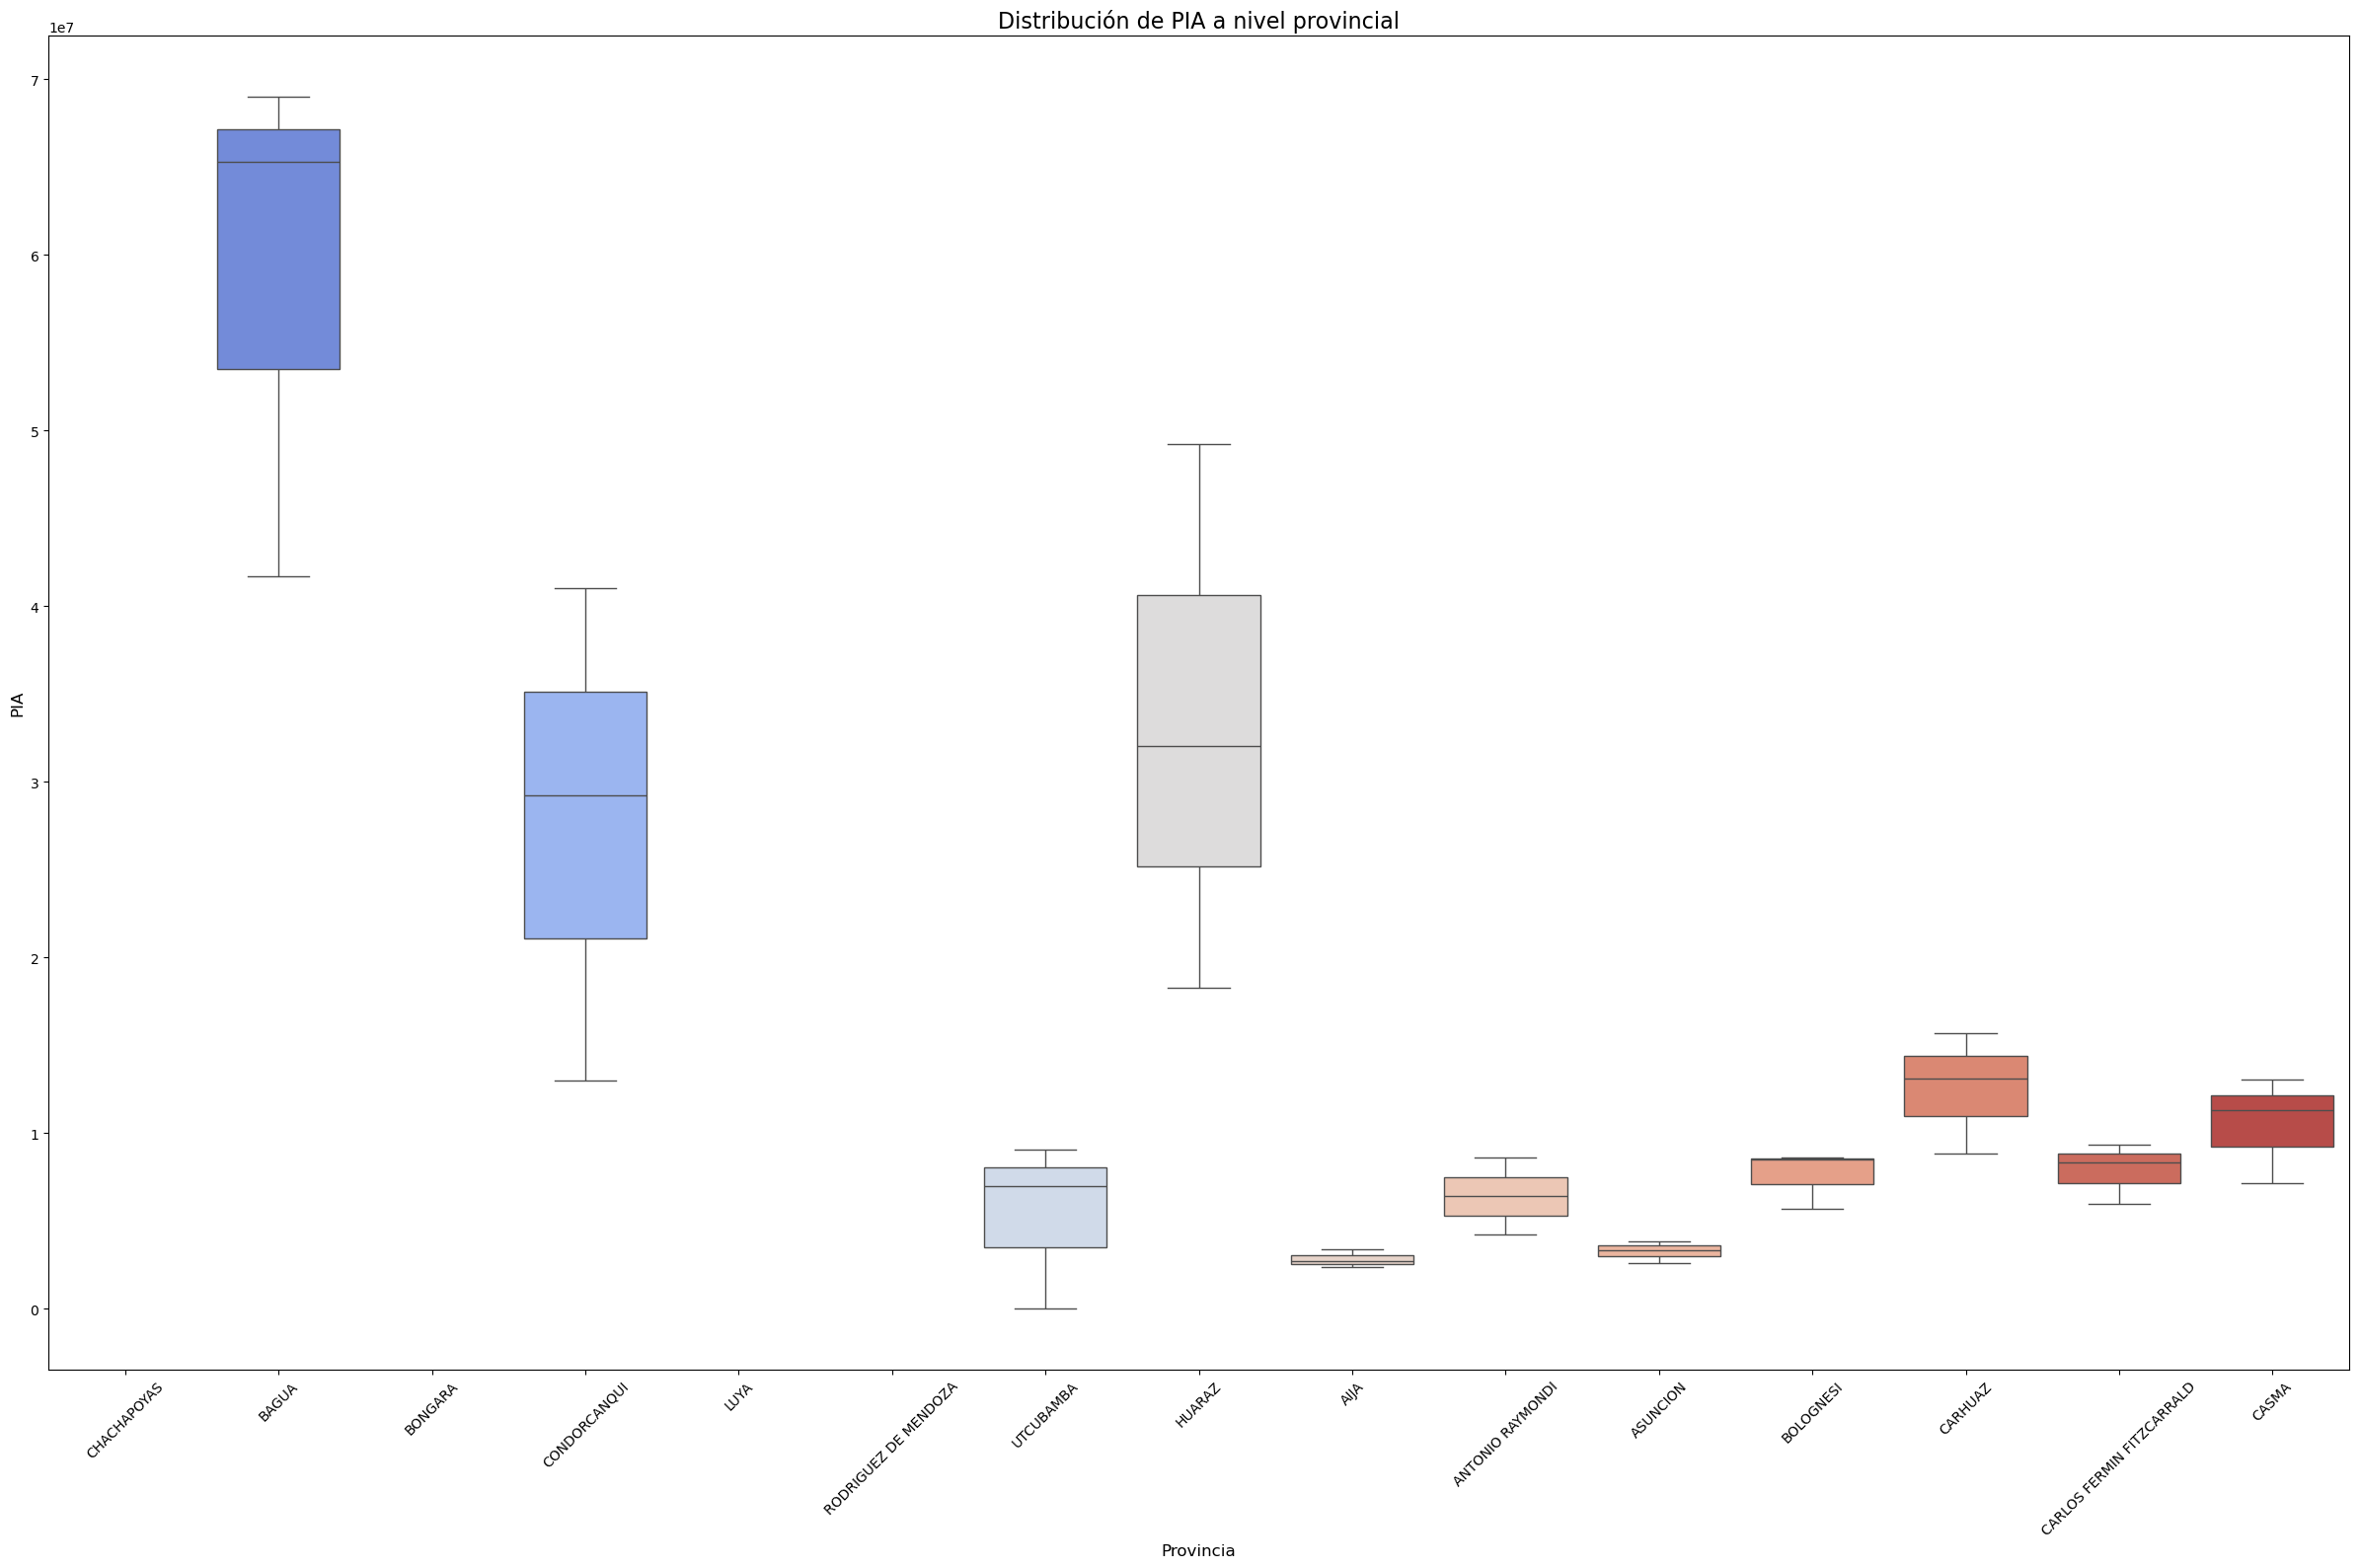

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


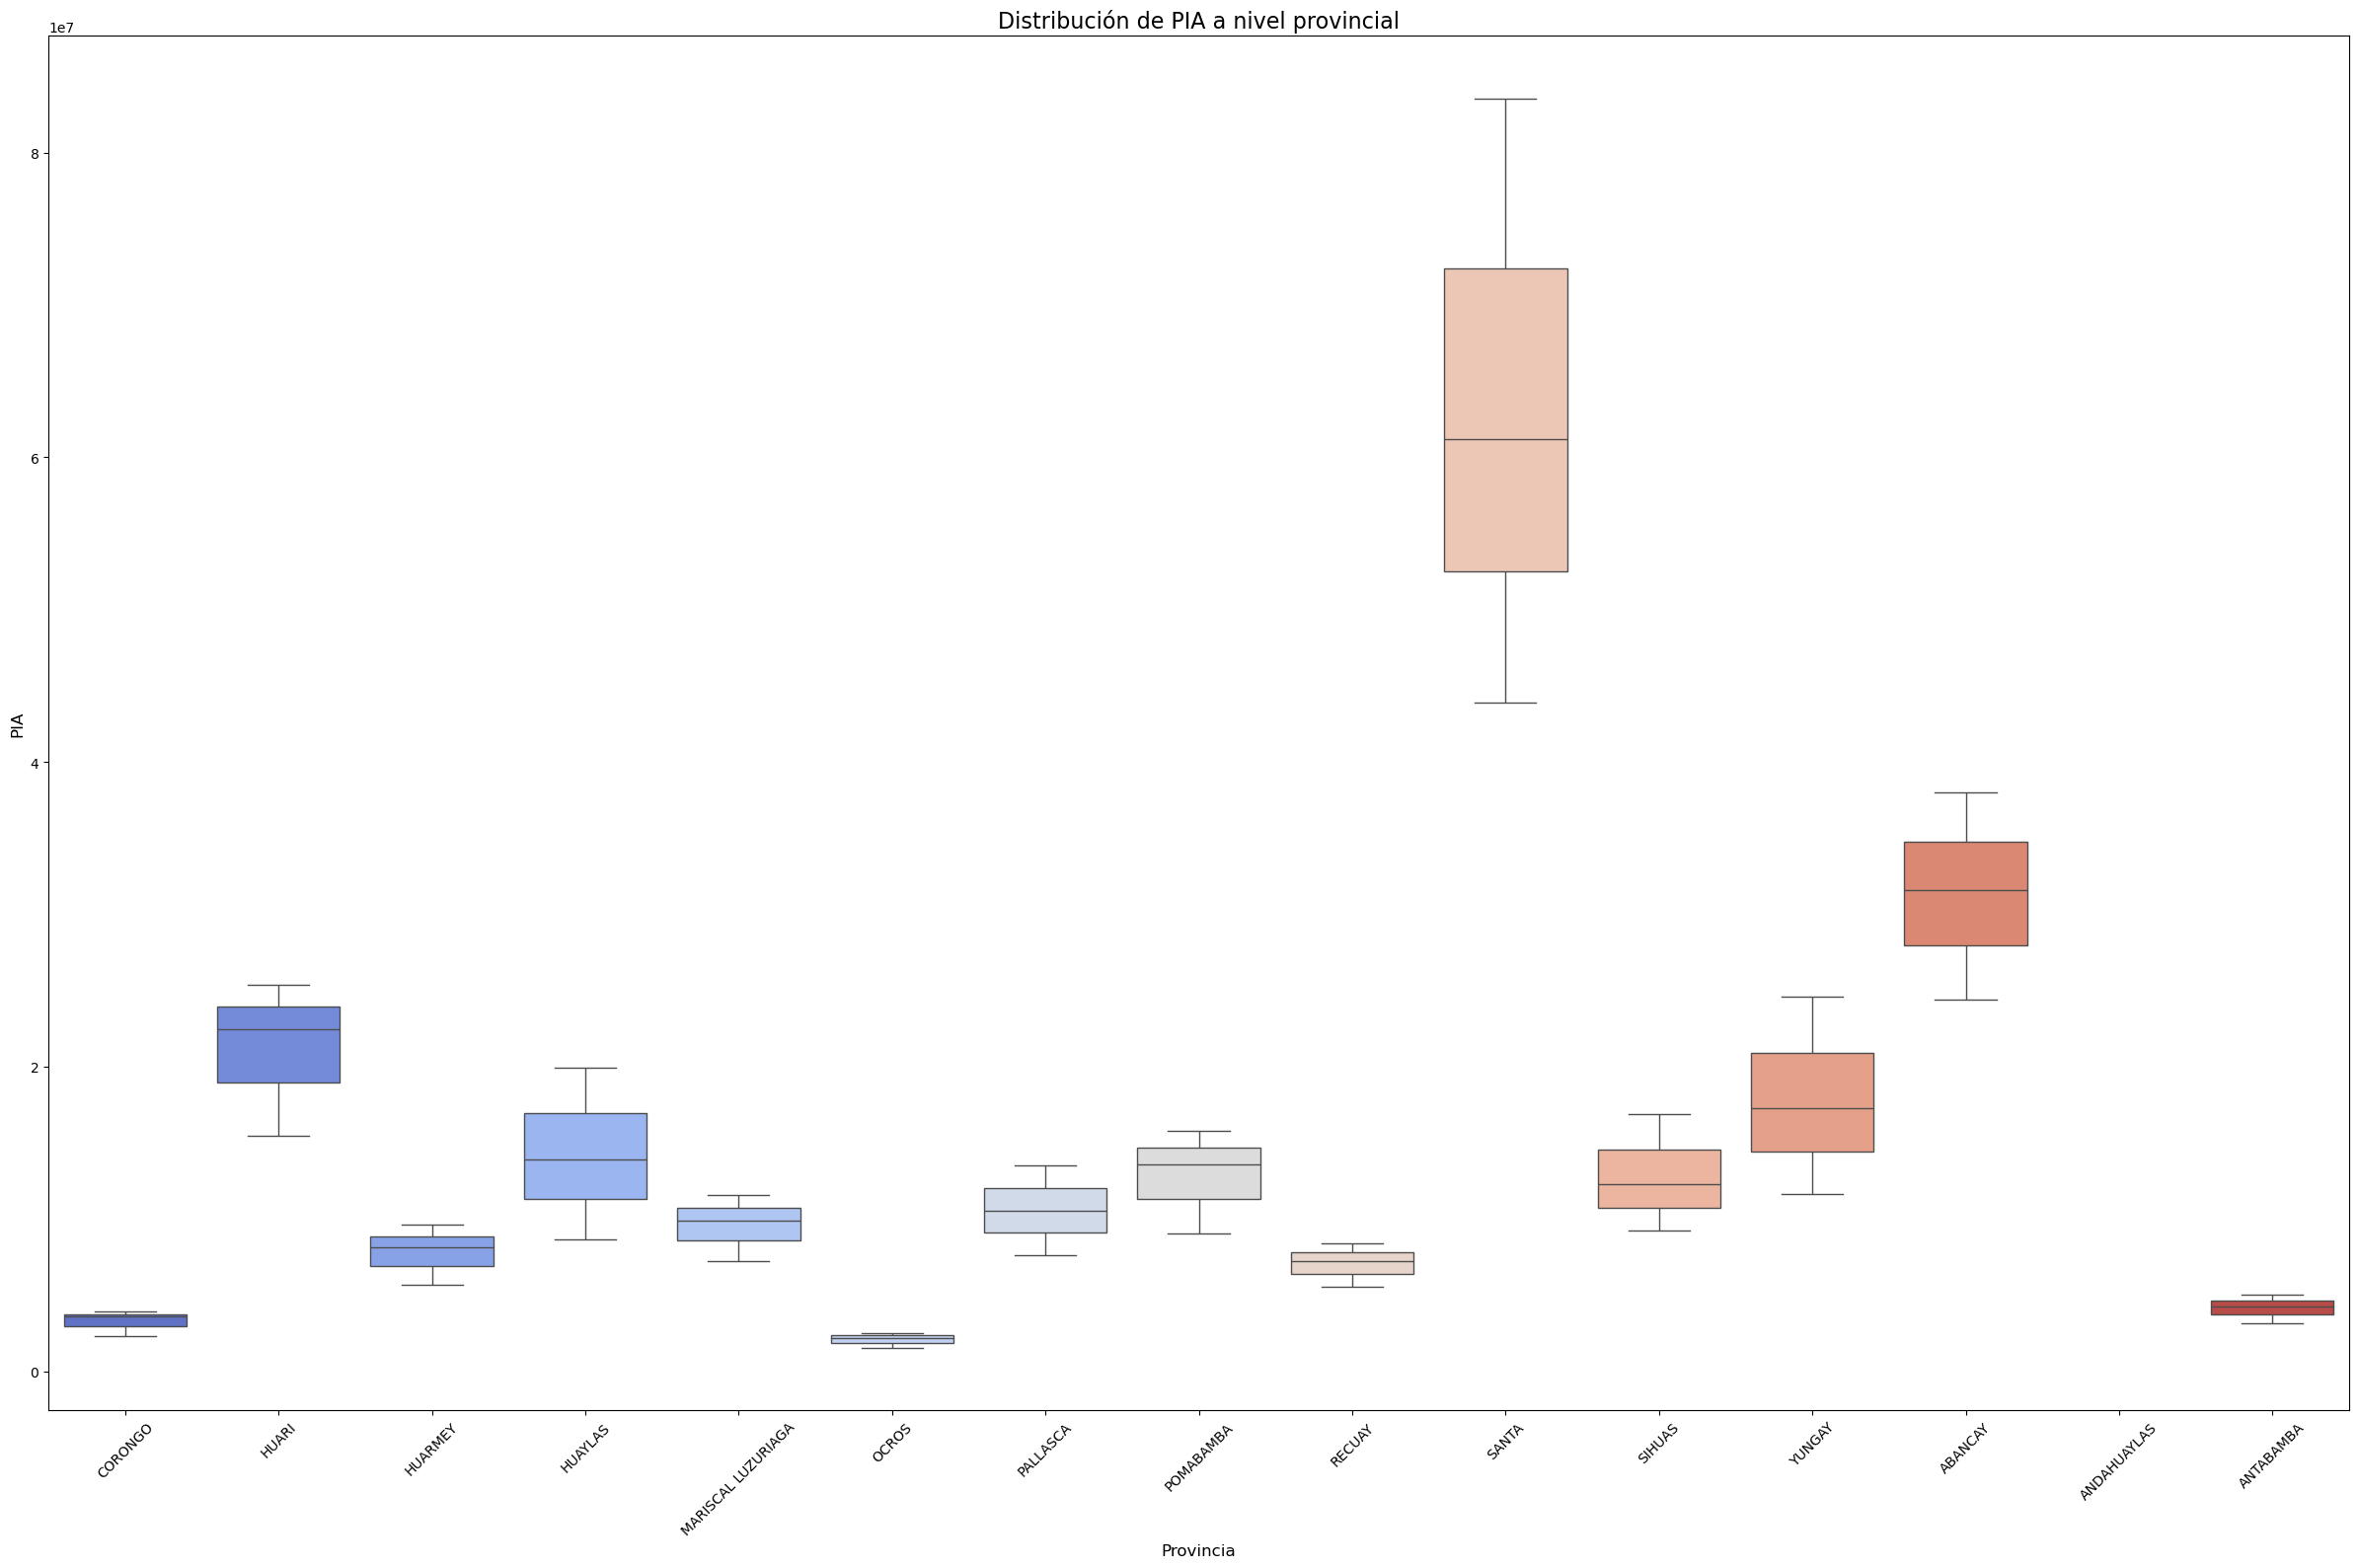

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


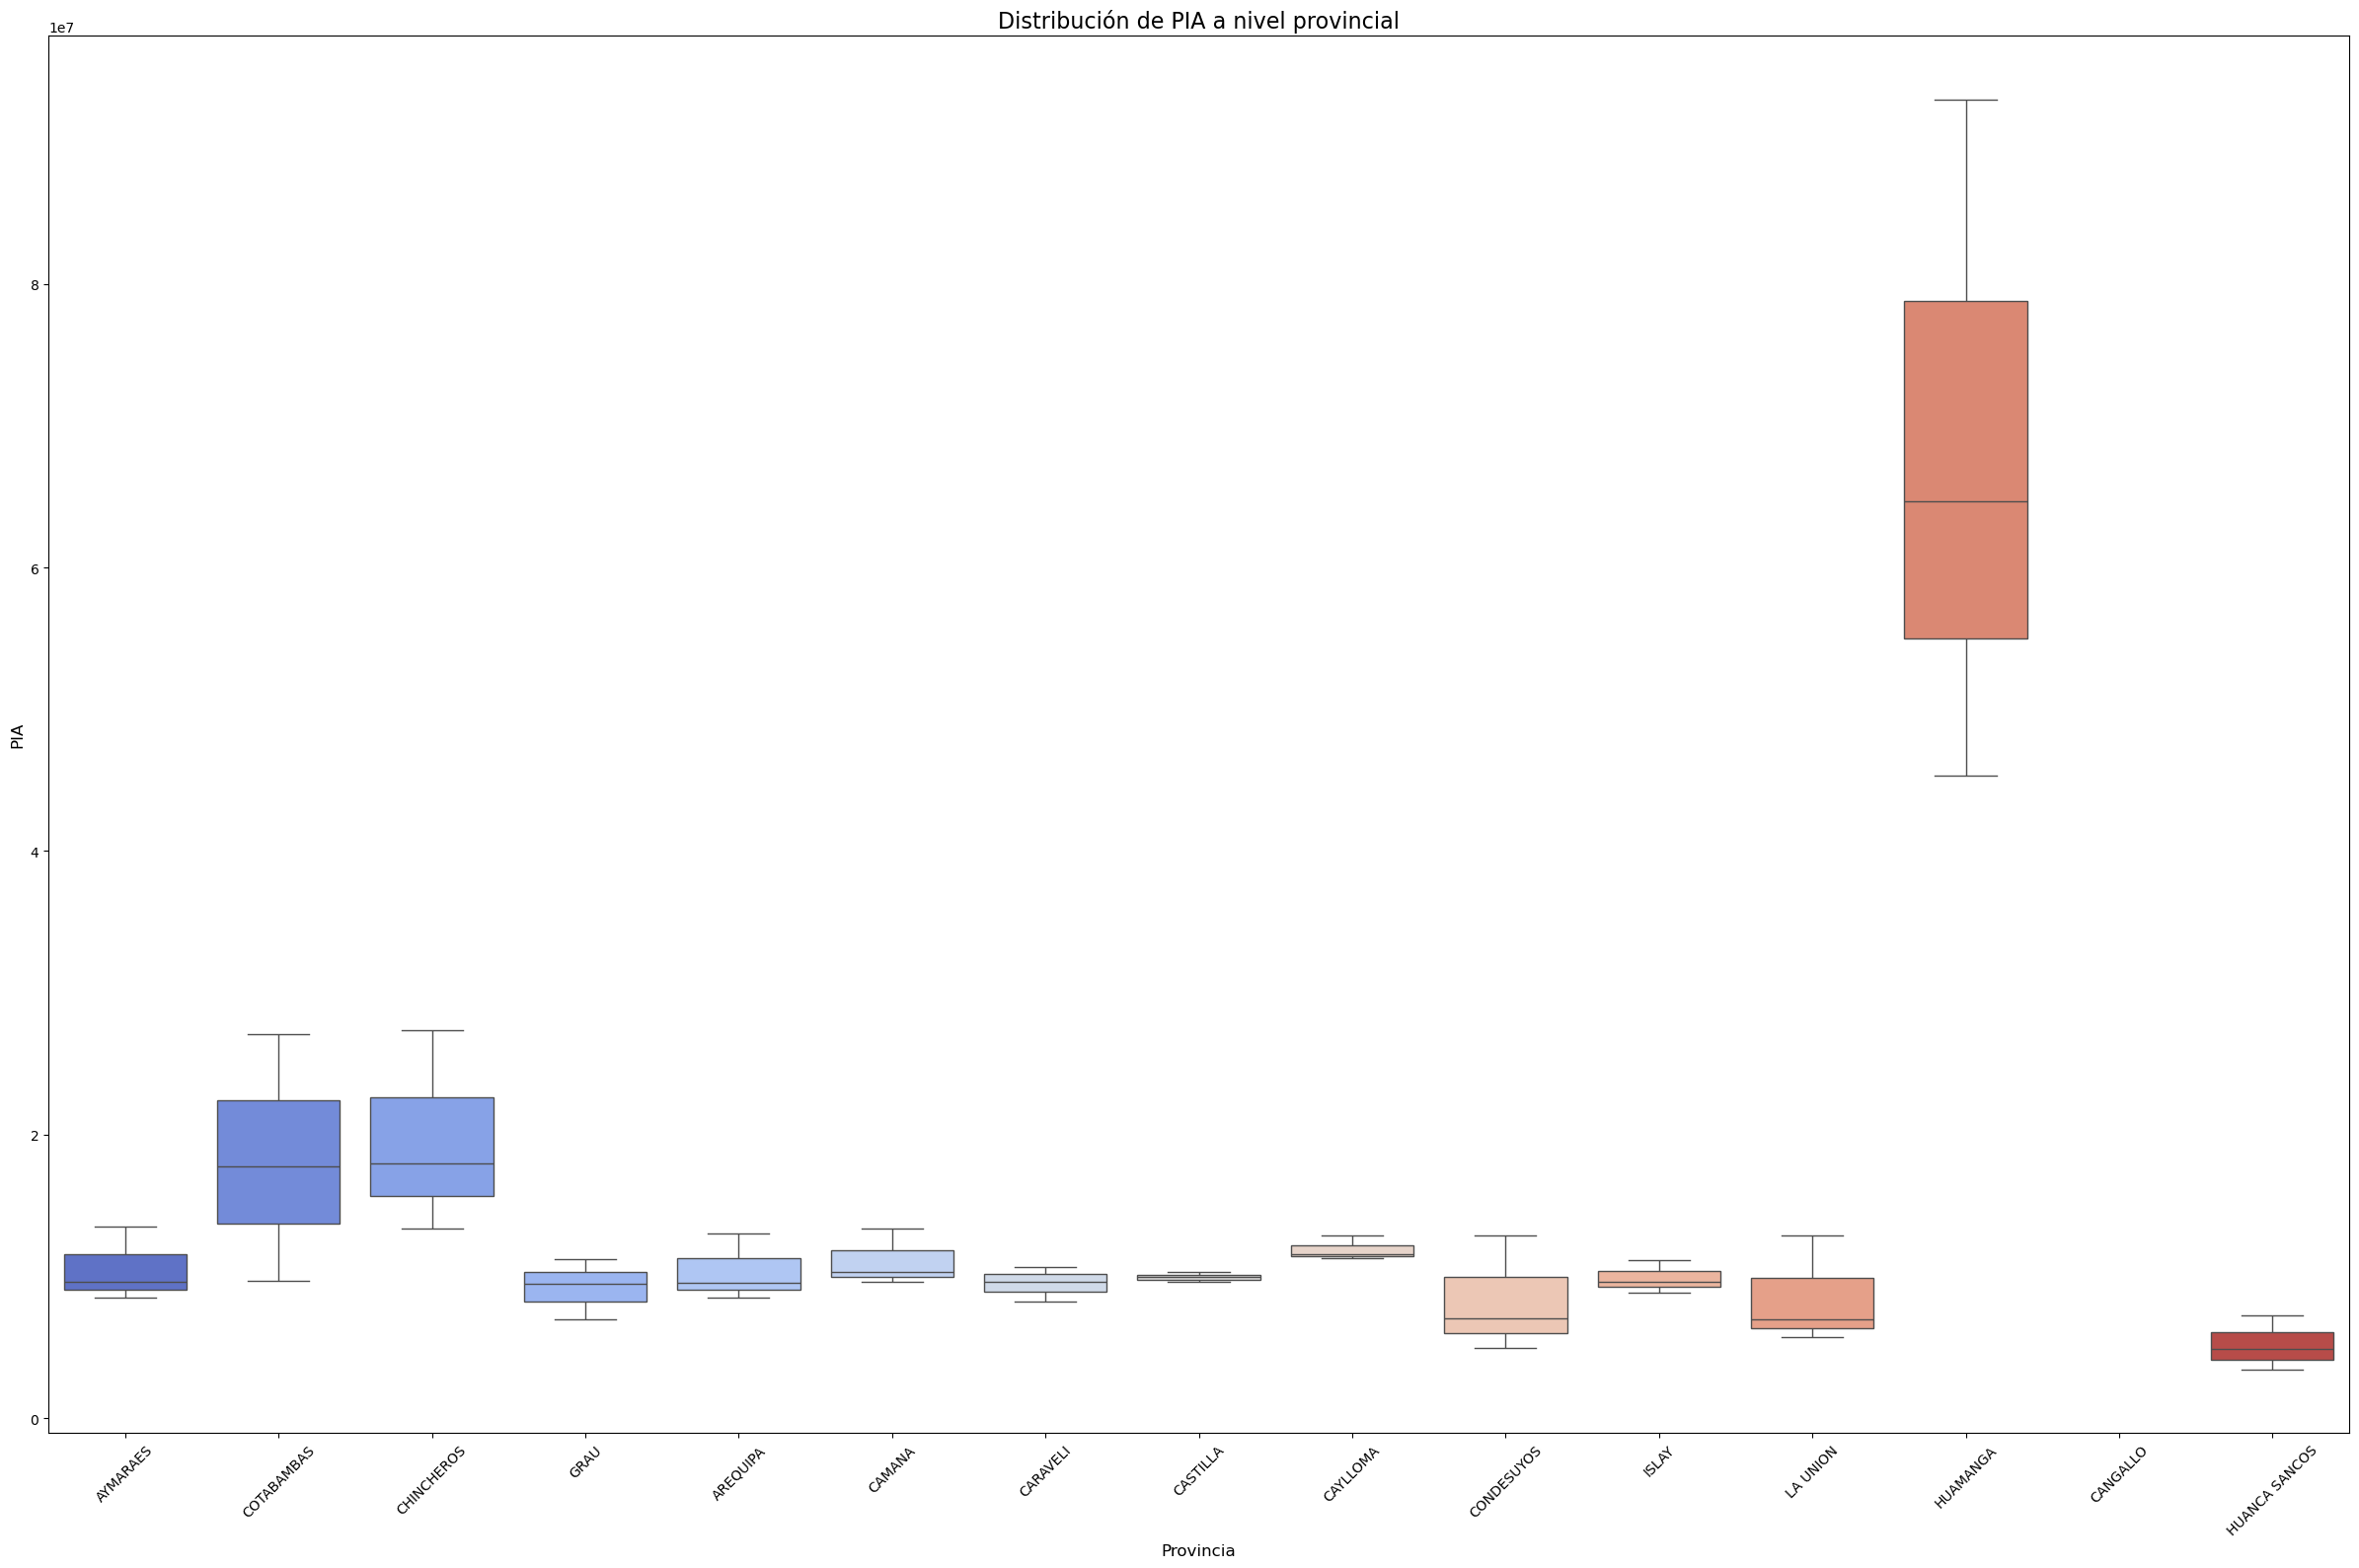

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


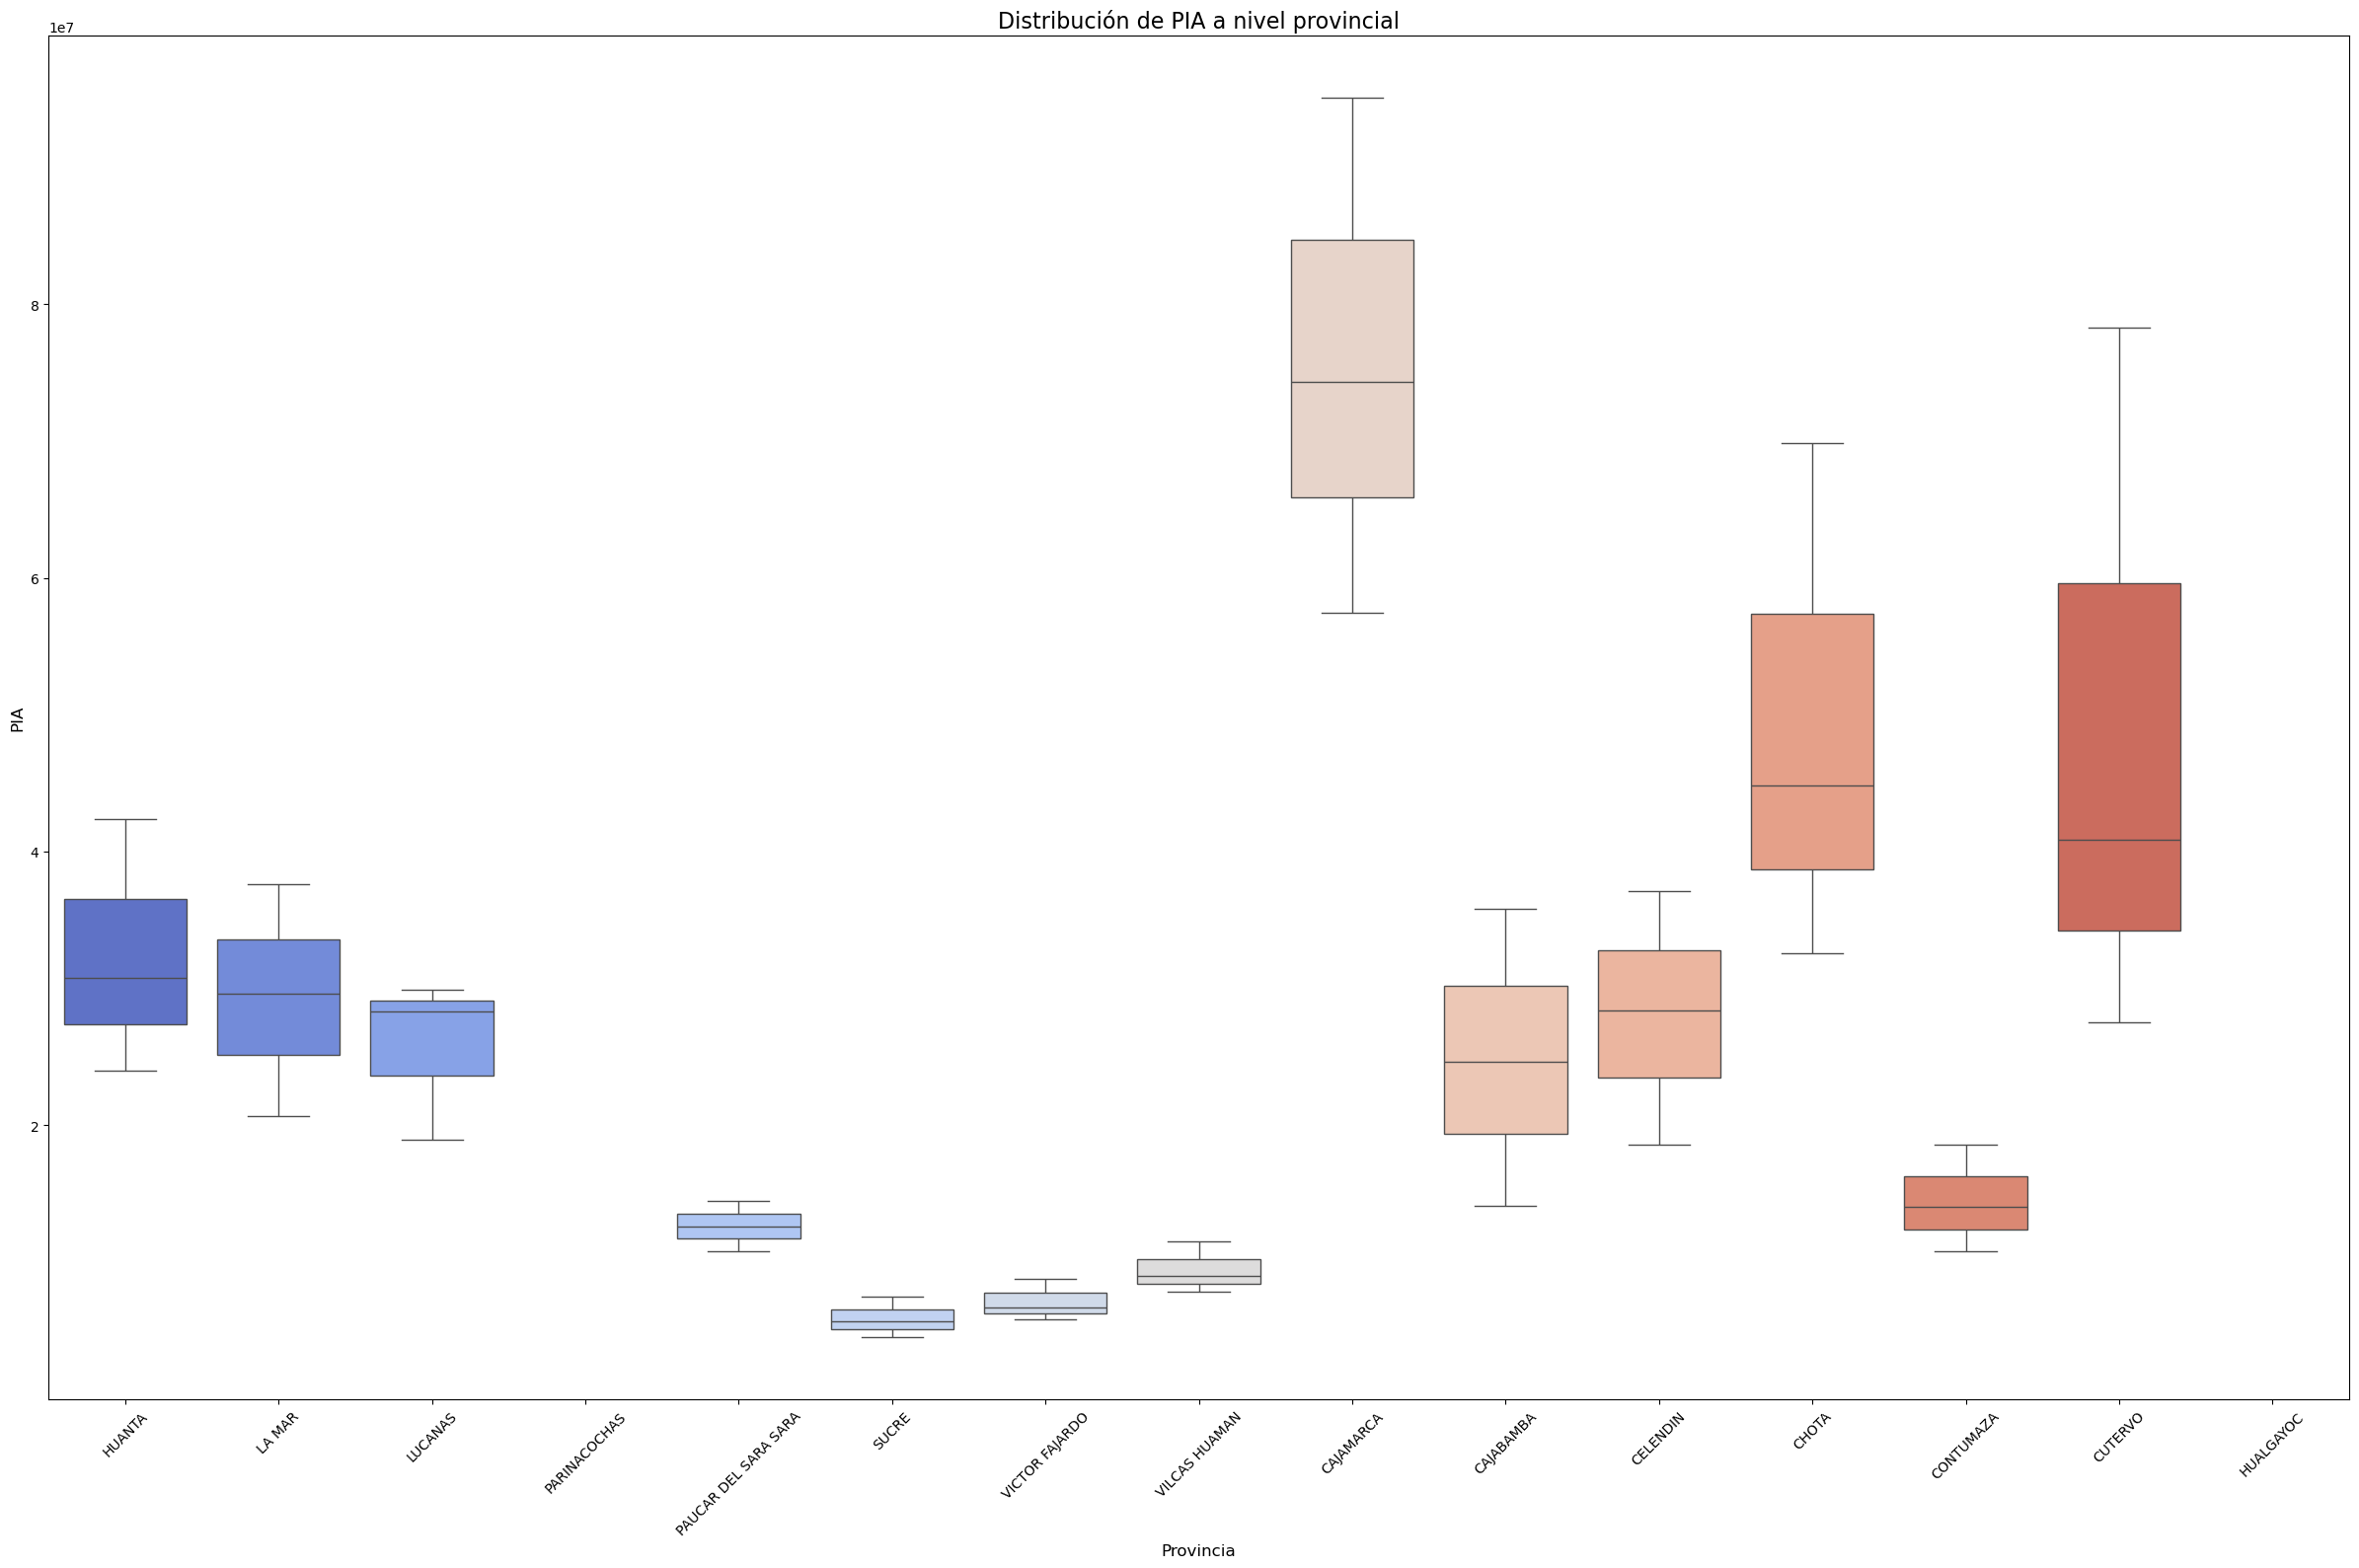

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


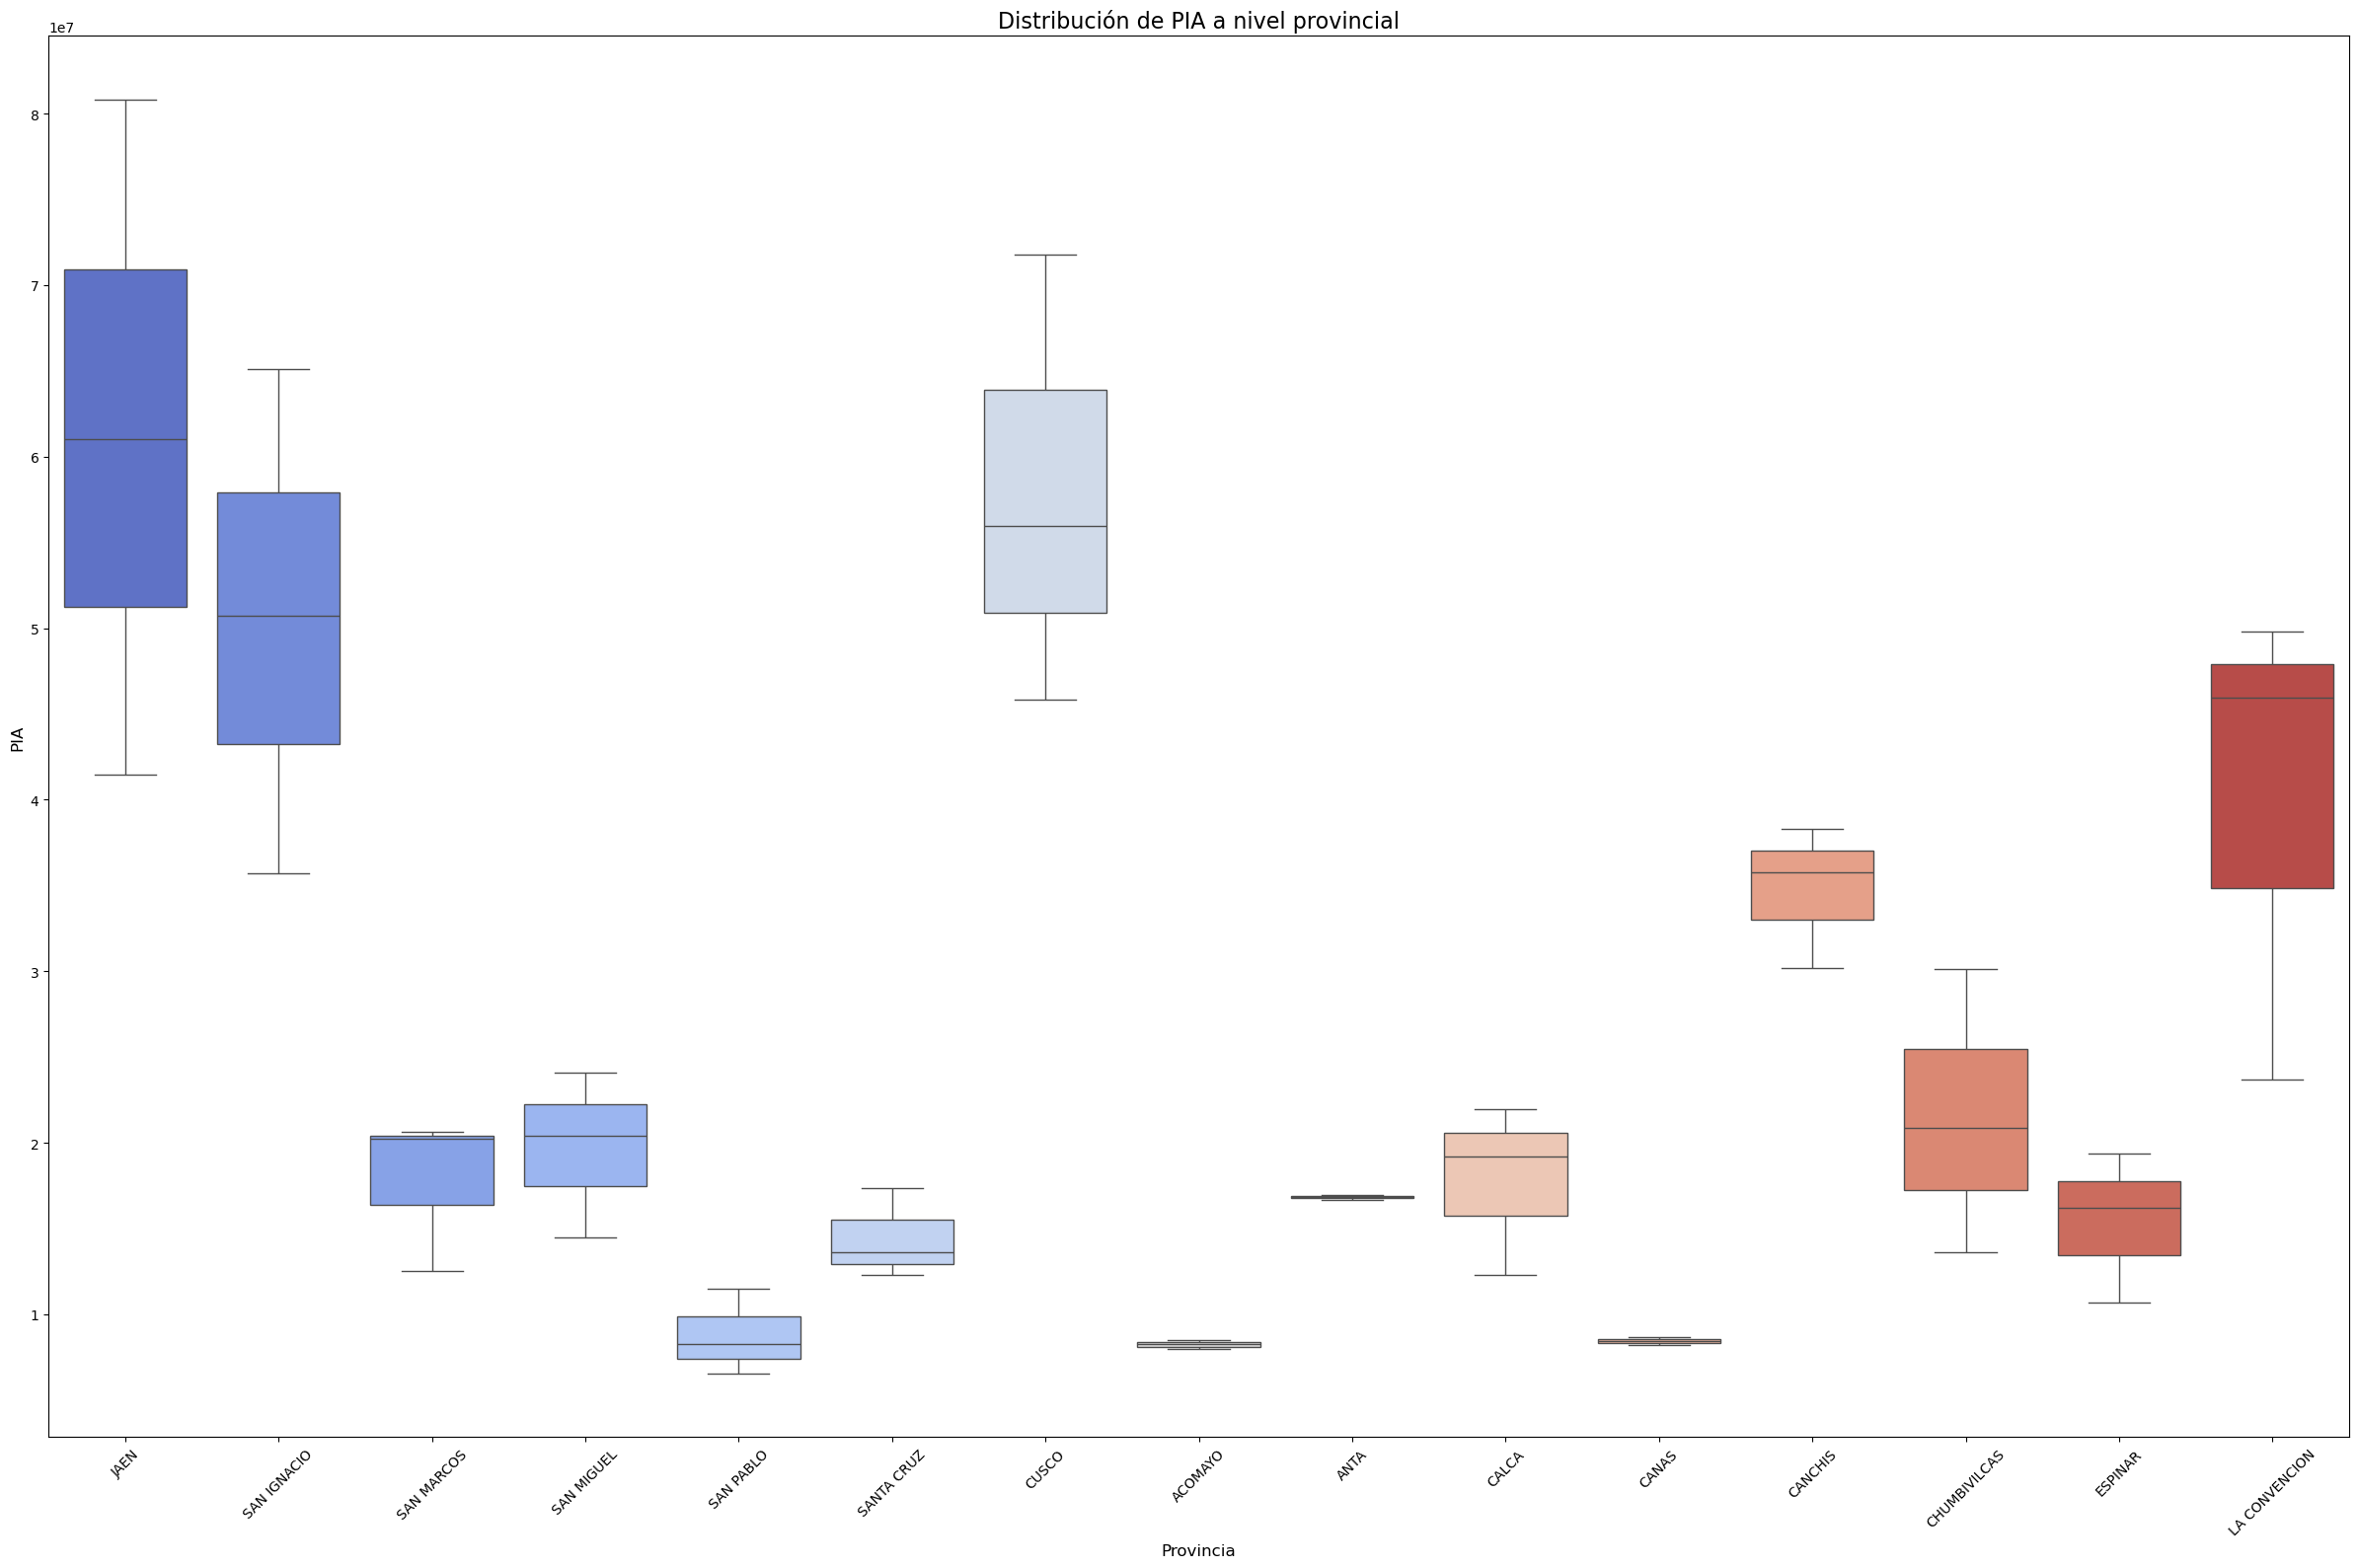

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


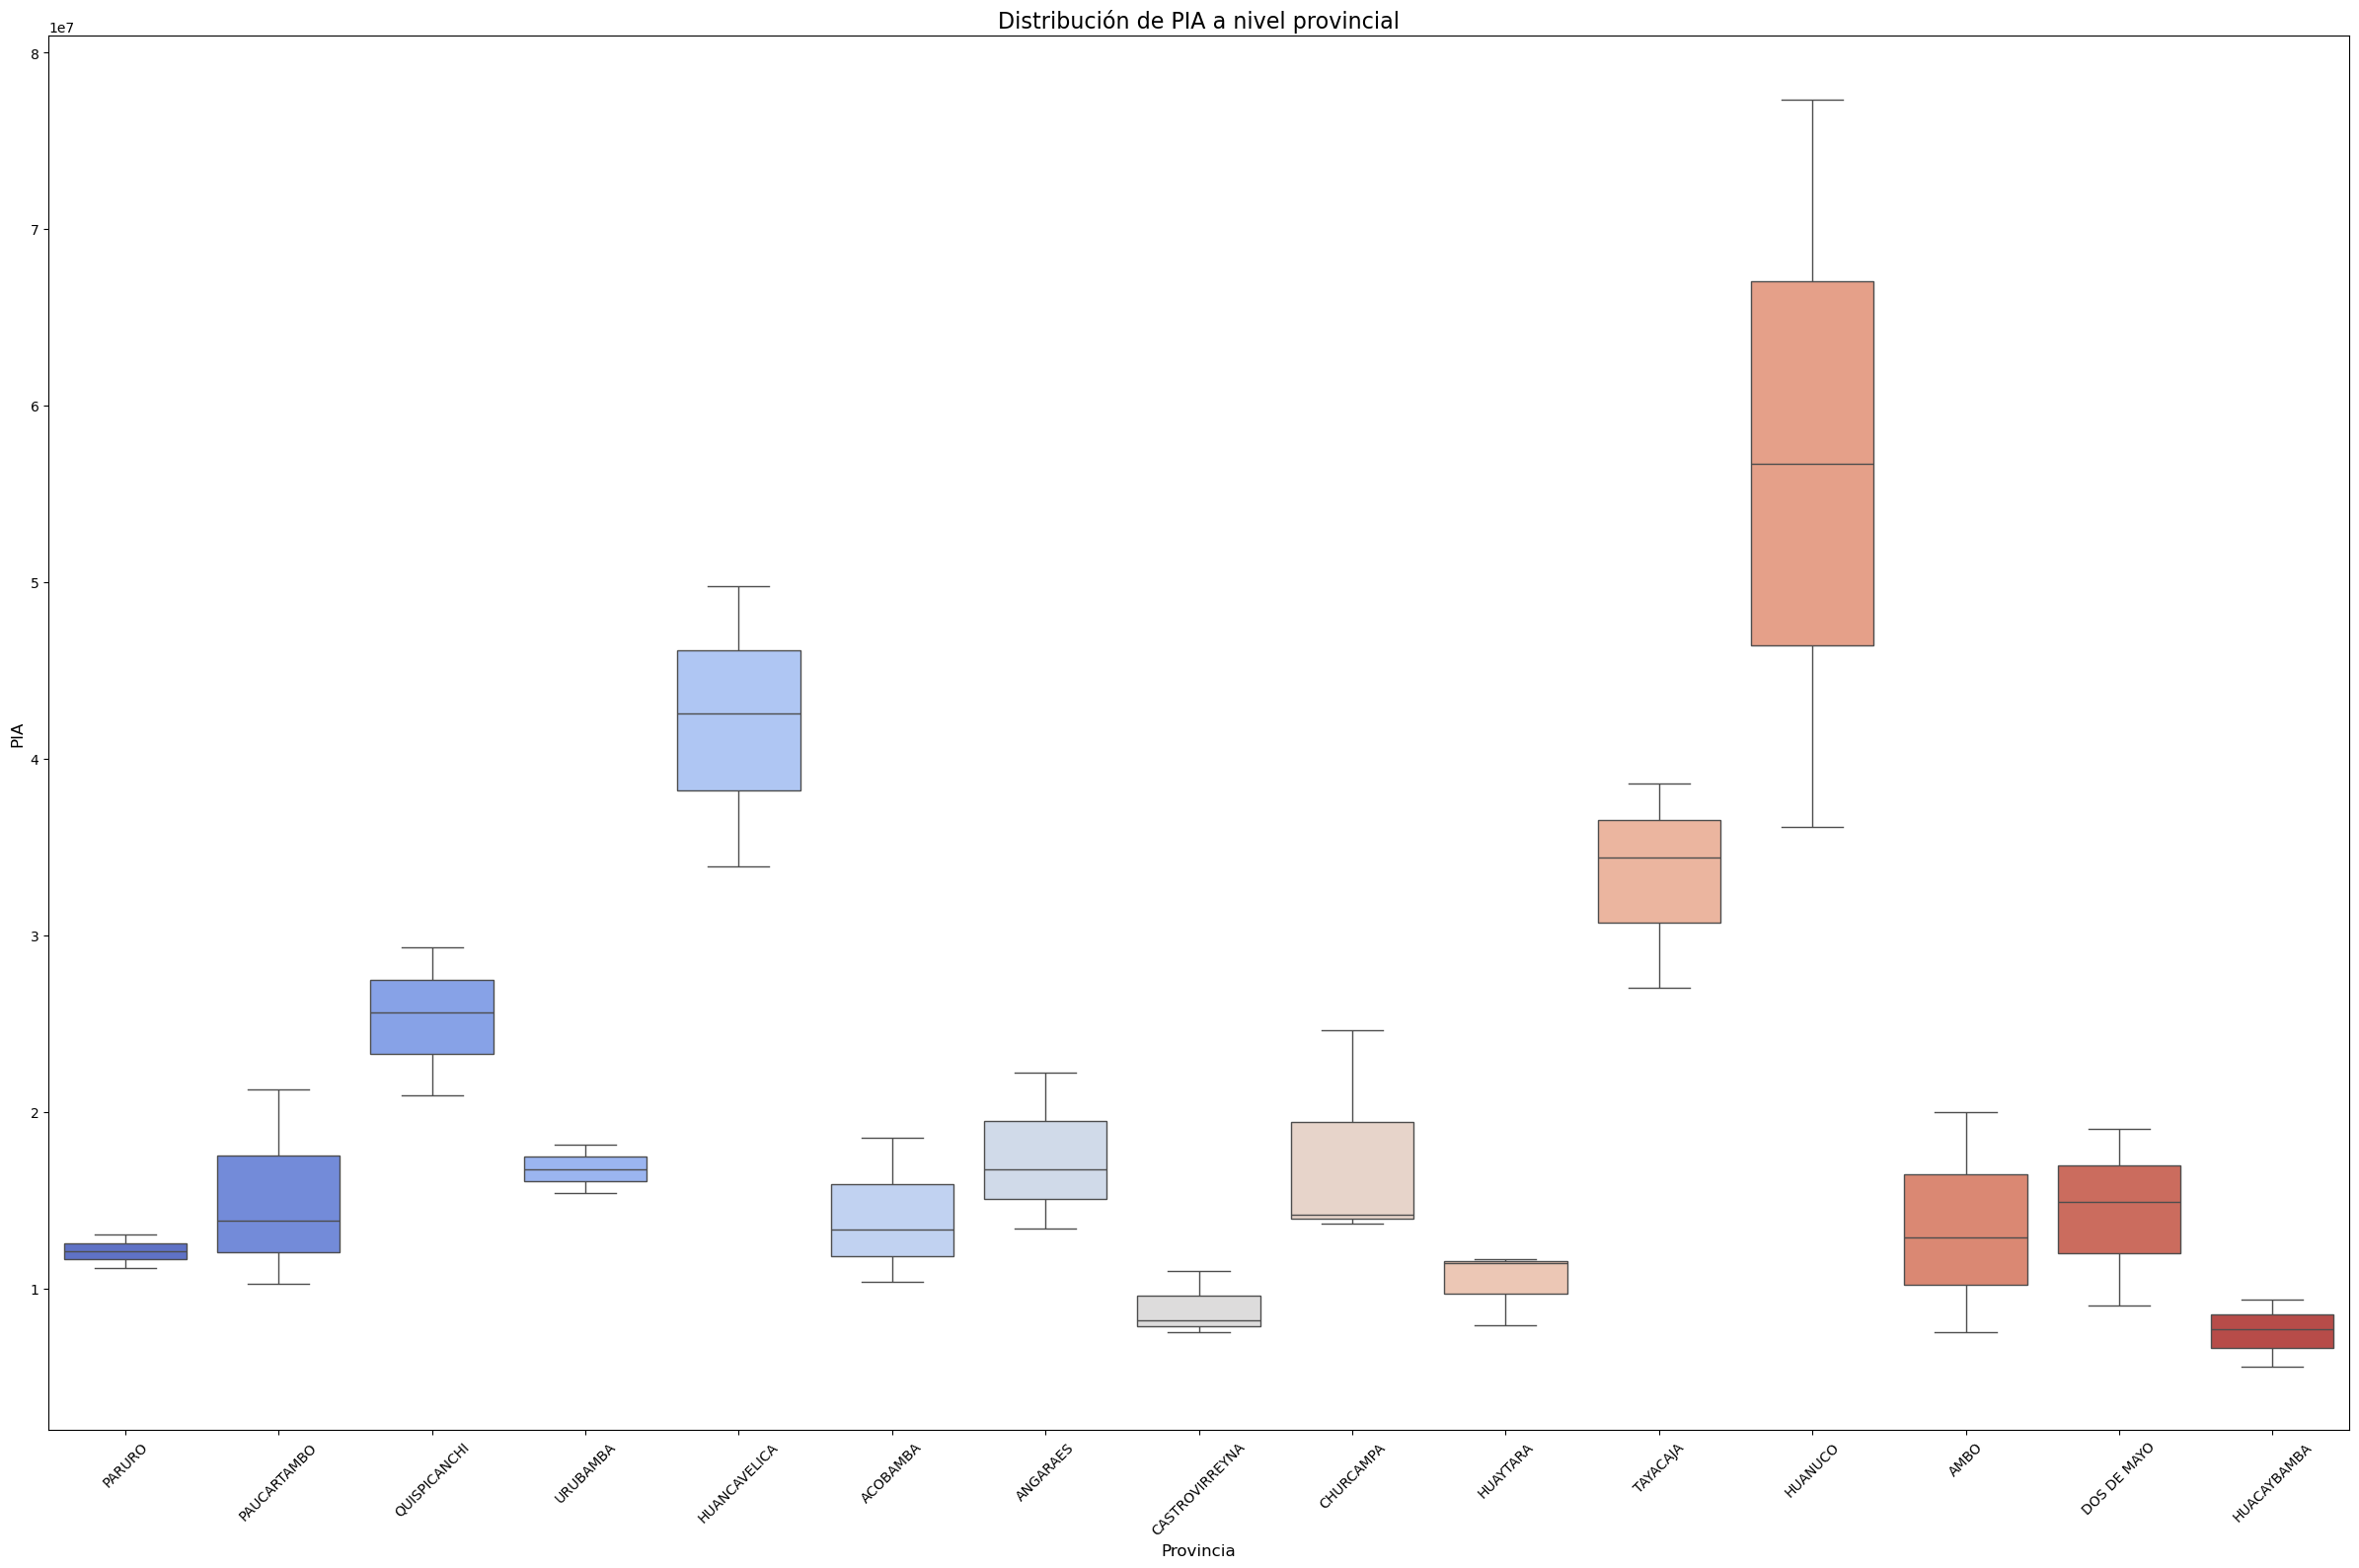

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


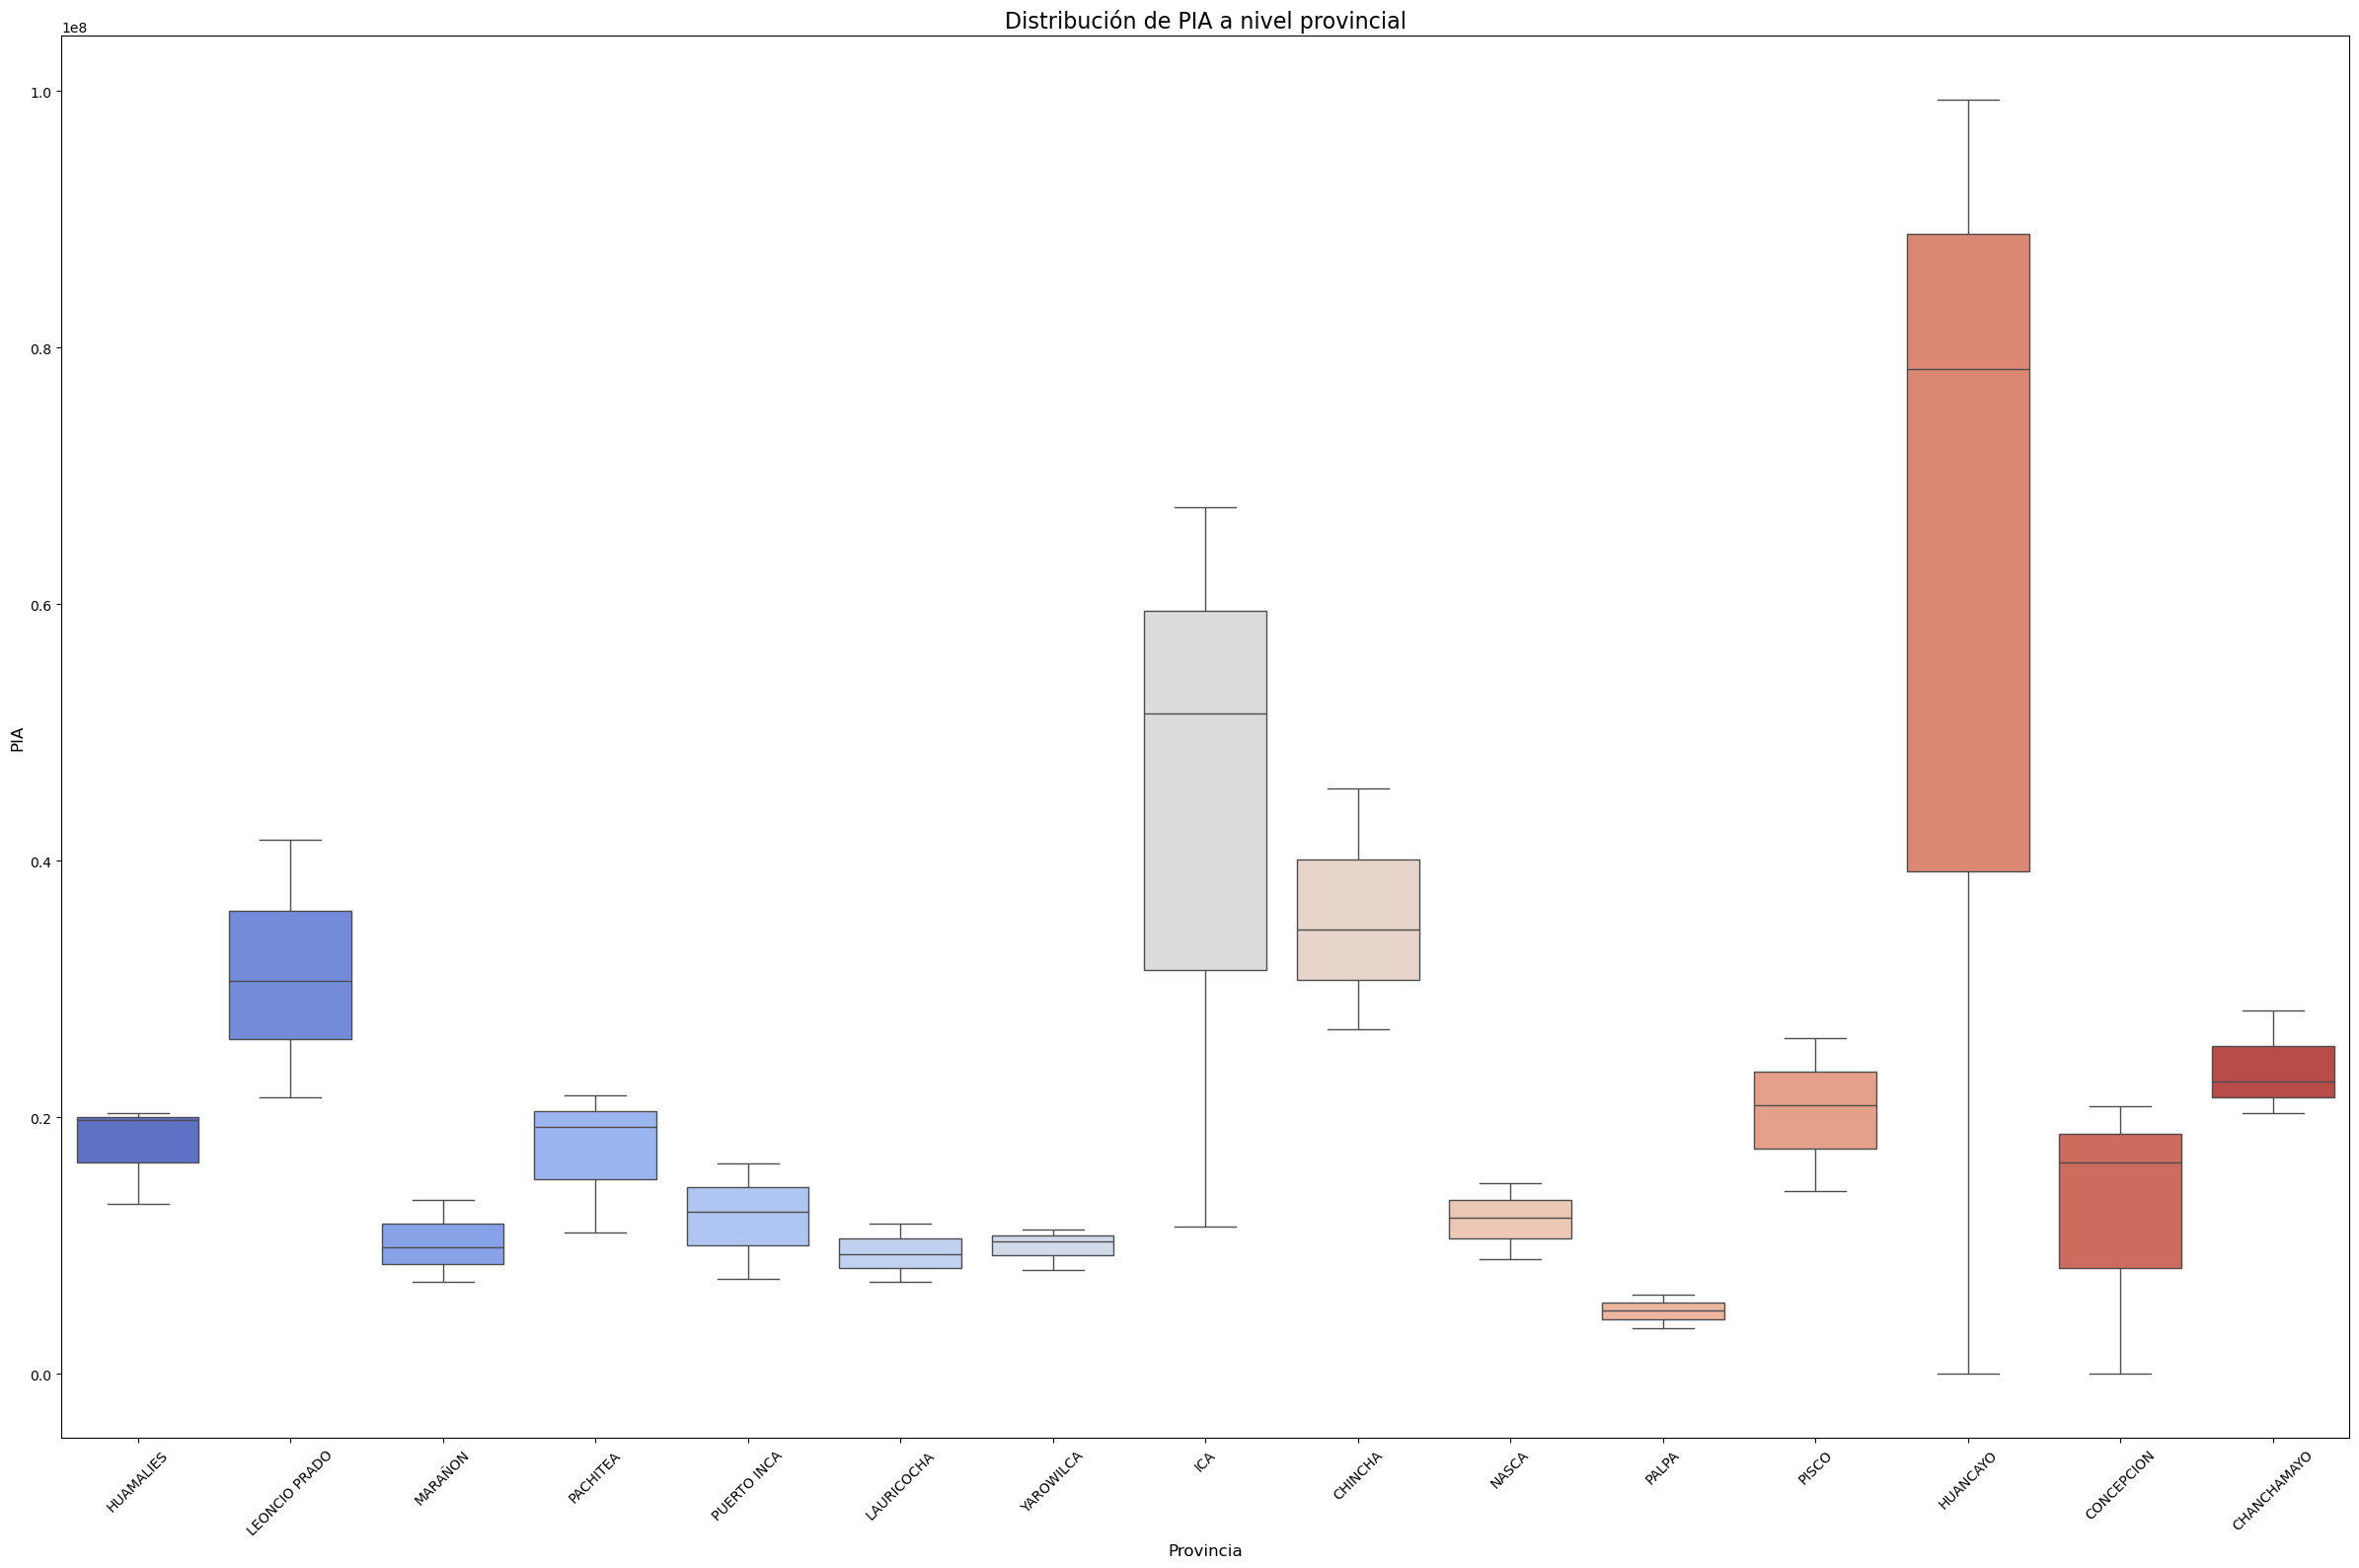

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


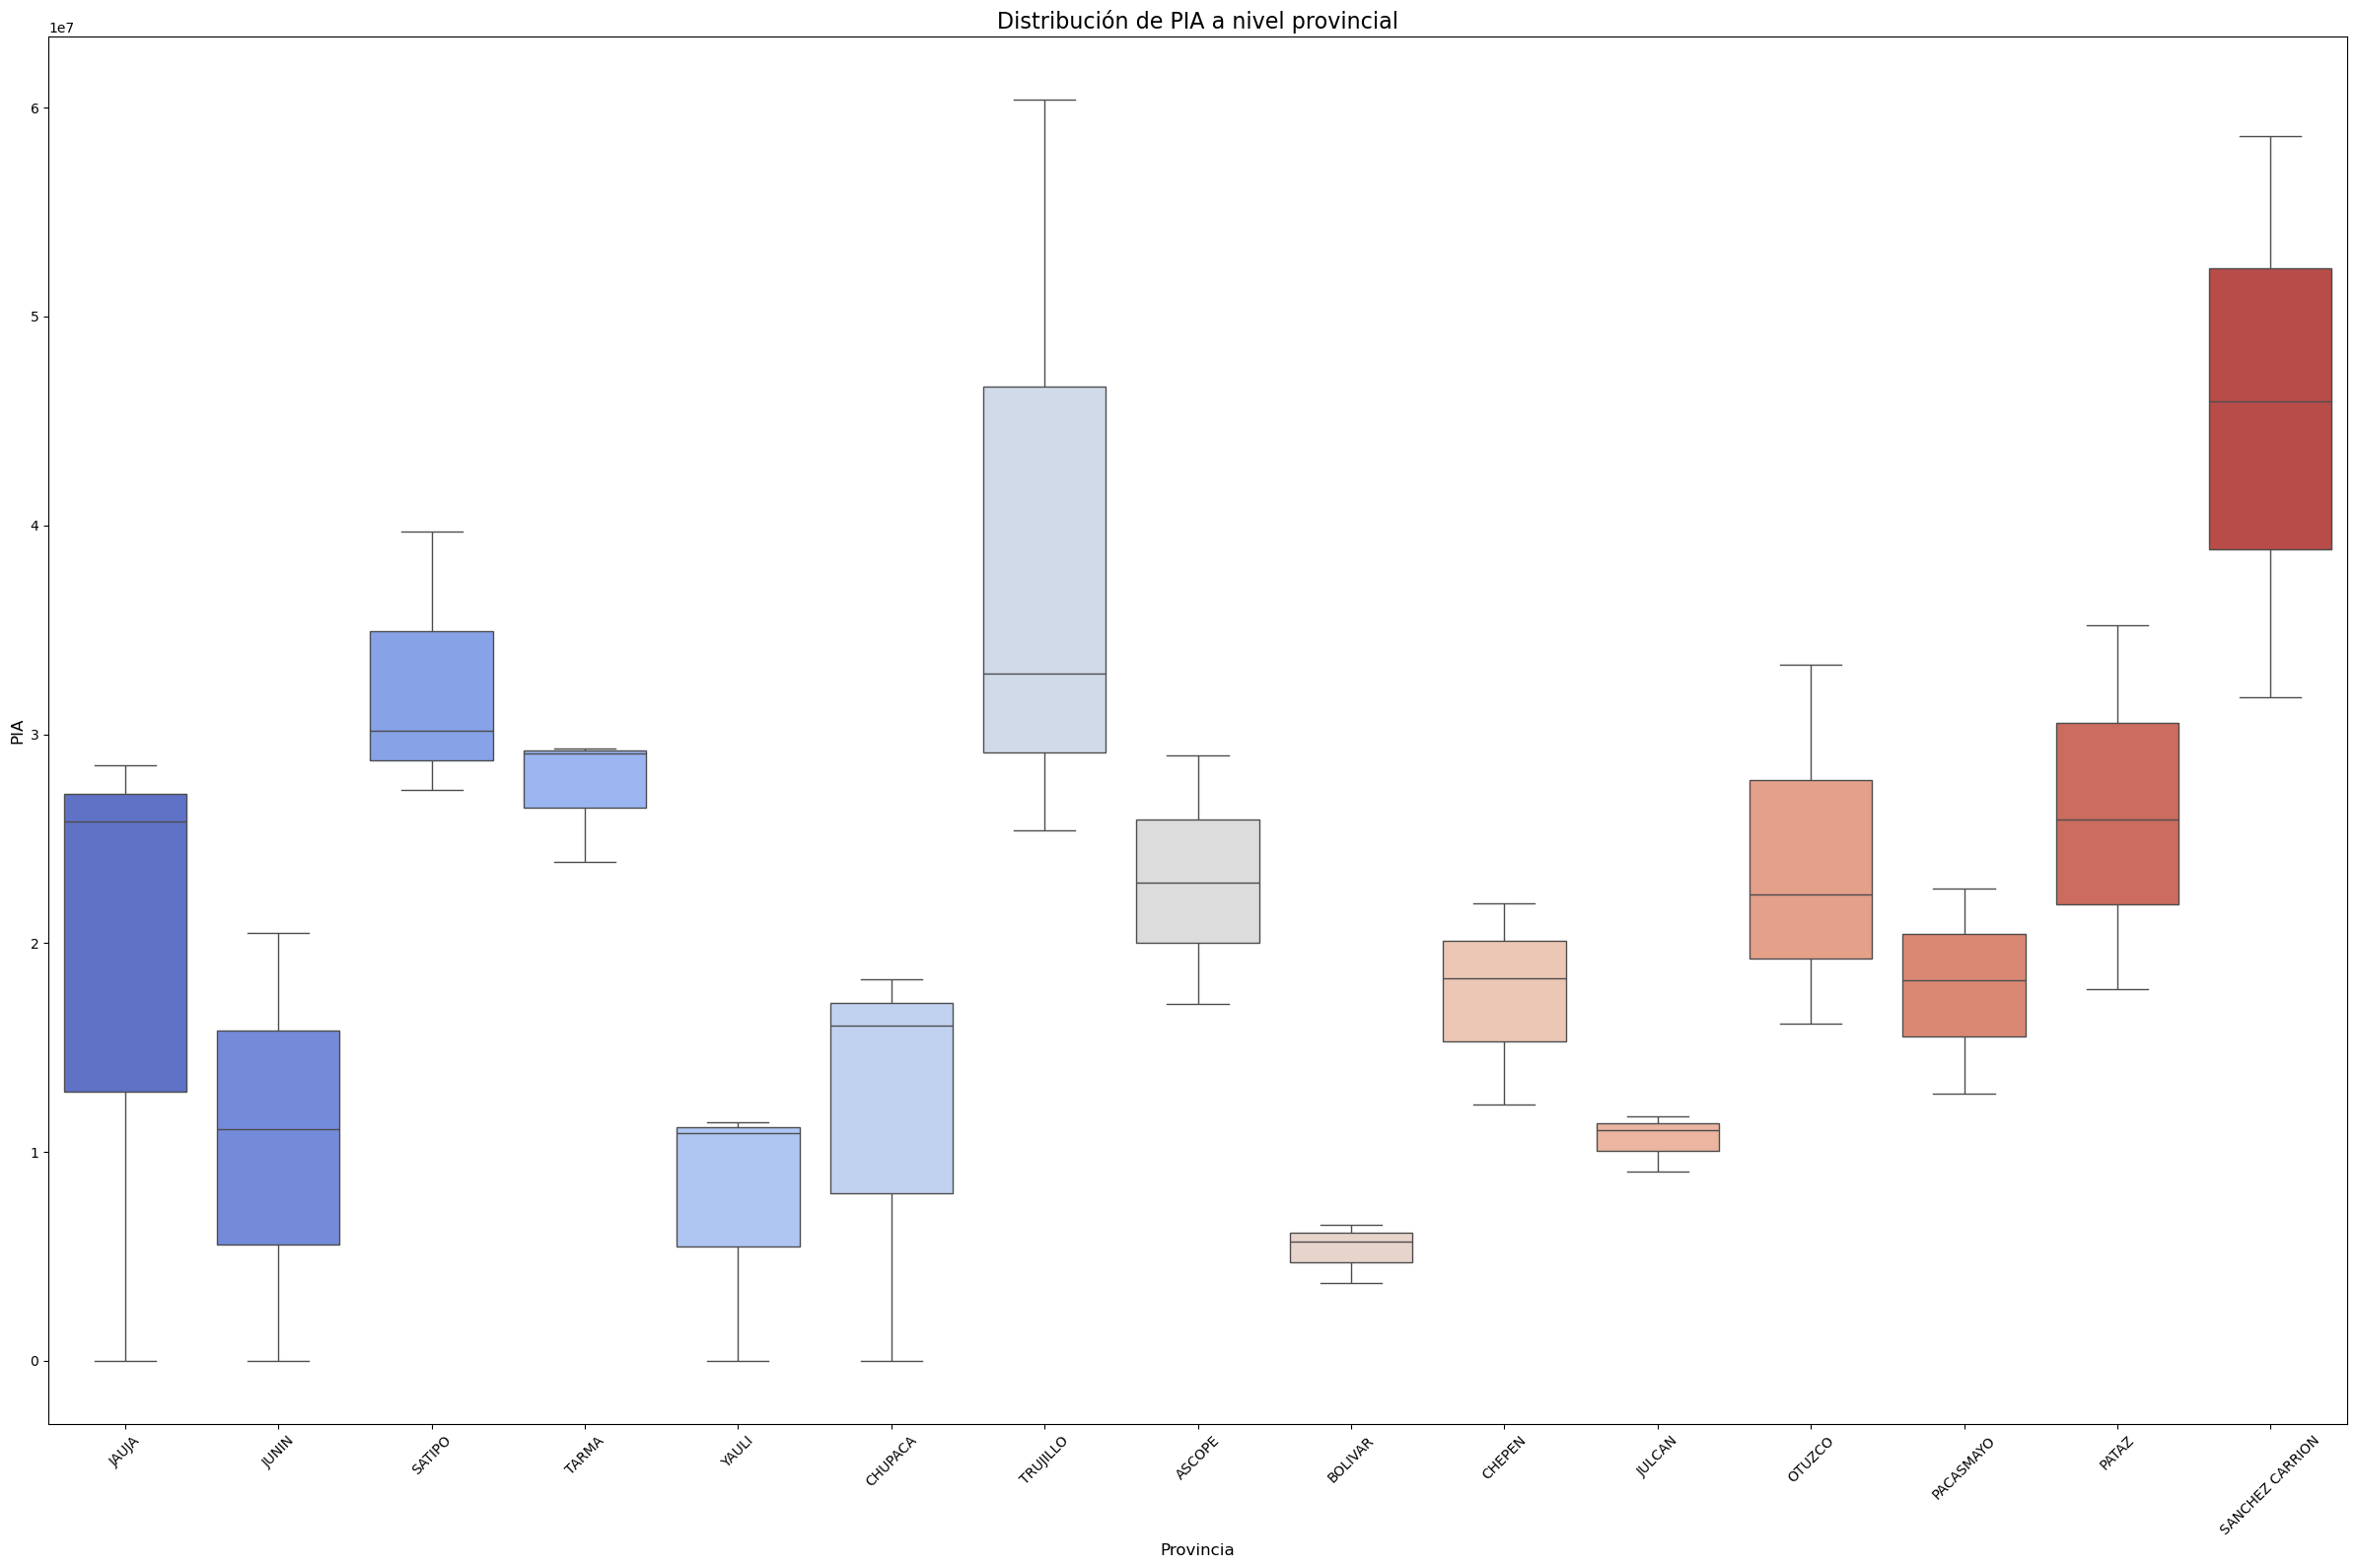

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


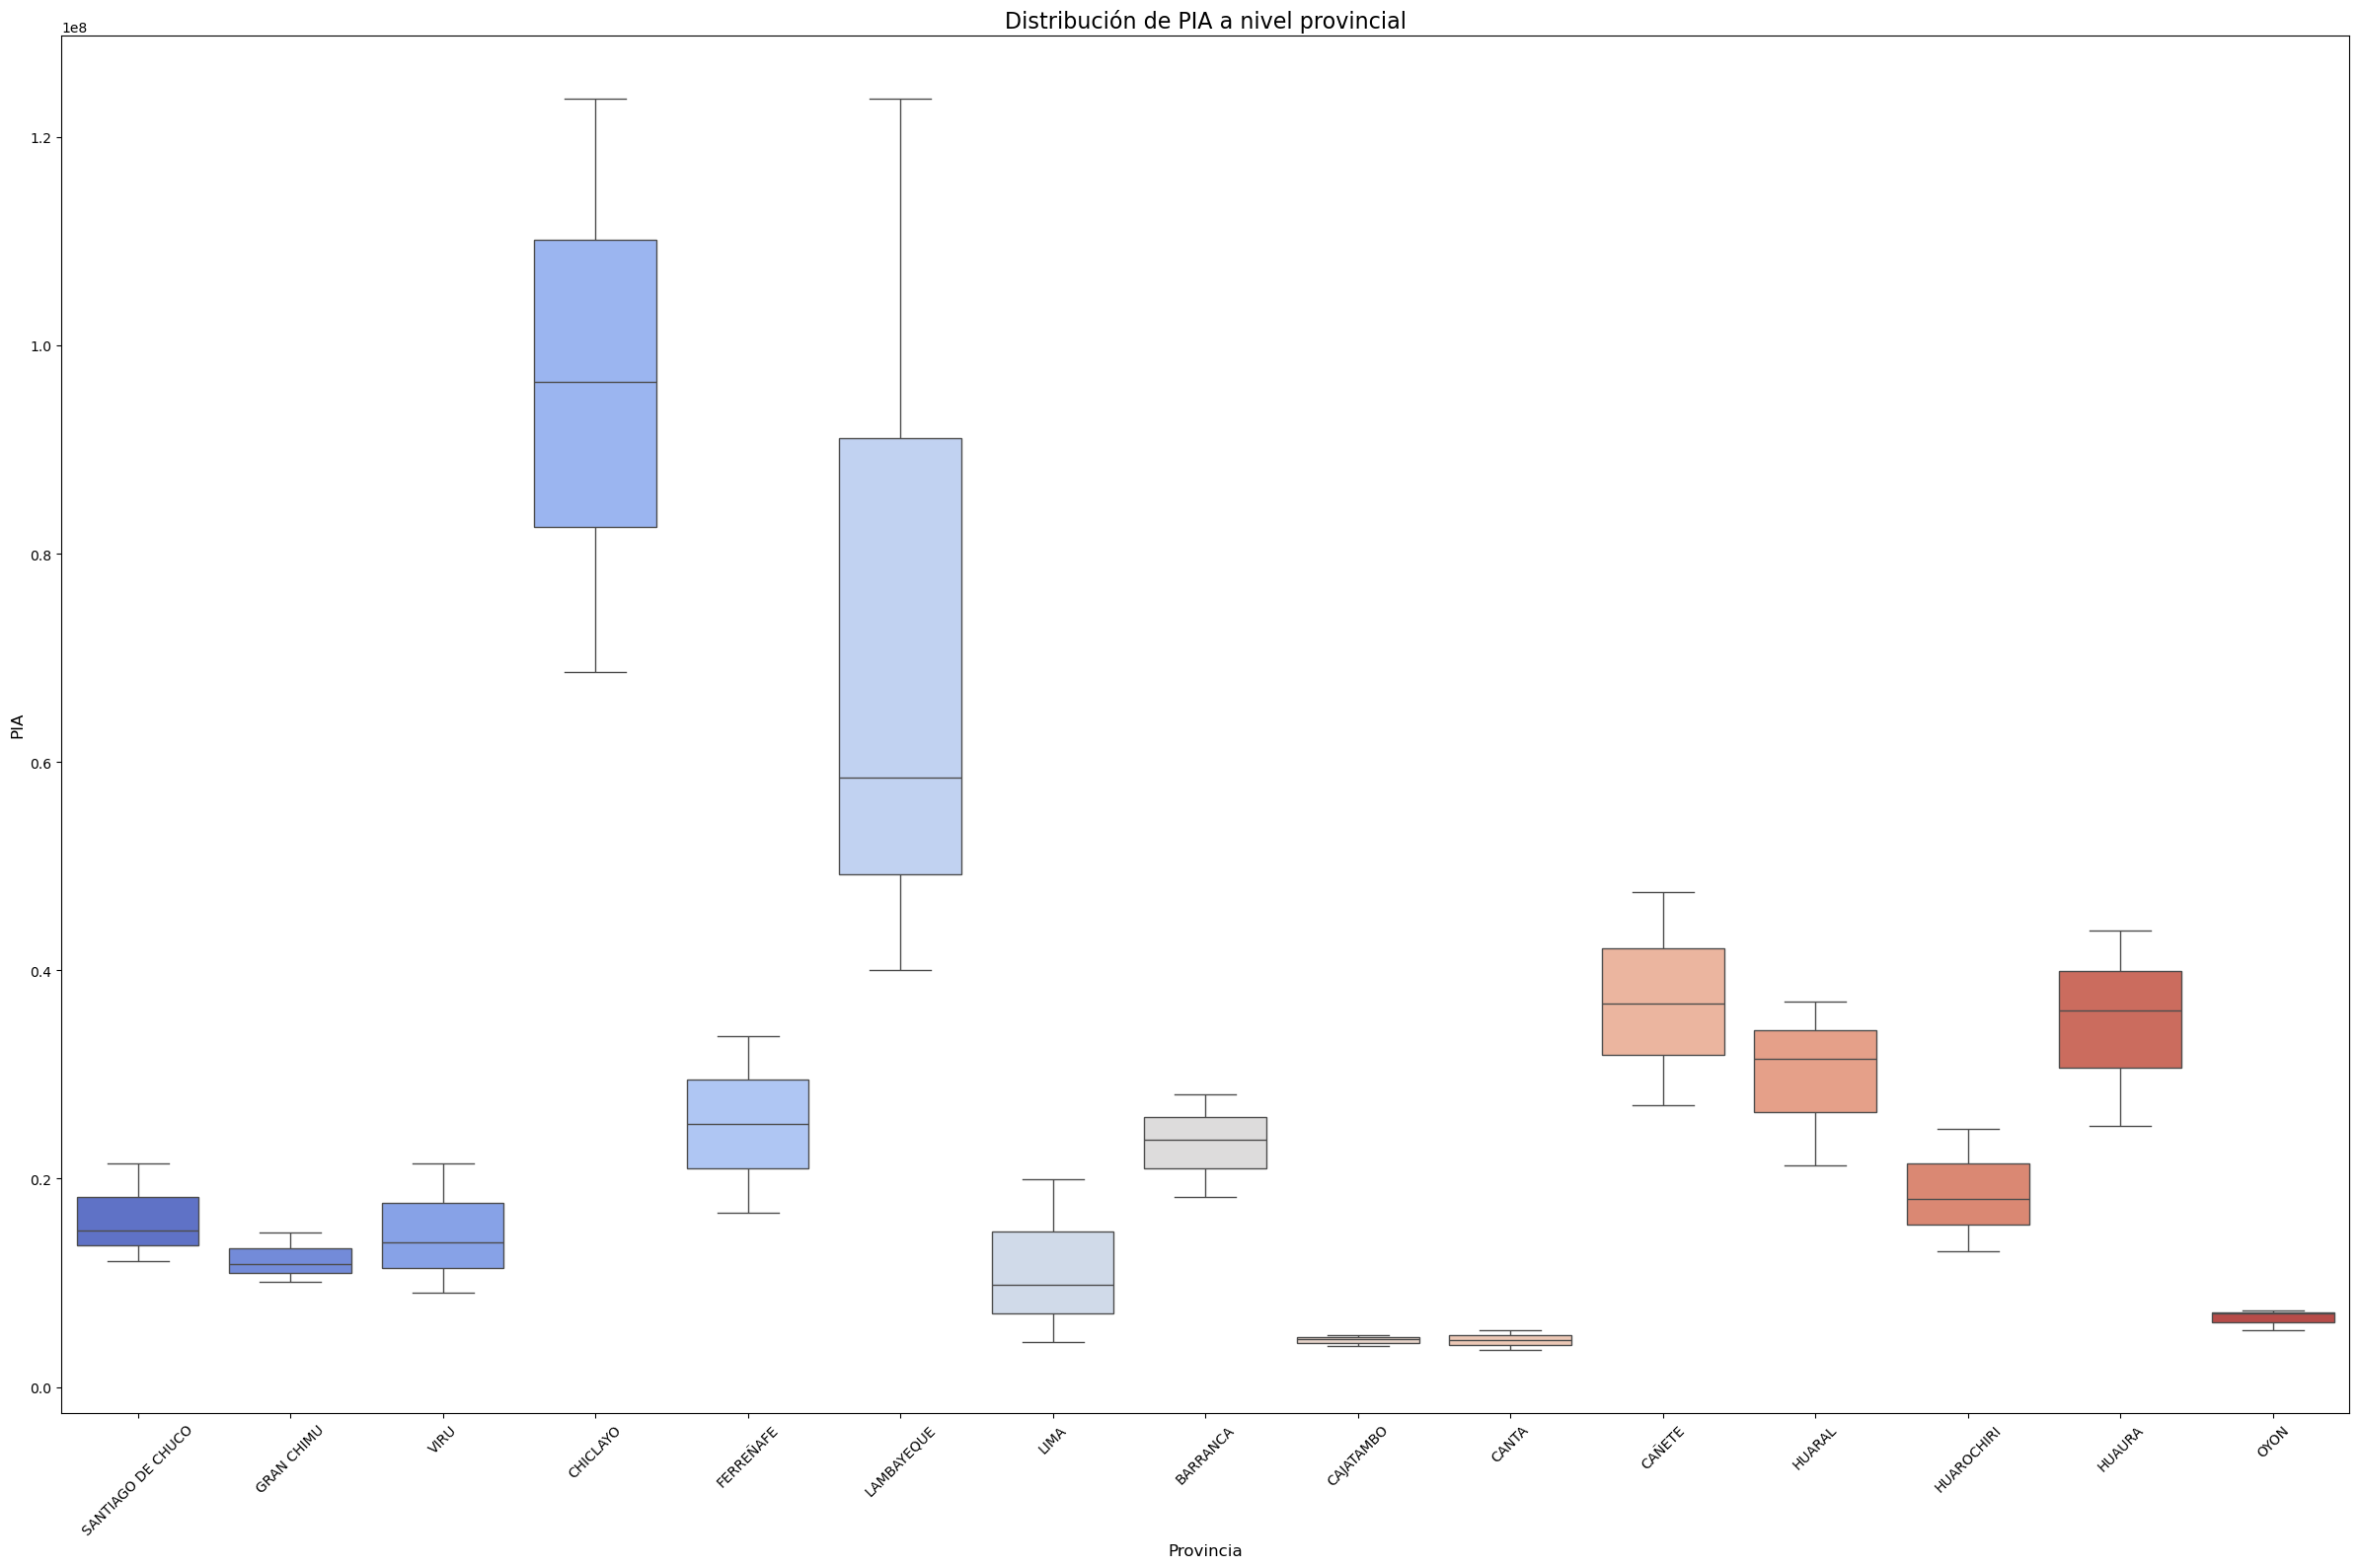

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


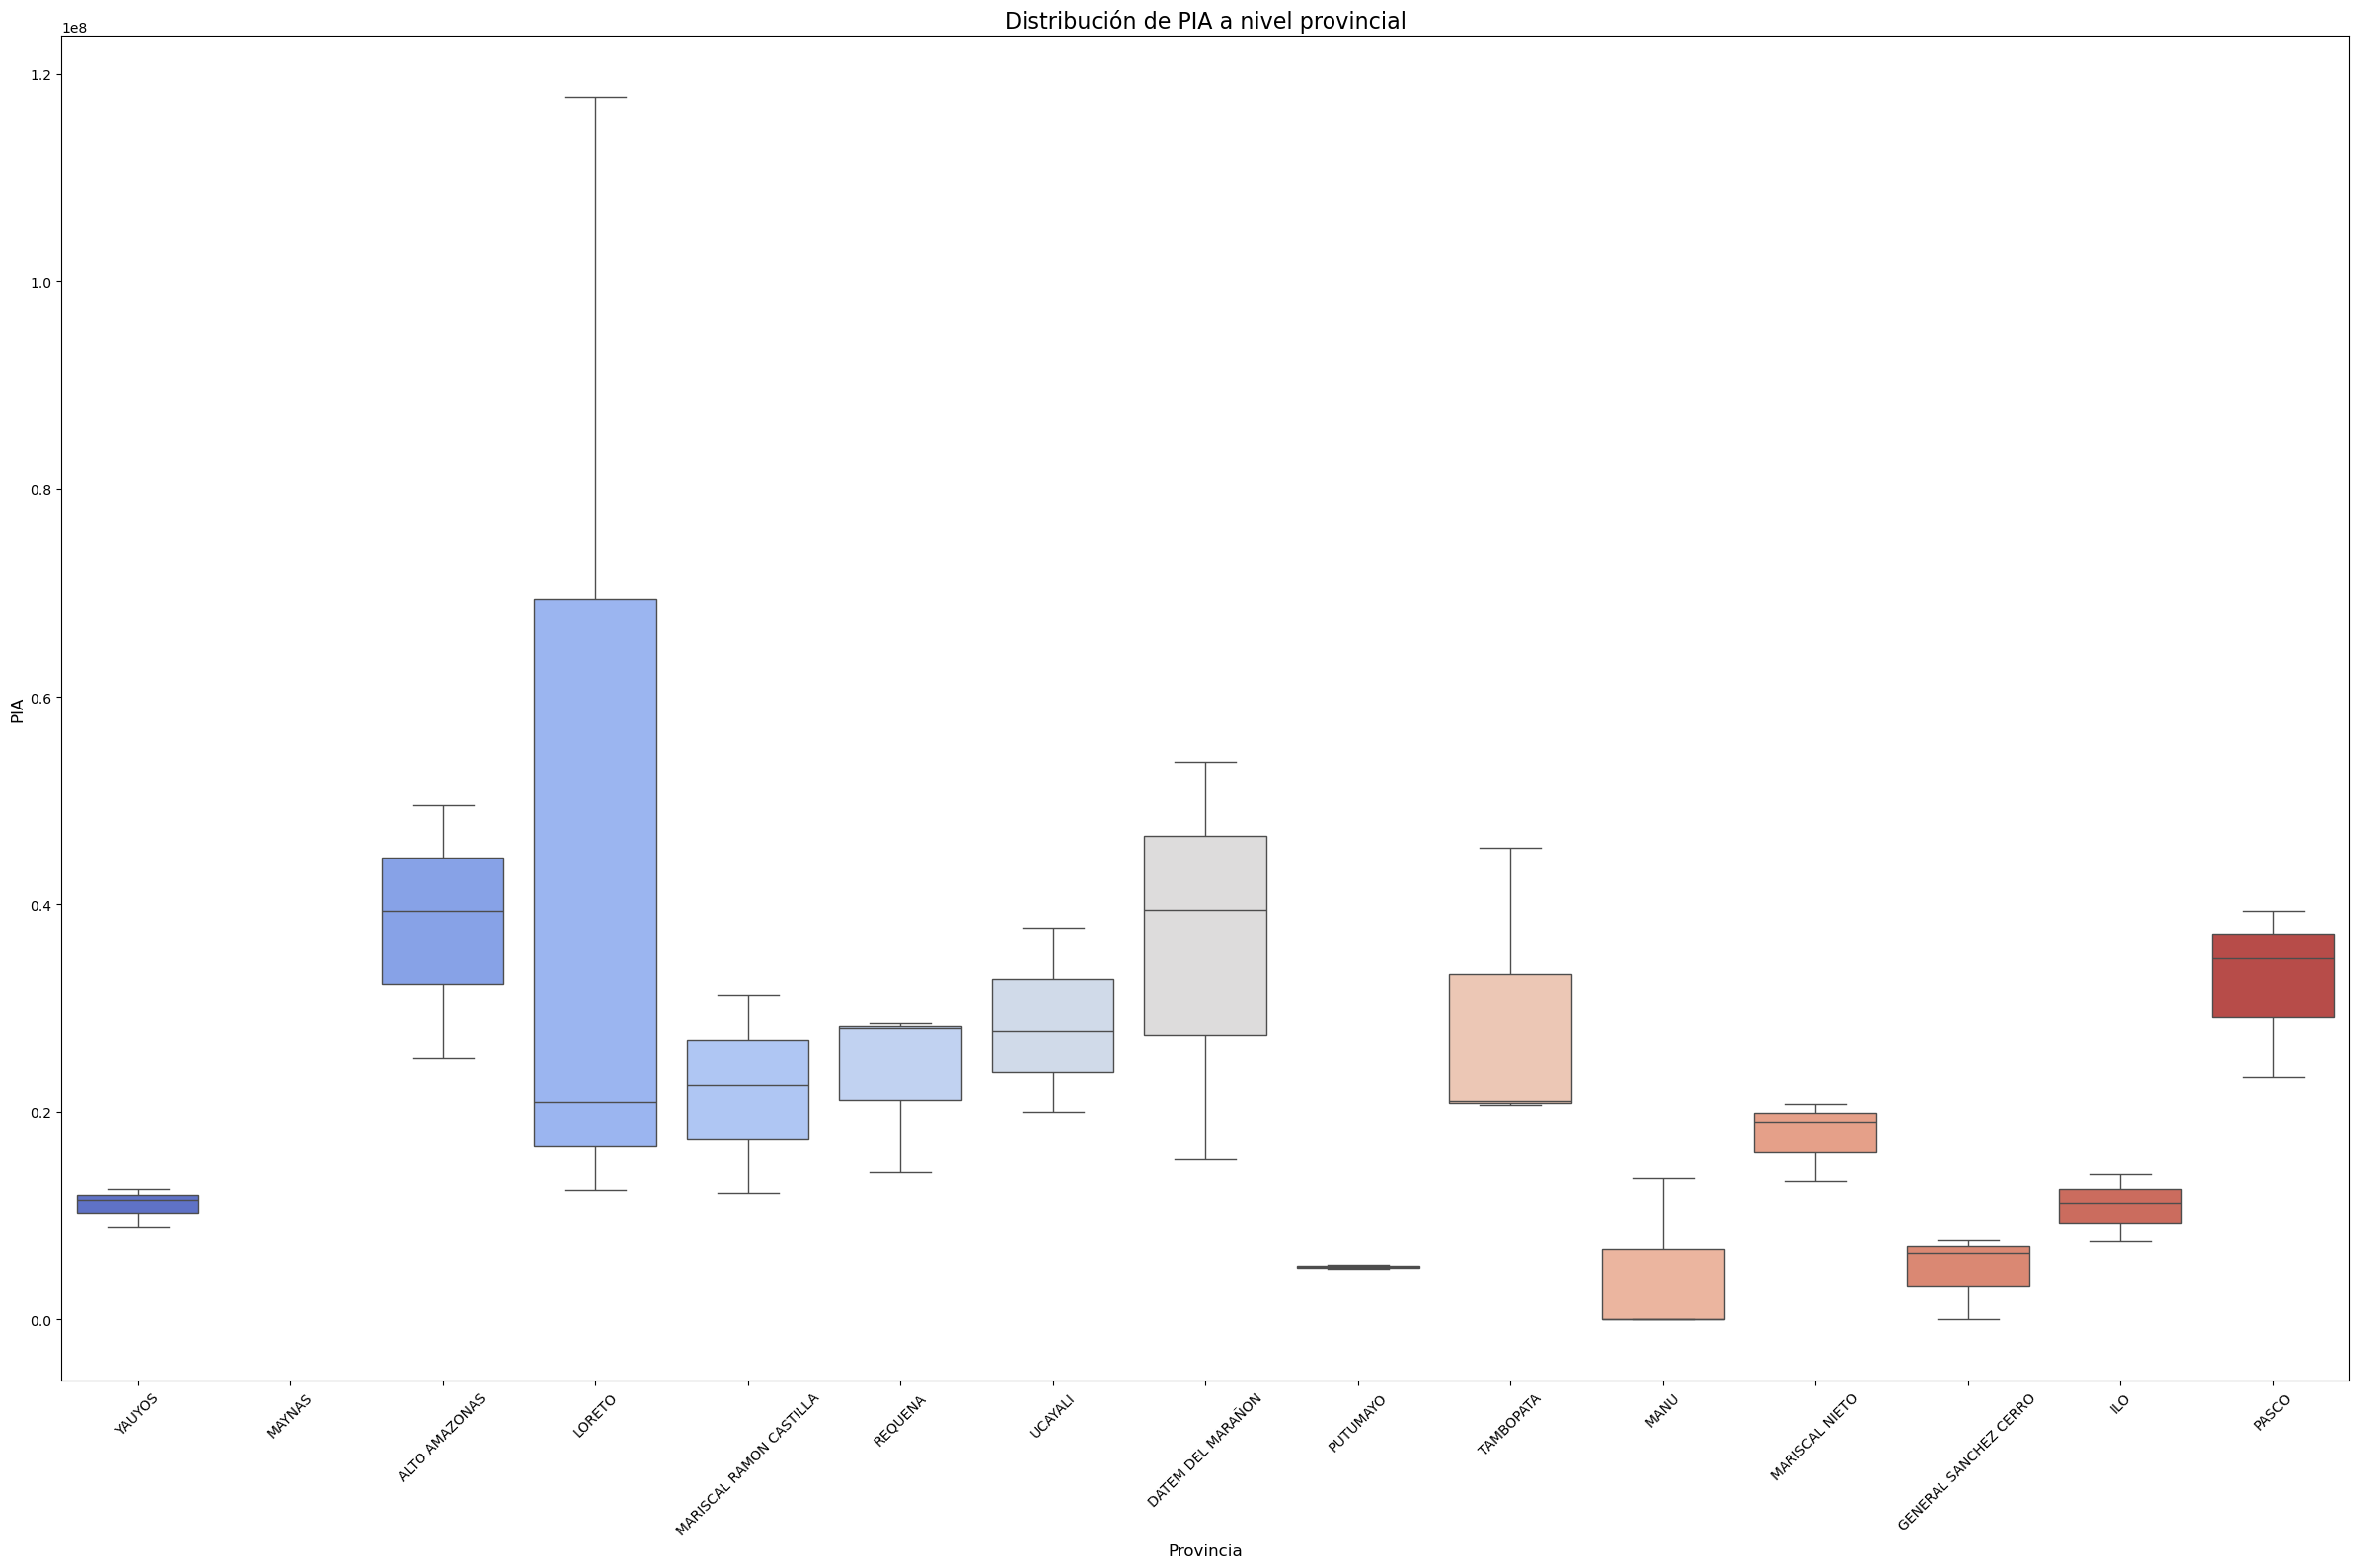

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


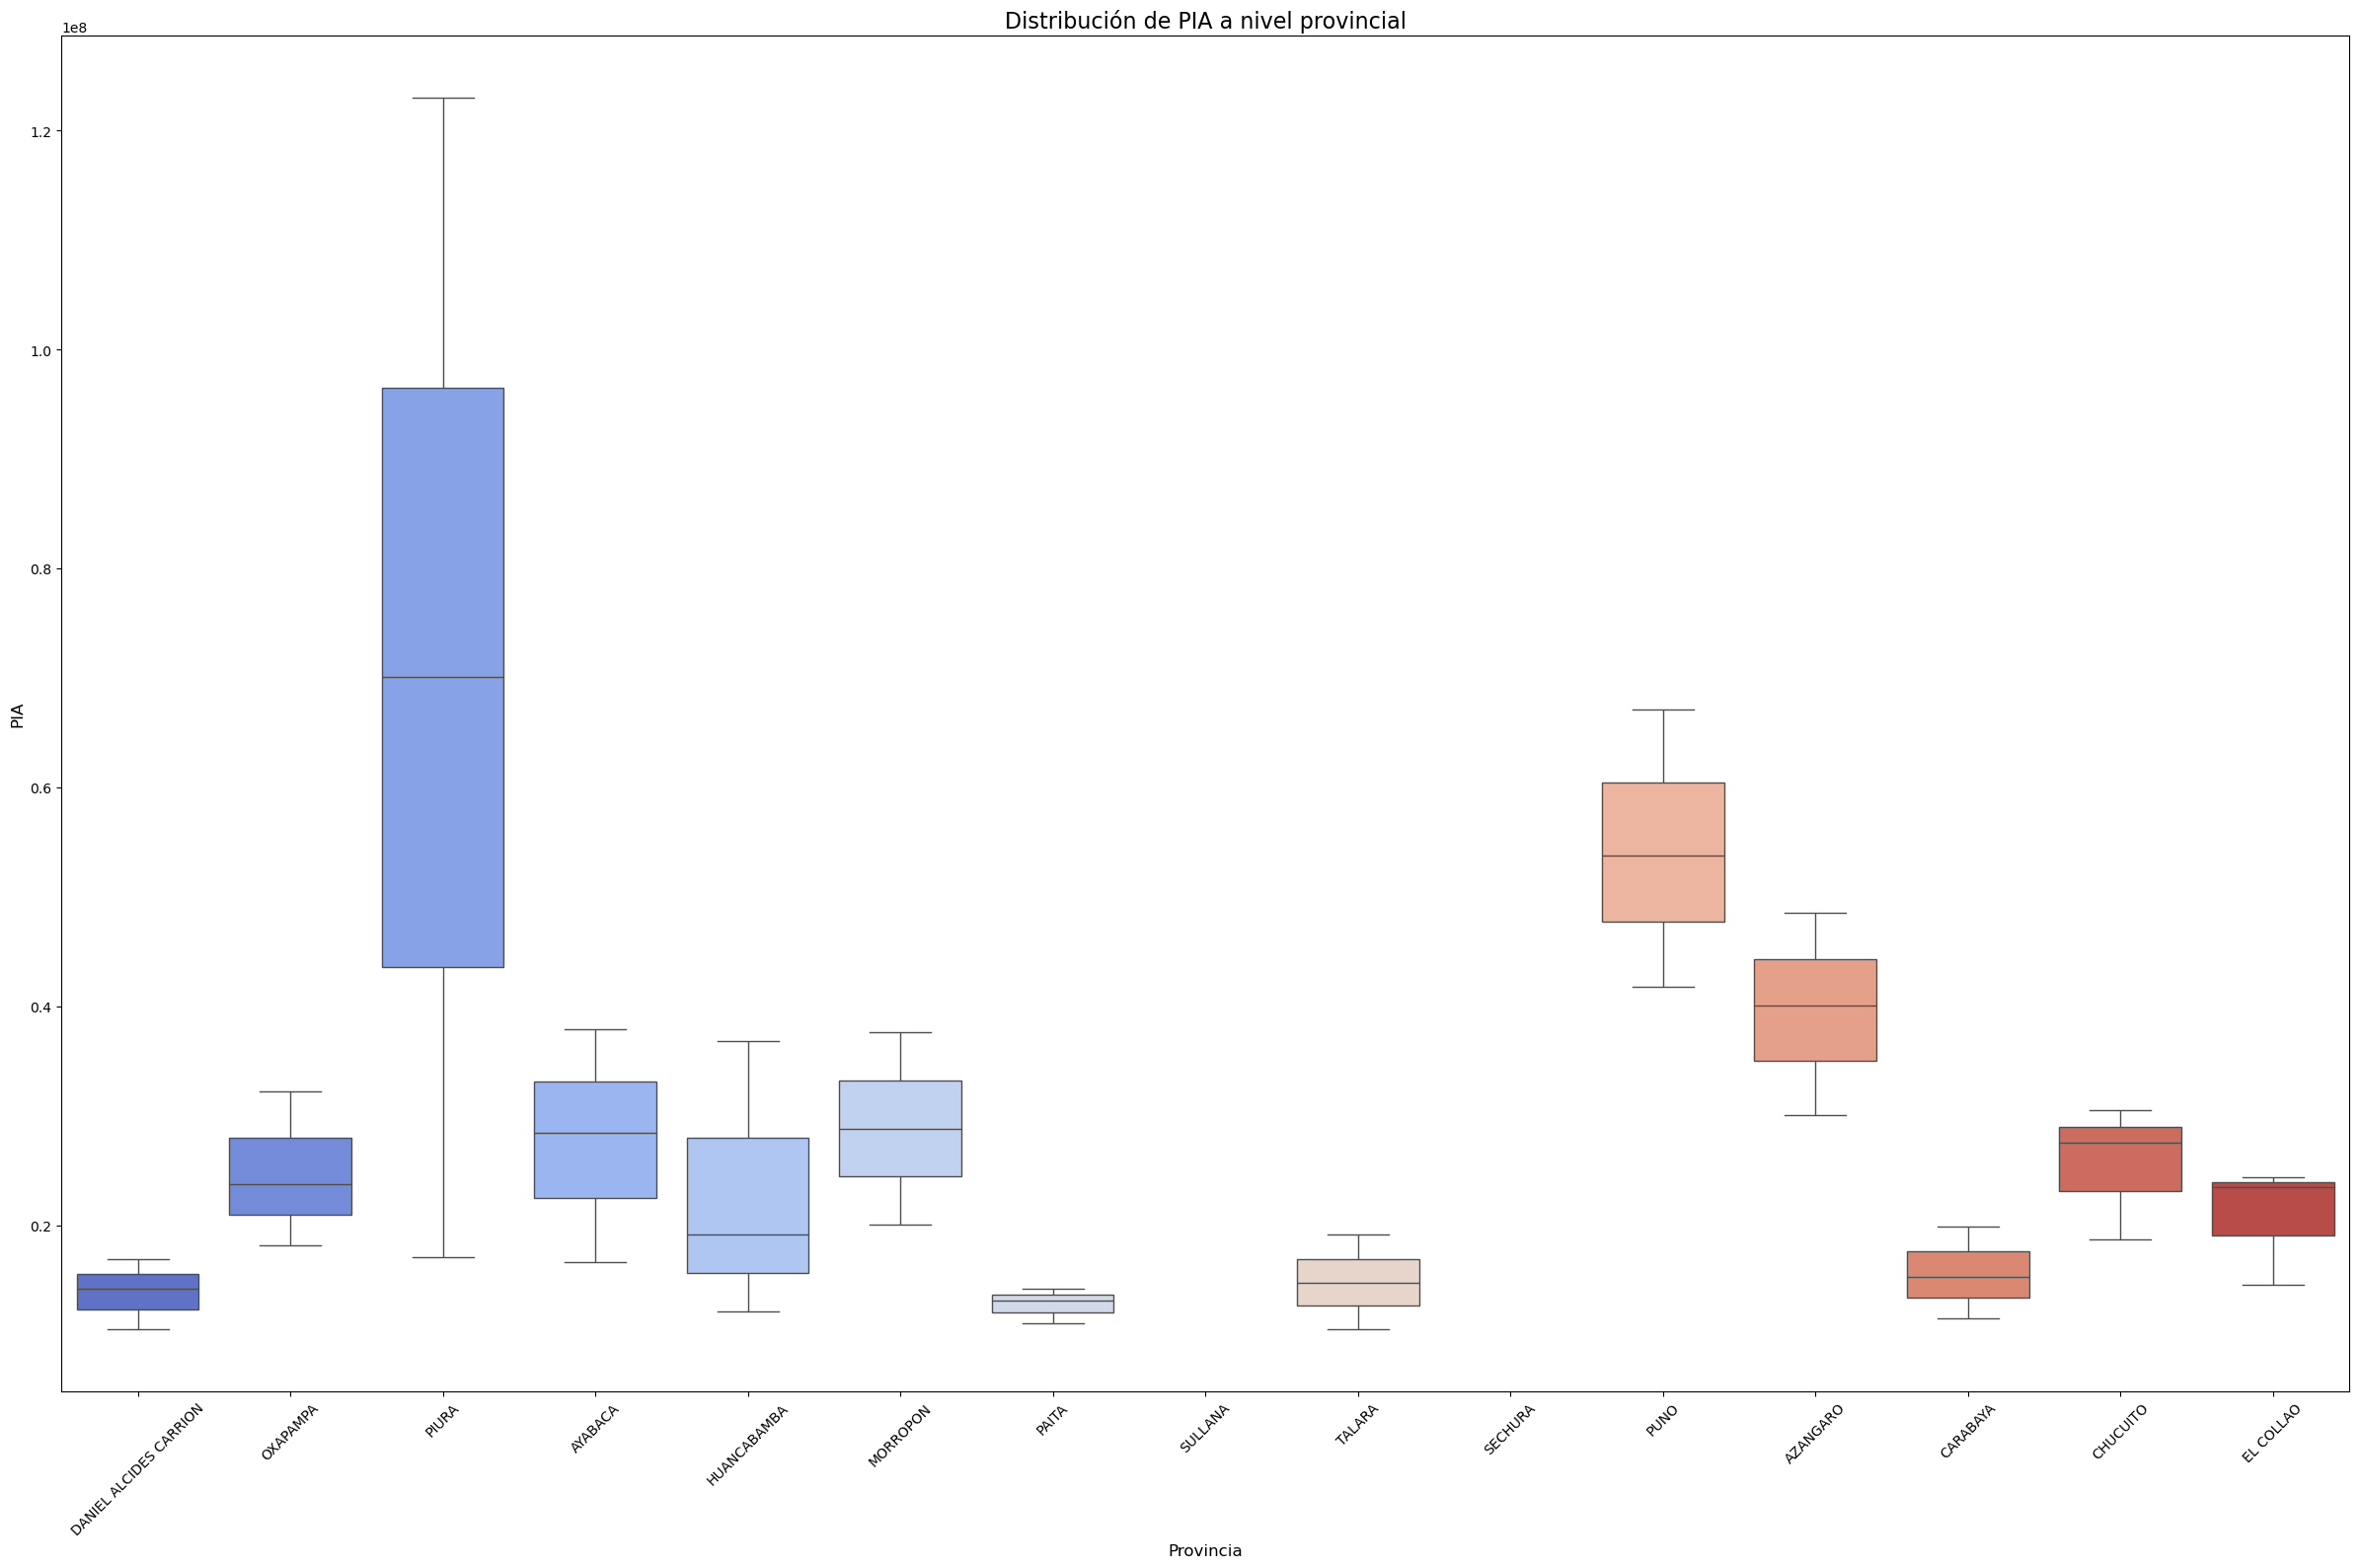

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


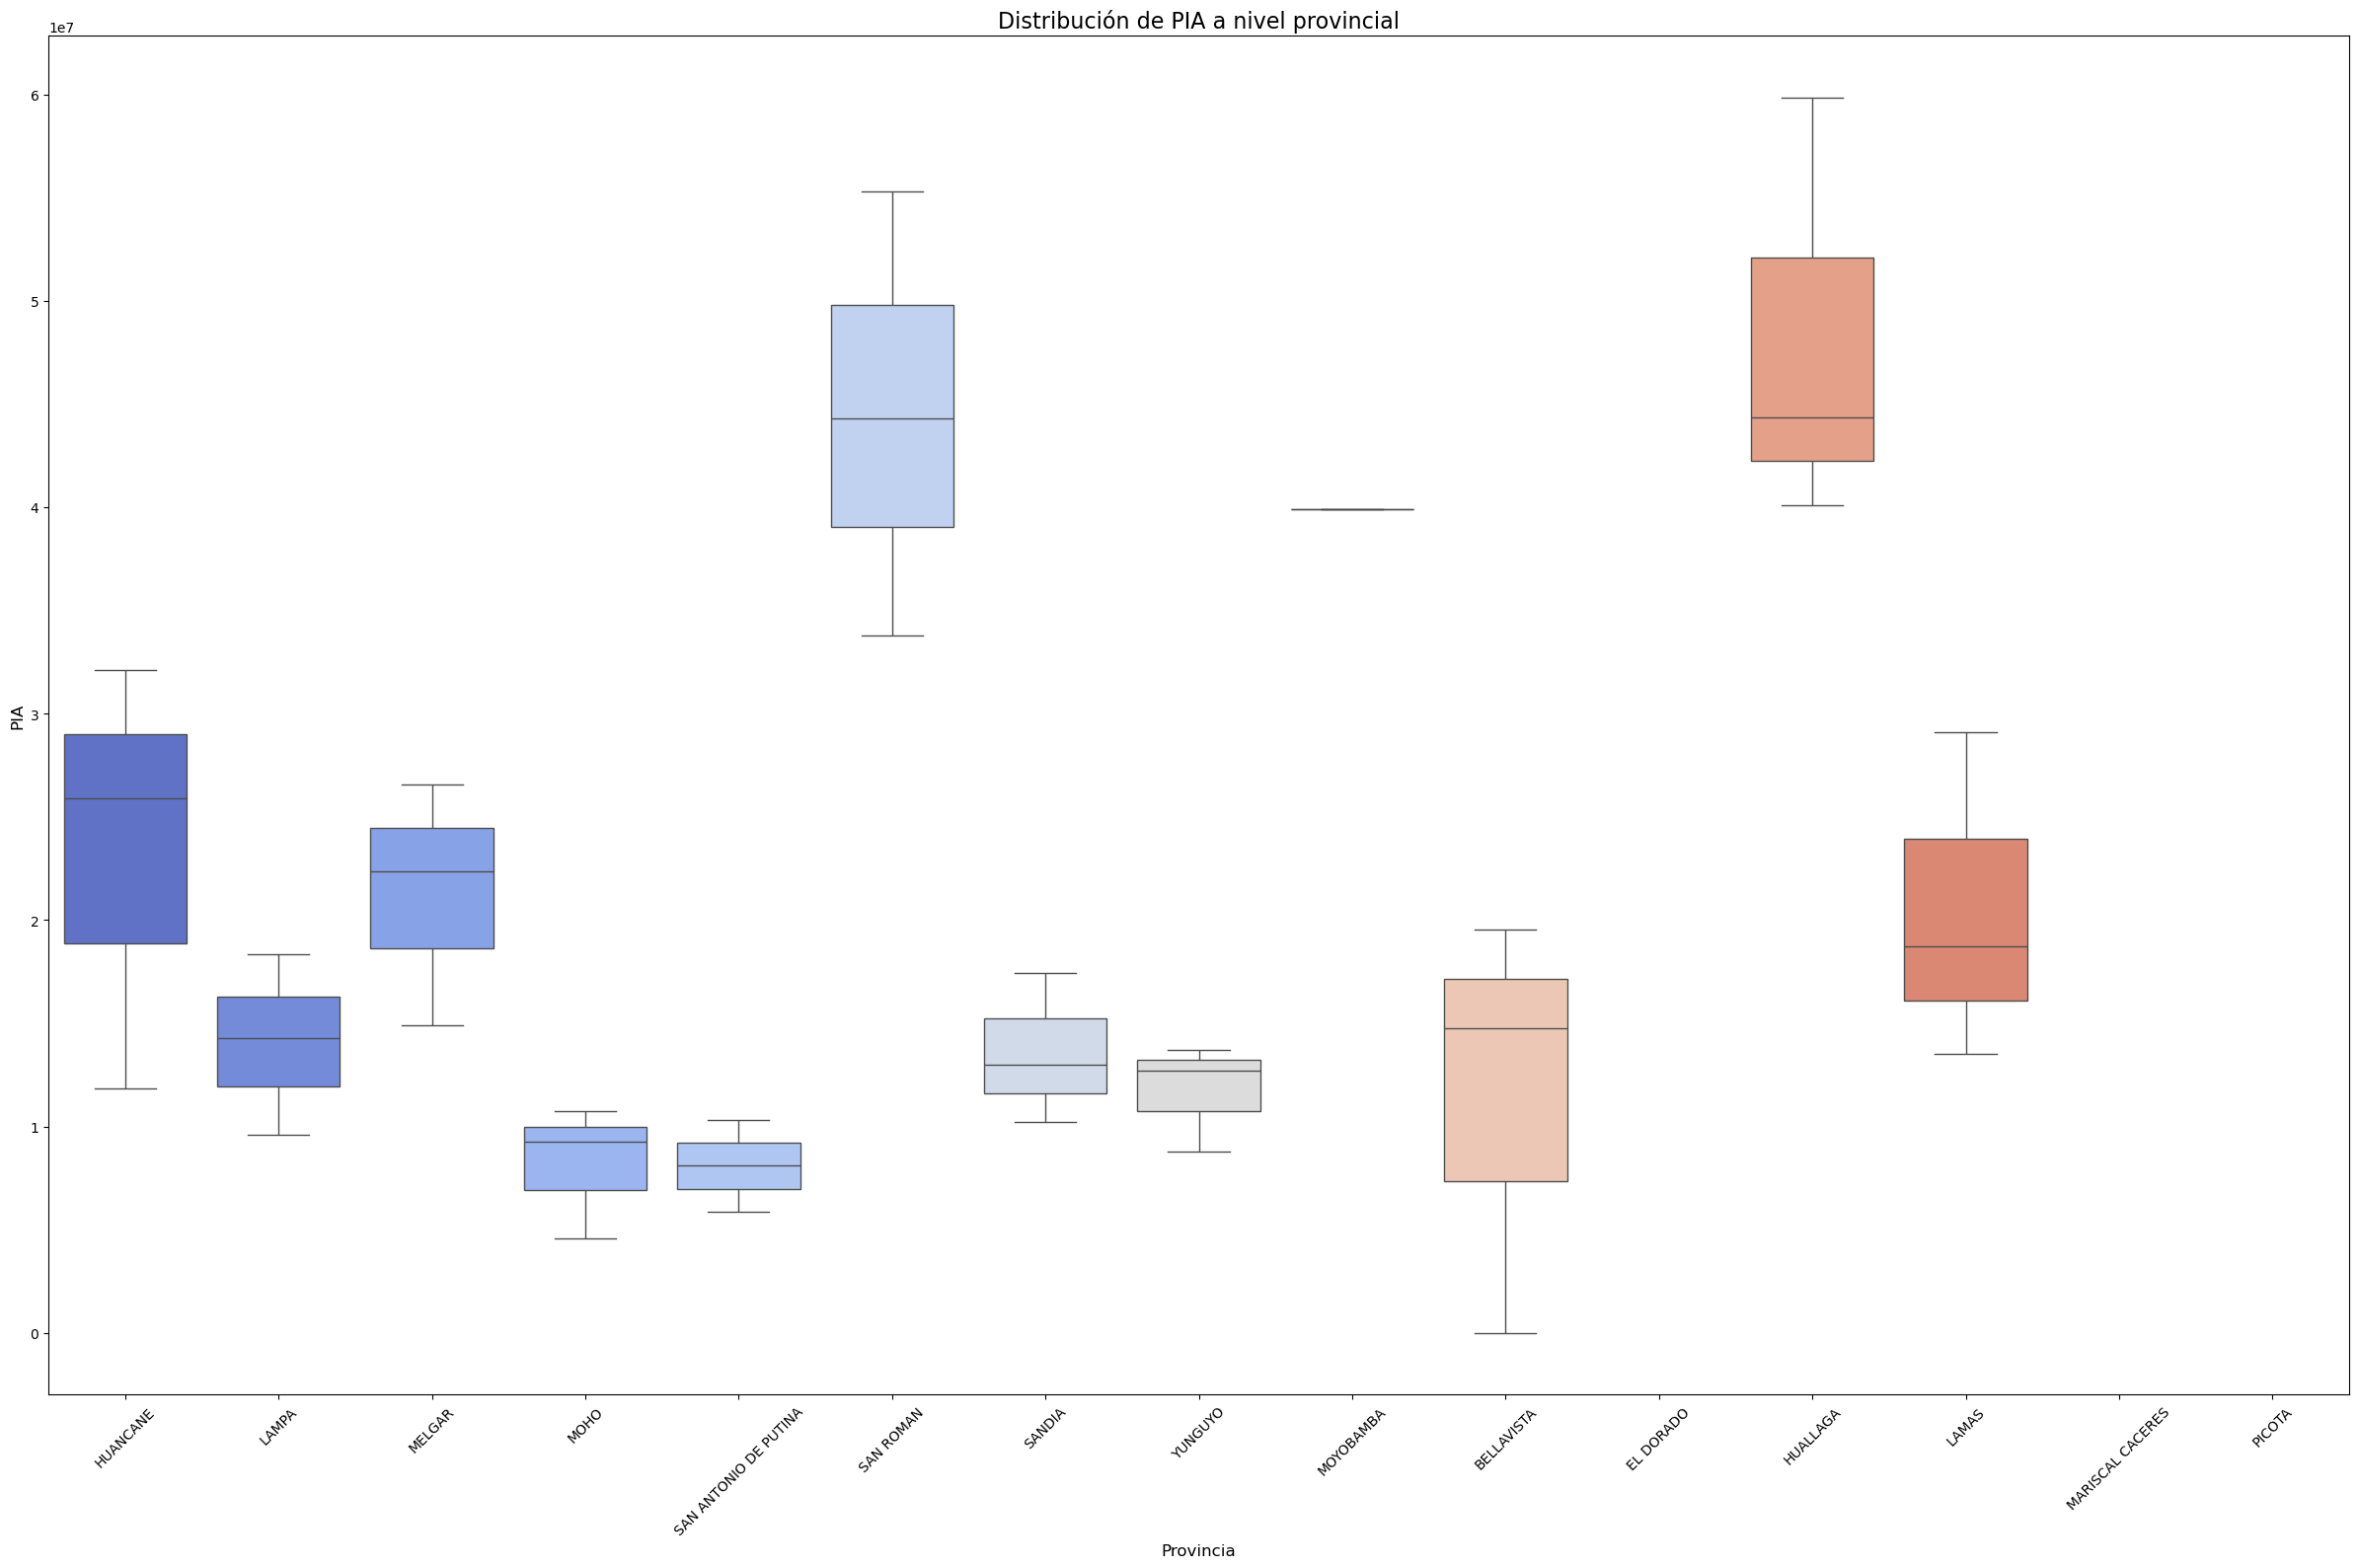

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3163649071.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


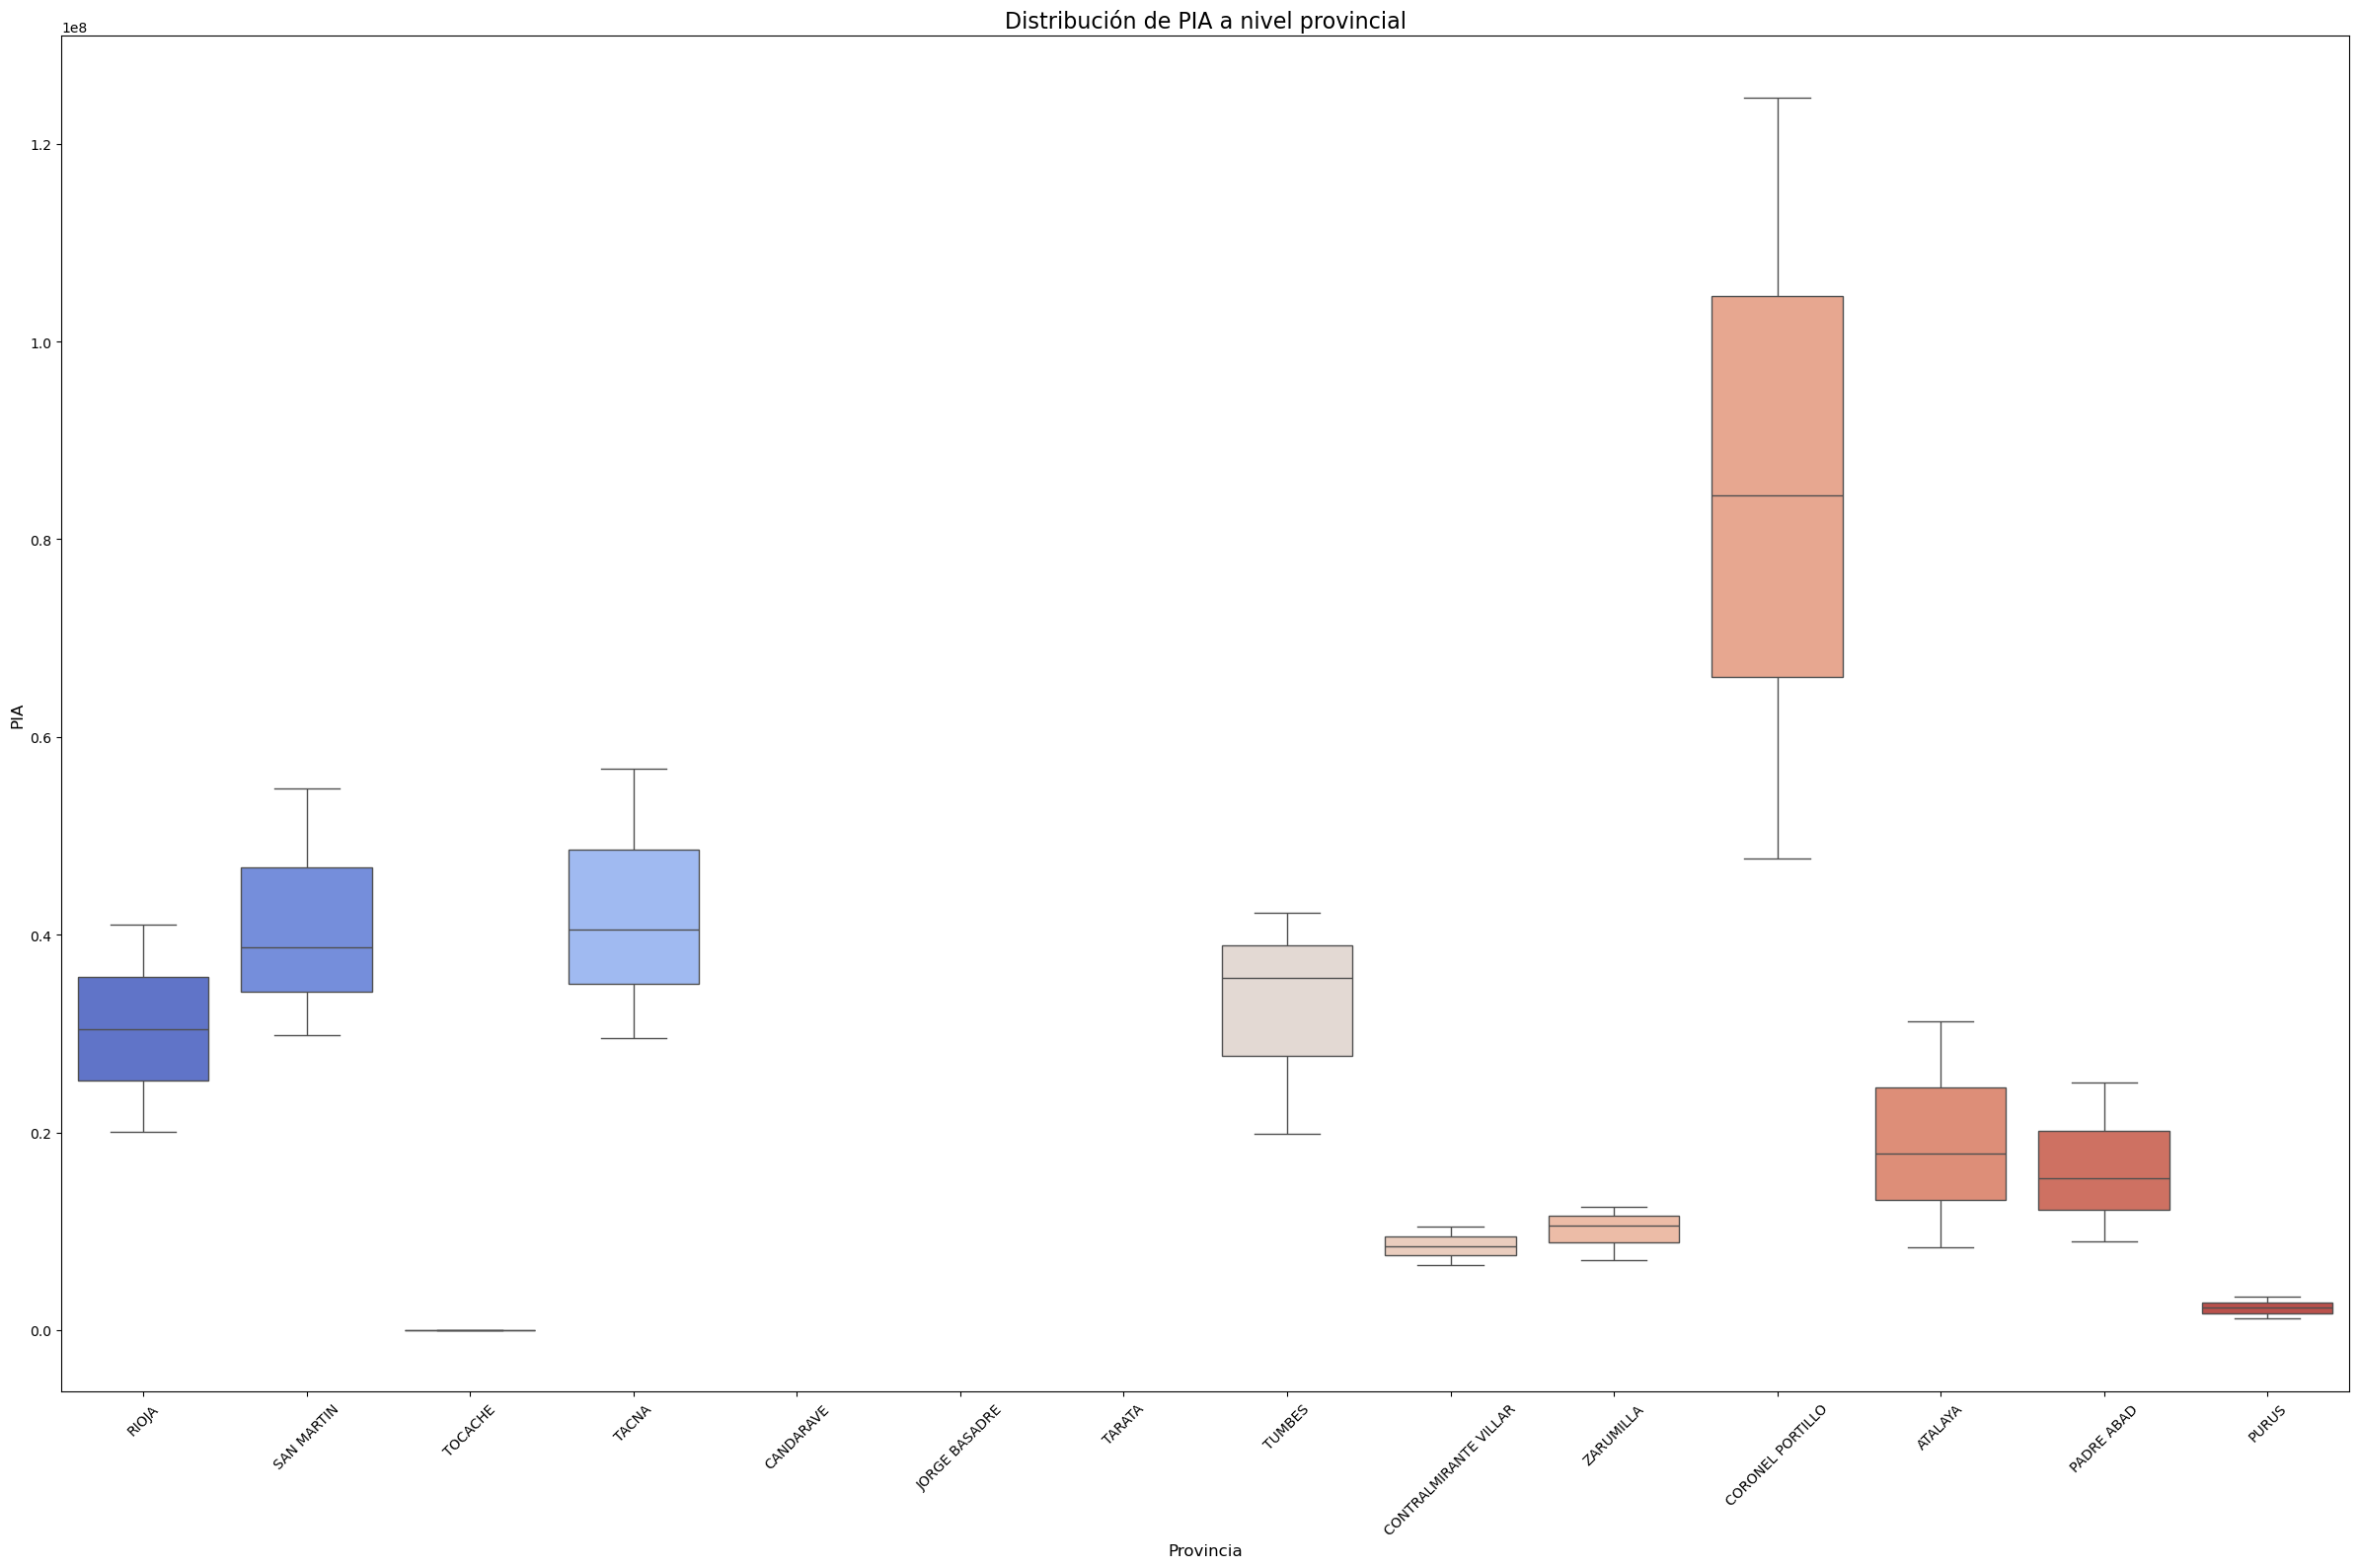

In [472]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que los datos estén en formato largo
years_columns = ['2015', '2019', '2023']  # Ajustar según las columnas disponibles
data_long = gdf_provincias.melt(id_vars=['PROVINCIA'], value_vars=years_columns, 
                                var_name='Año', value_name='Presupuesto')

provincias = data_long['PROVINCIA'].unique()

# Número de provincias y el número de grupos
num_provincias = len(provincias)
num_groups = (num_provincias + 14) // 15  # Agrupar en lotes de 15 provincias

for i in range(num_groups):
    plt.figure(figsize=(24, 16))  # Tamaño del gráfico
    
    provincias_subset = provincias[i*15:(i*15)+15]
    data_subset = data_long[data_long['PROVINCIA'].isin(provincias_subset)]
    
    # Boxplot
    sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')
    
    # Personalizamos
    plt.xticks(rotation=45)  # Rote los nombres de las provincias para mejor visibilidad
    plt.title(f'Distribución de PIA a nivel provincial', fontsize=16)
    plt.xlabel('Provincia', fontsize=12)
    plt.ylabel('PIA', fontsize=12)
    
    plt.tight_layout()
    plt.show()


In [474]:
import pandas as pd
LinkData3="https://docs.google.com/spreadsheets/d/14-EEigbH069IlLtJlqHK6ZsN36FqTaky-KQRyKRM37Y/export?format=csv"
presupuesto = pd.read_csv(LinkData3,
                          index_col=0)
presupuesto

Provincia    PIA_2015        2015  Girado_2015  \
DEPARTAMENTO                                                          
AMAZONAS                 BAGUA  41683146.0  53681152.0   53649195.0   
AMAZONAS               BONGARA         NaN         NaN          NaN   
AMAZONAS           CHACHAPOYAS         NaN         NaN          NaN   
AMAZONAS          CONDORCANQUI  13004732.0  18640853.0   18622565.0   
AMAZONAS                  LUYA         NaN         NaN          NaN   
...                        ...         ...         ...          ...   
UCAYALI                ATALAYA   8398518.0  10749421.0   10584720.0   
UCAYALI       CORONEL PORTILLO  47749416.0  64281149.0   64099088.0   
UCAYALI             PADRE ABAD   9016967.0  11624186.0   11541498.0   
UCAYALI                  PURUS   1158834.0   1488118.0    1463857.0   
NaN                        NaN        24.0         NaN          NaN   

                PIA_2019         2019  Girado_2019     PIA_2023         2023  \
DEPARTAMENTO                                                                   
AMAZONAS      69006973.0   84742394.0   84588597.0   65298281.0   72158176.0   
AMAZONAS             NaN          NaN          NaN          NaN          NaN   
AMAZONAS             NaN          NaN          NaN          NaN          NaN   
AMAZONAS      29195769.0   36255386.0   35881268.0   41028381.0   47935501.0   
AMAZONAS             NaN          NaN          NaN          NaN          NaN   
...                  ...          ...          ...          ...          ...   
UCAYALI       17840272.0   25406385.0   25356769.0   31281617.0   36205321.0   
UCAYALI       84435603.0  106468859.0  105409490.0  124679166.0  146804784.0   
UCAYALI       15401527.0   20198119.0   20089967.0   25002545.0   30167025.0   
UCAYALI        2316809.0    3717706.0    3551368.0    3355599.0    3429678.0   
NaN                  NaN          NaN          NaN          NaN          NaN   

              Girado_2023  
DEPARTAMENTO               
AMAZONAS       72122274.0  
AMAZONAS              NaN  
AMAZONAS              NaN  
AMAZONAS       47915560.0  
AMAZONAS              NaN  
...                   ...  
UCAYALI        36185199.0  
UCAYALI       146752535.0  
UCAYALI        30140125.0  
UCAYALI         3428278.0  
NaN                   NaN  

[195 rows x 10 columns]

In [476]:
presupuesto['Provincia']=presupuesto.Provincia.str.upper()
presupuesto.head()

Provincia    PIA_2015        2015  Girado_2015    PIA_2019  \
DEPARTAMENTO                                                                  
AMAZONAS             BAGUA  41683146.0  53681152.0   53649195.0  69006973.0   
AMAZONAS           BONGARA         NaN         NaN          NaN         NaN   
AMAZONAS       CHACHAPOYAS         NaN         NaN          NaN         NaN   
AMAZONAS      CONDORCANQUI  13004732.0  18640853.0   18622565.0  29195769.0   
AMAZONAS              LUYA         NaN         NaN          NaN         NaN   

                    2019  Girado_2019    PIA_2023        2023  Girado_2023  
DEPARTAMENTO                                                                
AMAZONAS      84742394.0   84588597.0  65298281.0  72158176.0   72122274.0  
AMAZONAS             NaN          NaN         NaN         NaN          NaN  
AMAZONAS             NaN          NaN         NaN         NaN          NaN  
AMAZONAS      36255386.0   35881268.0  41028381.0  47935501.0   47915560.0  
AMAZONAS             NaN          NaN         NaN         NaN          NaN

NOMBRES DIFERENTES EN AMBAS DATAS:

In [484]:
onlyPresupuesto

{nan}

In [486]:
onlyMap

{'CALLAO', 'TAHUAMANU'}

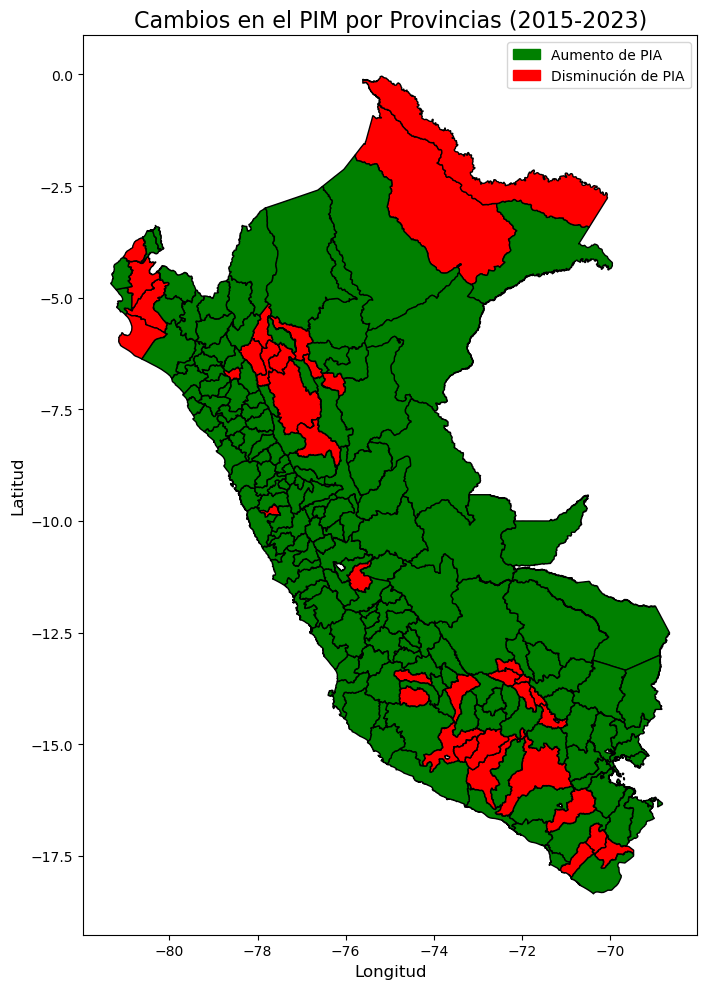

In [498]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
gdf = theMapAndData
gdf['change'] = gdf['2023'] - gdf['2015']
gdf['trend'] = gdf['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')
colors = {'increase': 'green', 'decrease': 'red'}
fig, ax = plt.subplots(figsize=(12, 10))
gdf.assign(color=gdf['trend'].map(colors)).plot(ax=ax, color=gdf['trend'].map(colors), edgecolor='black')
plt.title('Cambios en el PIM por Provincias (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
legend_elements = [
    patches.Patch(color='green', label='Aumento de PIA'),
    patches.Patch(color='red', label='Disminución de PIA')
]
plt.legend(handles=legend_elements, loc='upper right')
ax.grid(False)
plt.tight_layout()
plt.show()

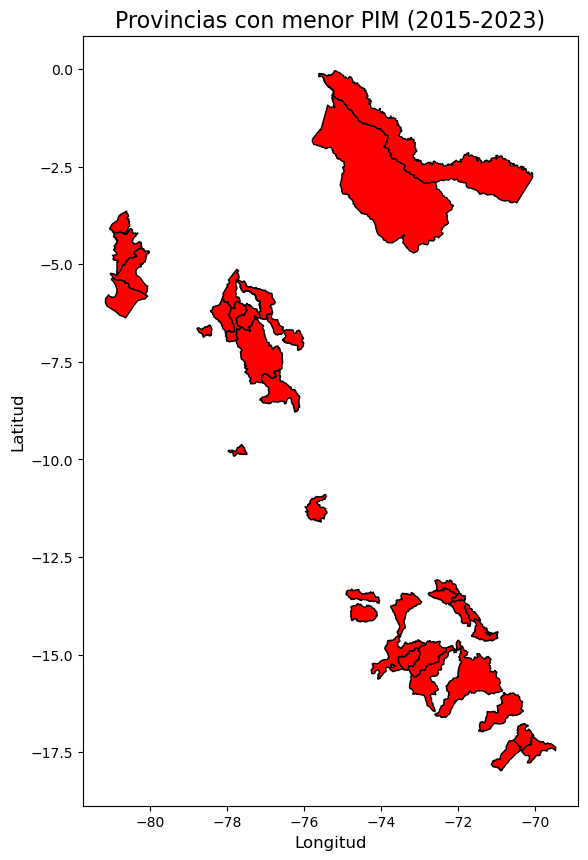

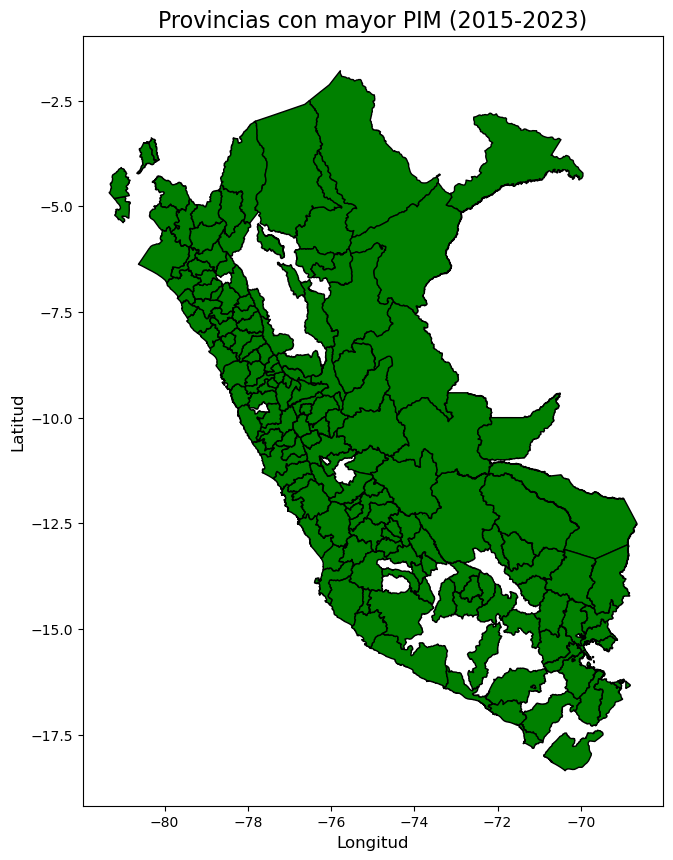

In [502]:
gdf = theMapAndData
#Provincias que disminuyeron el PIA
gdf['change'] = gdf['2023'] - gdf['2015']
gdf['trend'] = gdf['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')
colors = {'increase': 'green', 'decrease': 'red'}
fig, ax = plt.subplots(figsize=(12, 10))
gdf_decrease = gdf[gdf['trend'] == 'decrease']
gdf_decrease.plot(ax=ax, color='red', edgecolor='black')
plt.title('Provincias con menor PIM (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

#Provincias que aumentaron el PIA
fig, ax = plt.subplots(figsize=(12, 10))
gdf_increase = gdf[gdf['trend'] == 'increase']
gdf_increase.plot(ax=ax, color='green', edgecolor='black')
plt.title('Provincias con mayor PIM (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

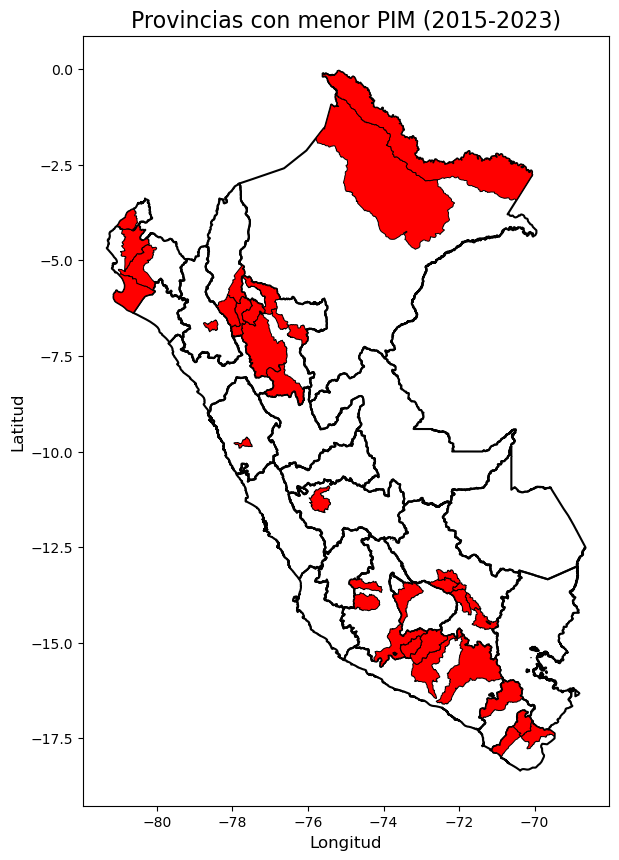

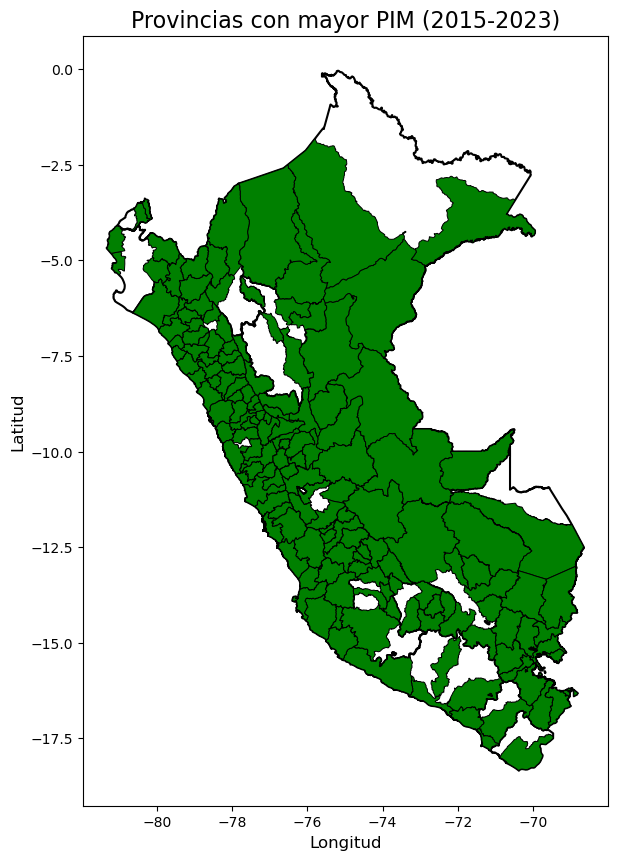

In [504]:
gdf_provincias = theMapAndData
gdf_departamentos = gpd.read_file(os.path.join("data", "Departamentos_2023"))

gdf_provincias['change'] = gdf_provincias['2023'] - gdf_provincias['2015']
gdf_provincias['trend'] = gdf_provincias['change'].apply(lambda x: 'increase' if x > 0 else 'decrease')

# Provincias que disminuyeron las protestas
fig, ax = plt.subplots(figsize=(12, 10))
# Plotear el shapefile de los departamentos
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_decrease = gdf_provincias[gdf_provincias['trend'] == 'decrease']
gdf_decrease.plot(ax=ax, color='red', edgecolor='black', linewidth=0.7)
plt.title('Provincias con menor PIM (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()

# Provincias que aumentaron las protestas
fig, ax = plt.subplots(figsize=(12, 10))
# Plotear el shapefile de los departamentos
gdf_departamentos.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
gdf_increase = gdf_provincias[gdf_provincias['trend'] == 'increase']
gdf_increase.plot(ax=ax, color='green', edgecolor='black', linewidth=0.7)
plt.title('Provincias con mayor PIM (2015-2023)', fontsize=16)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


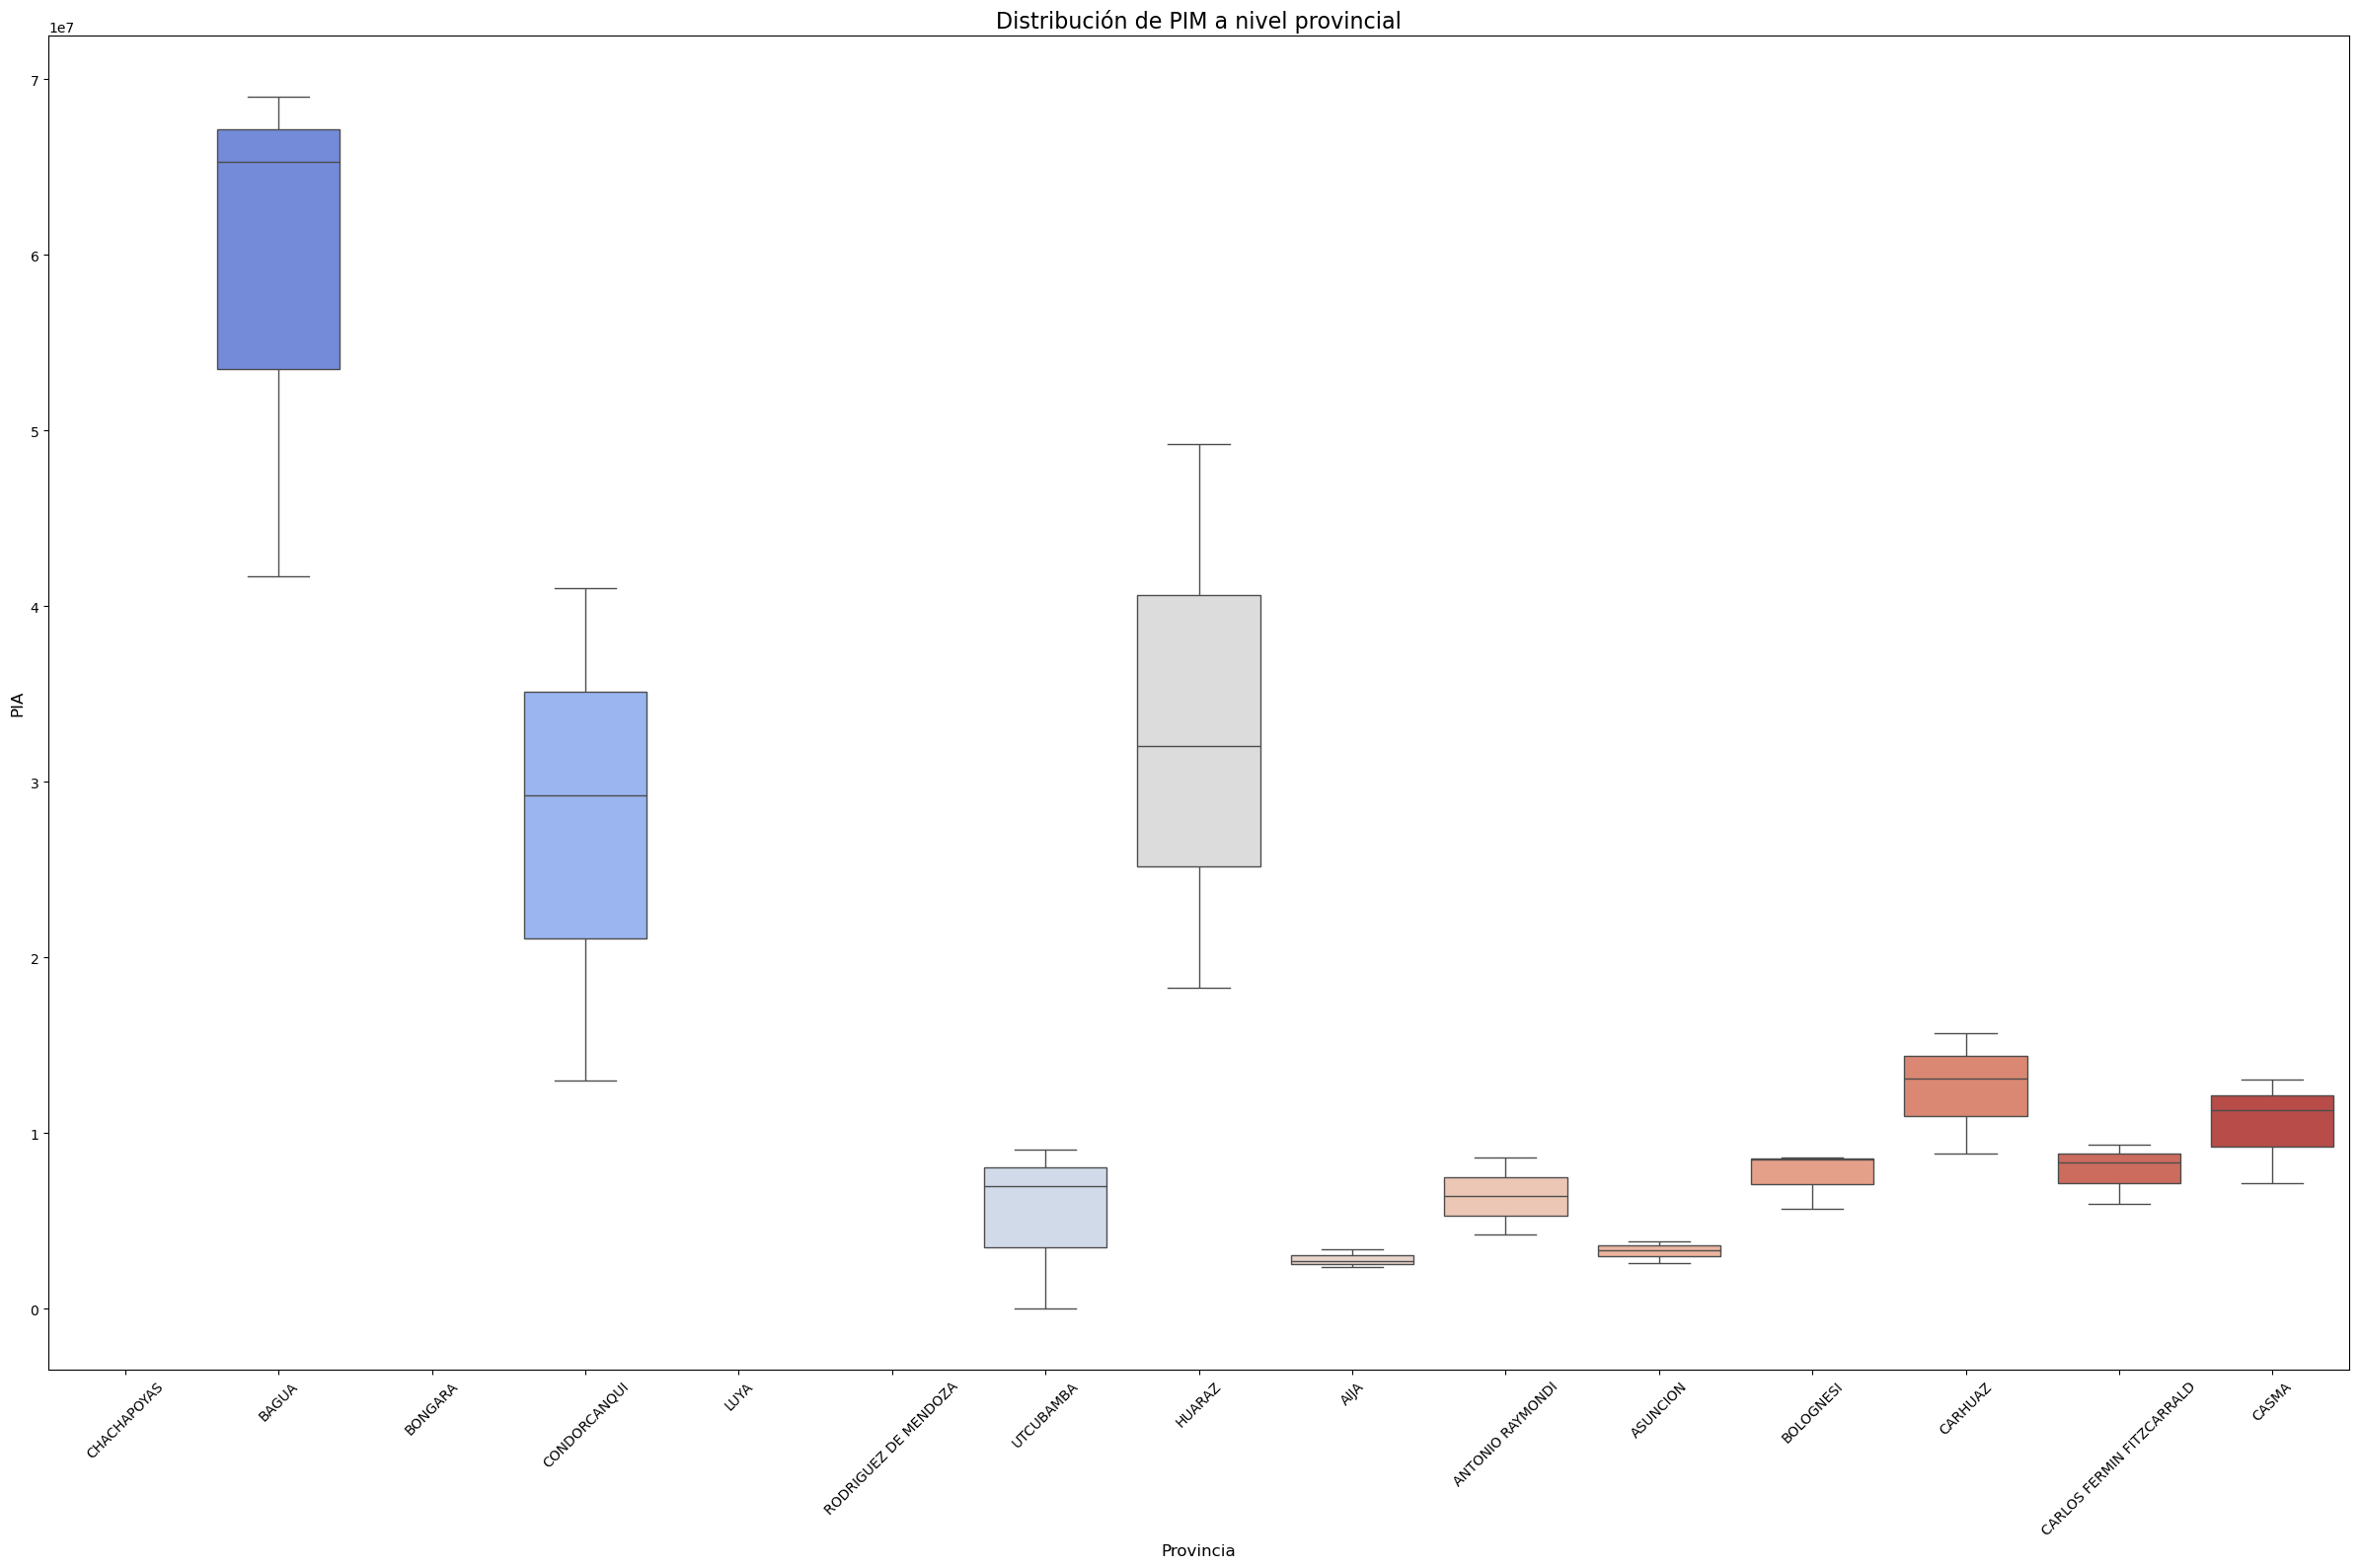

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


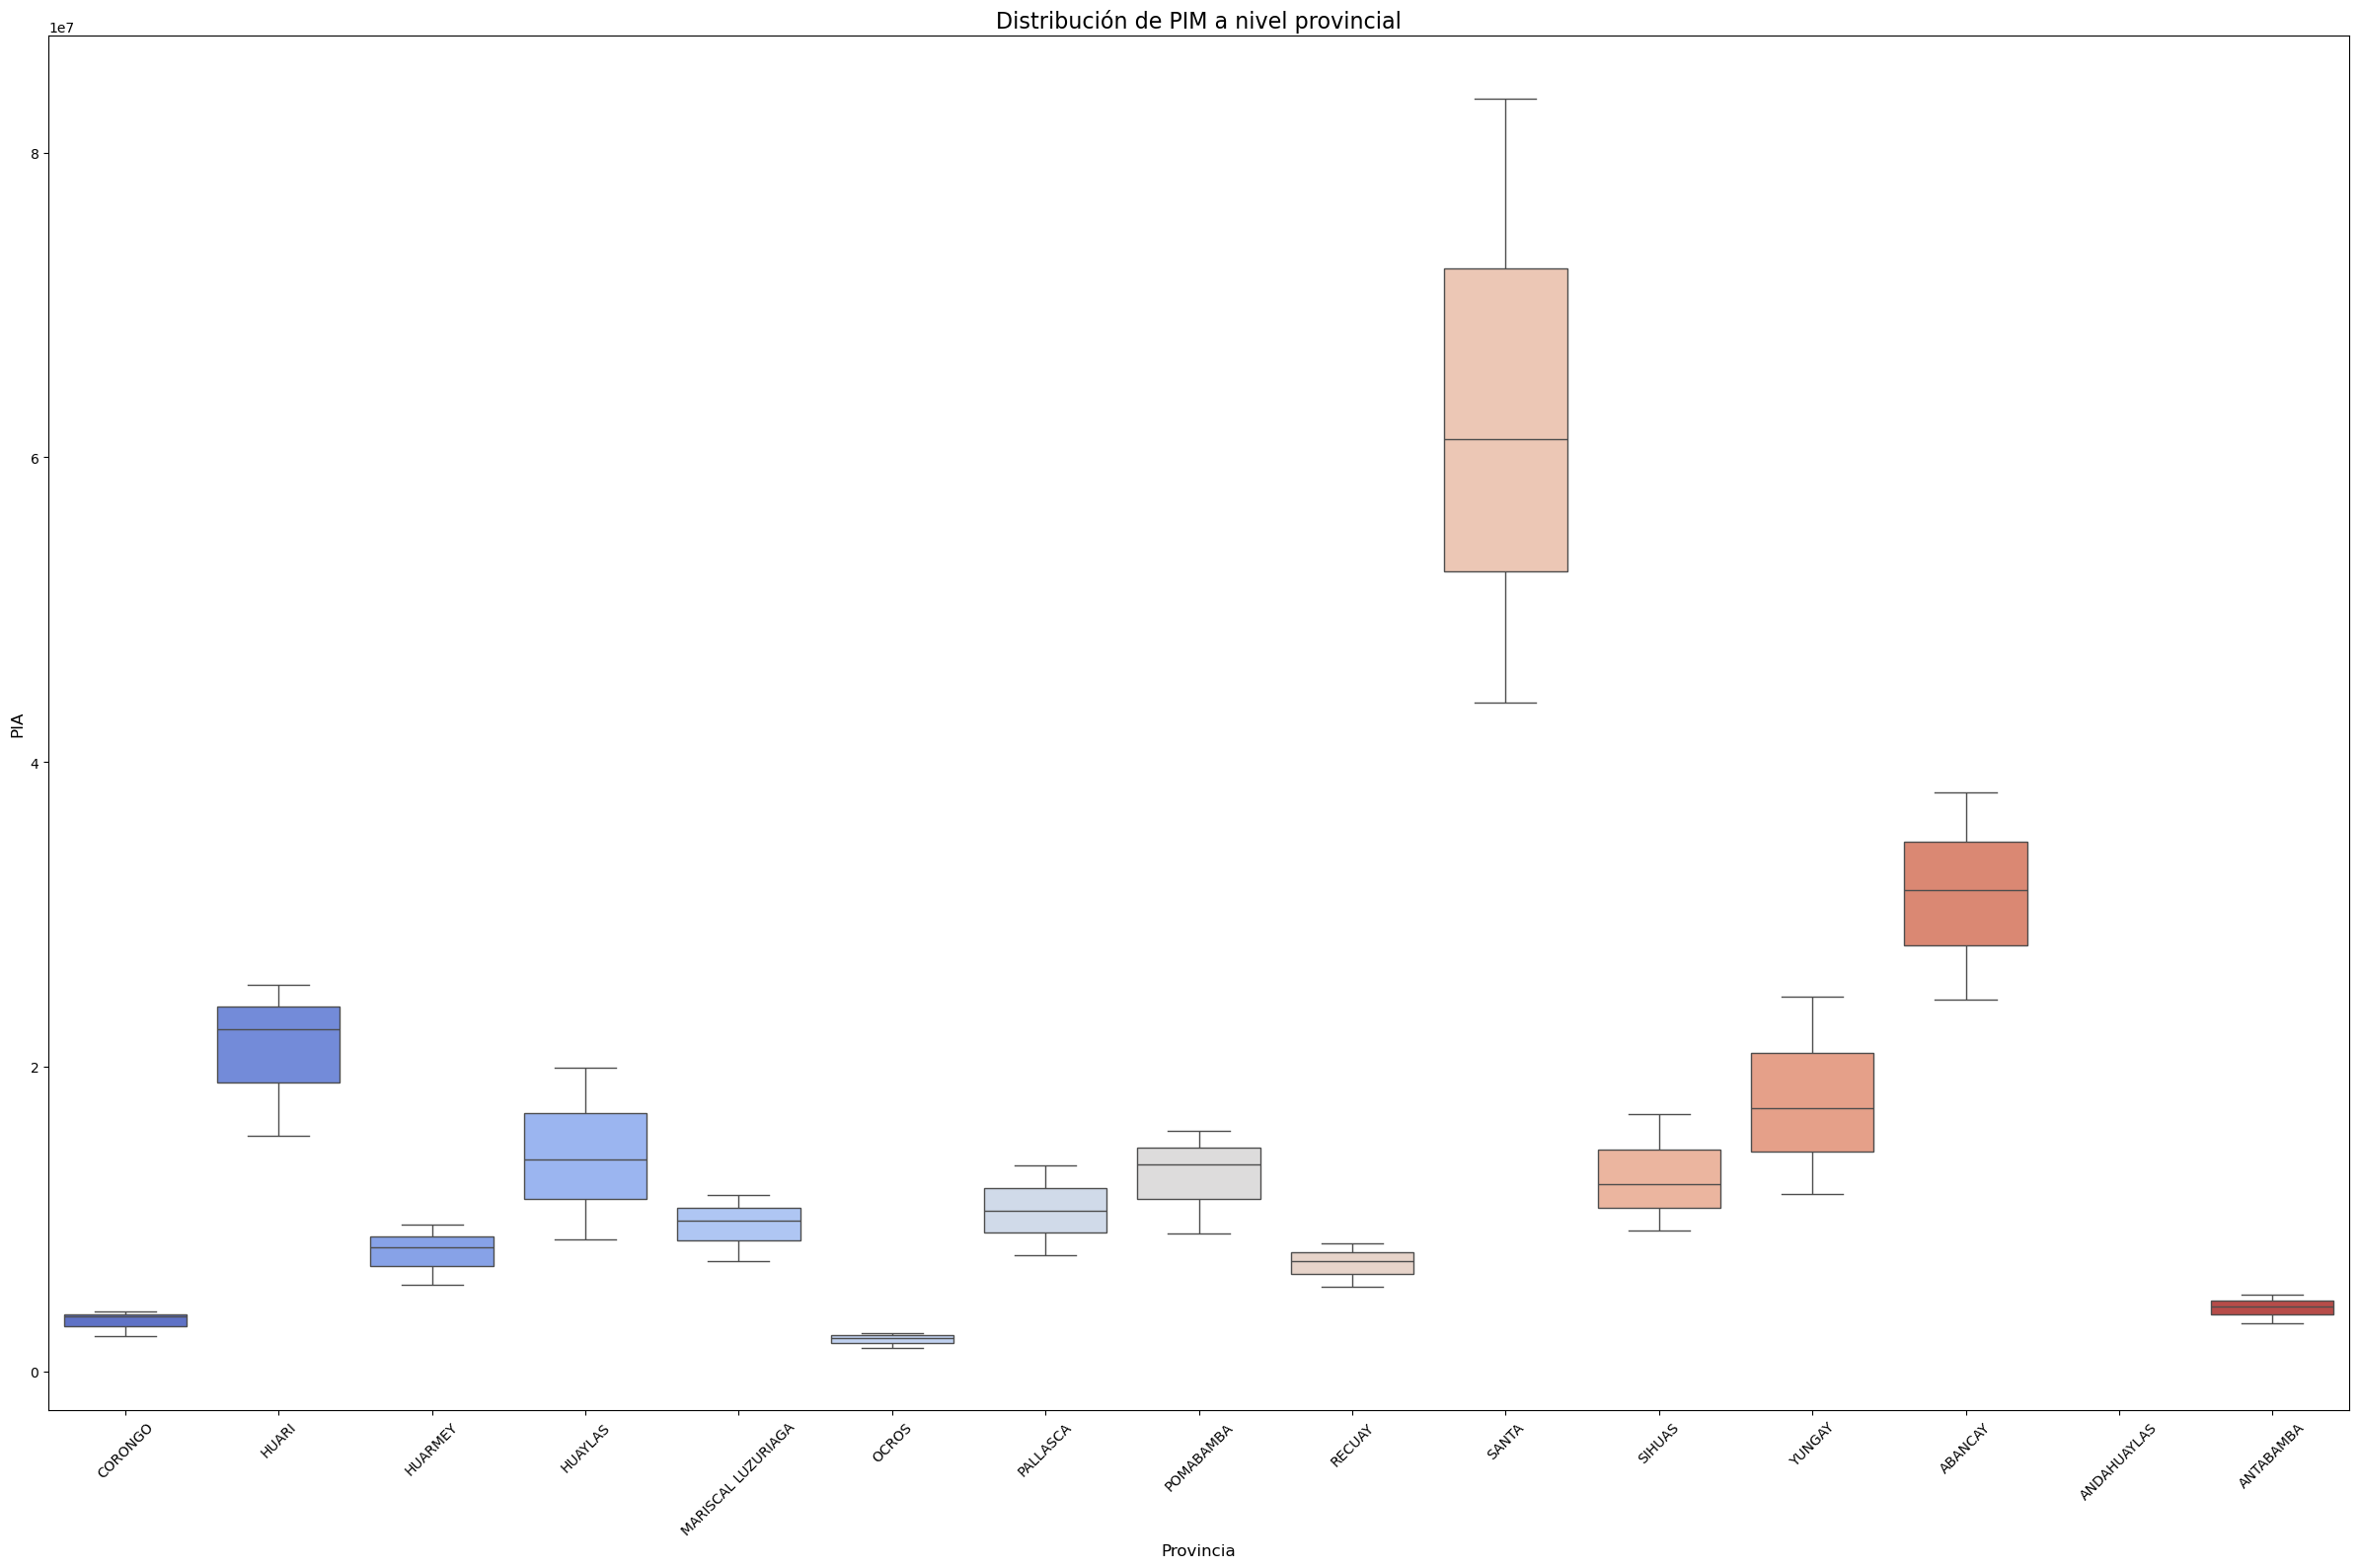

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


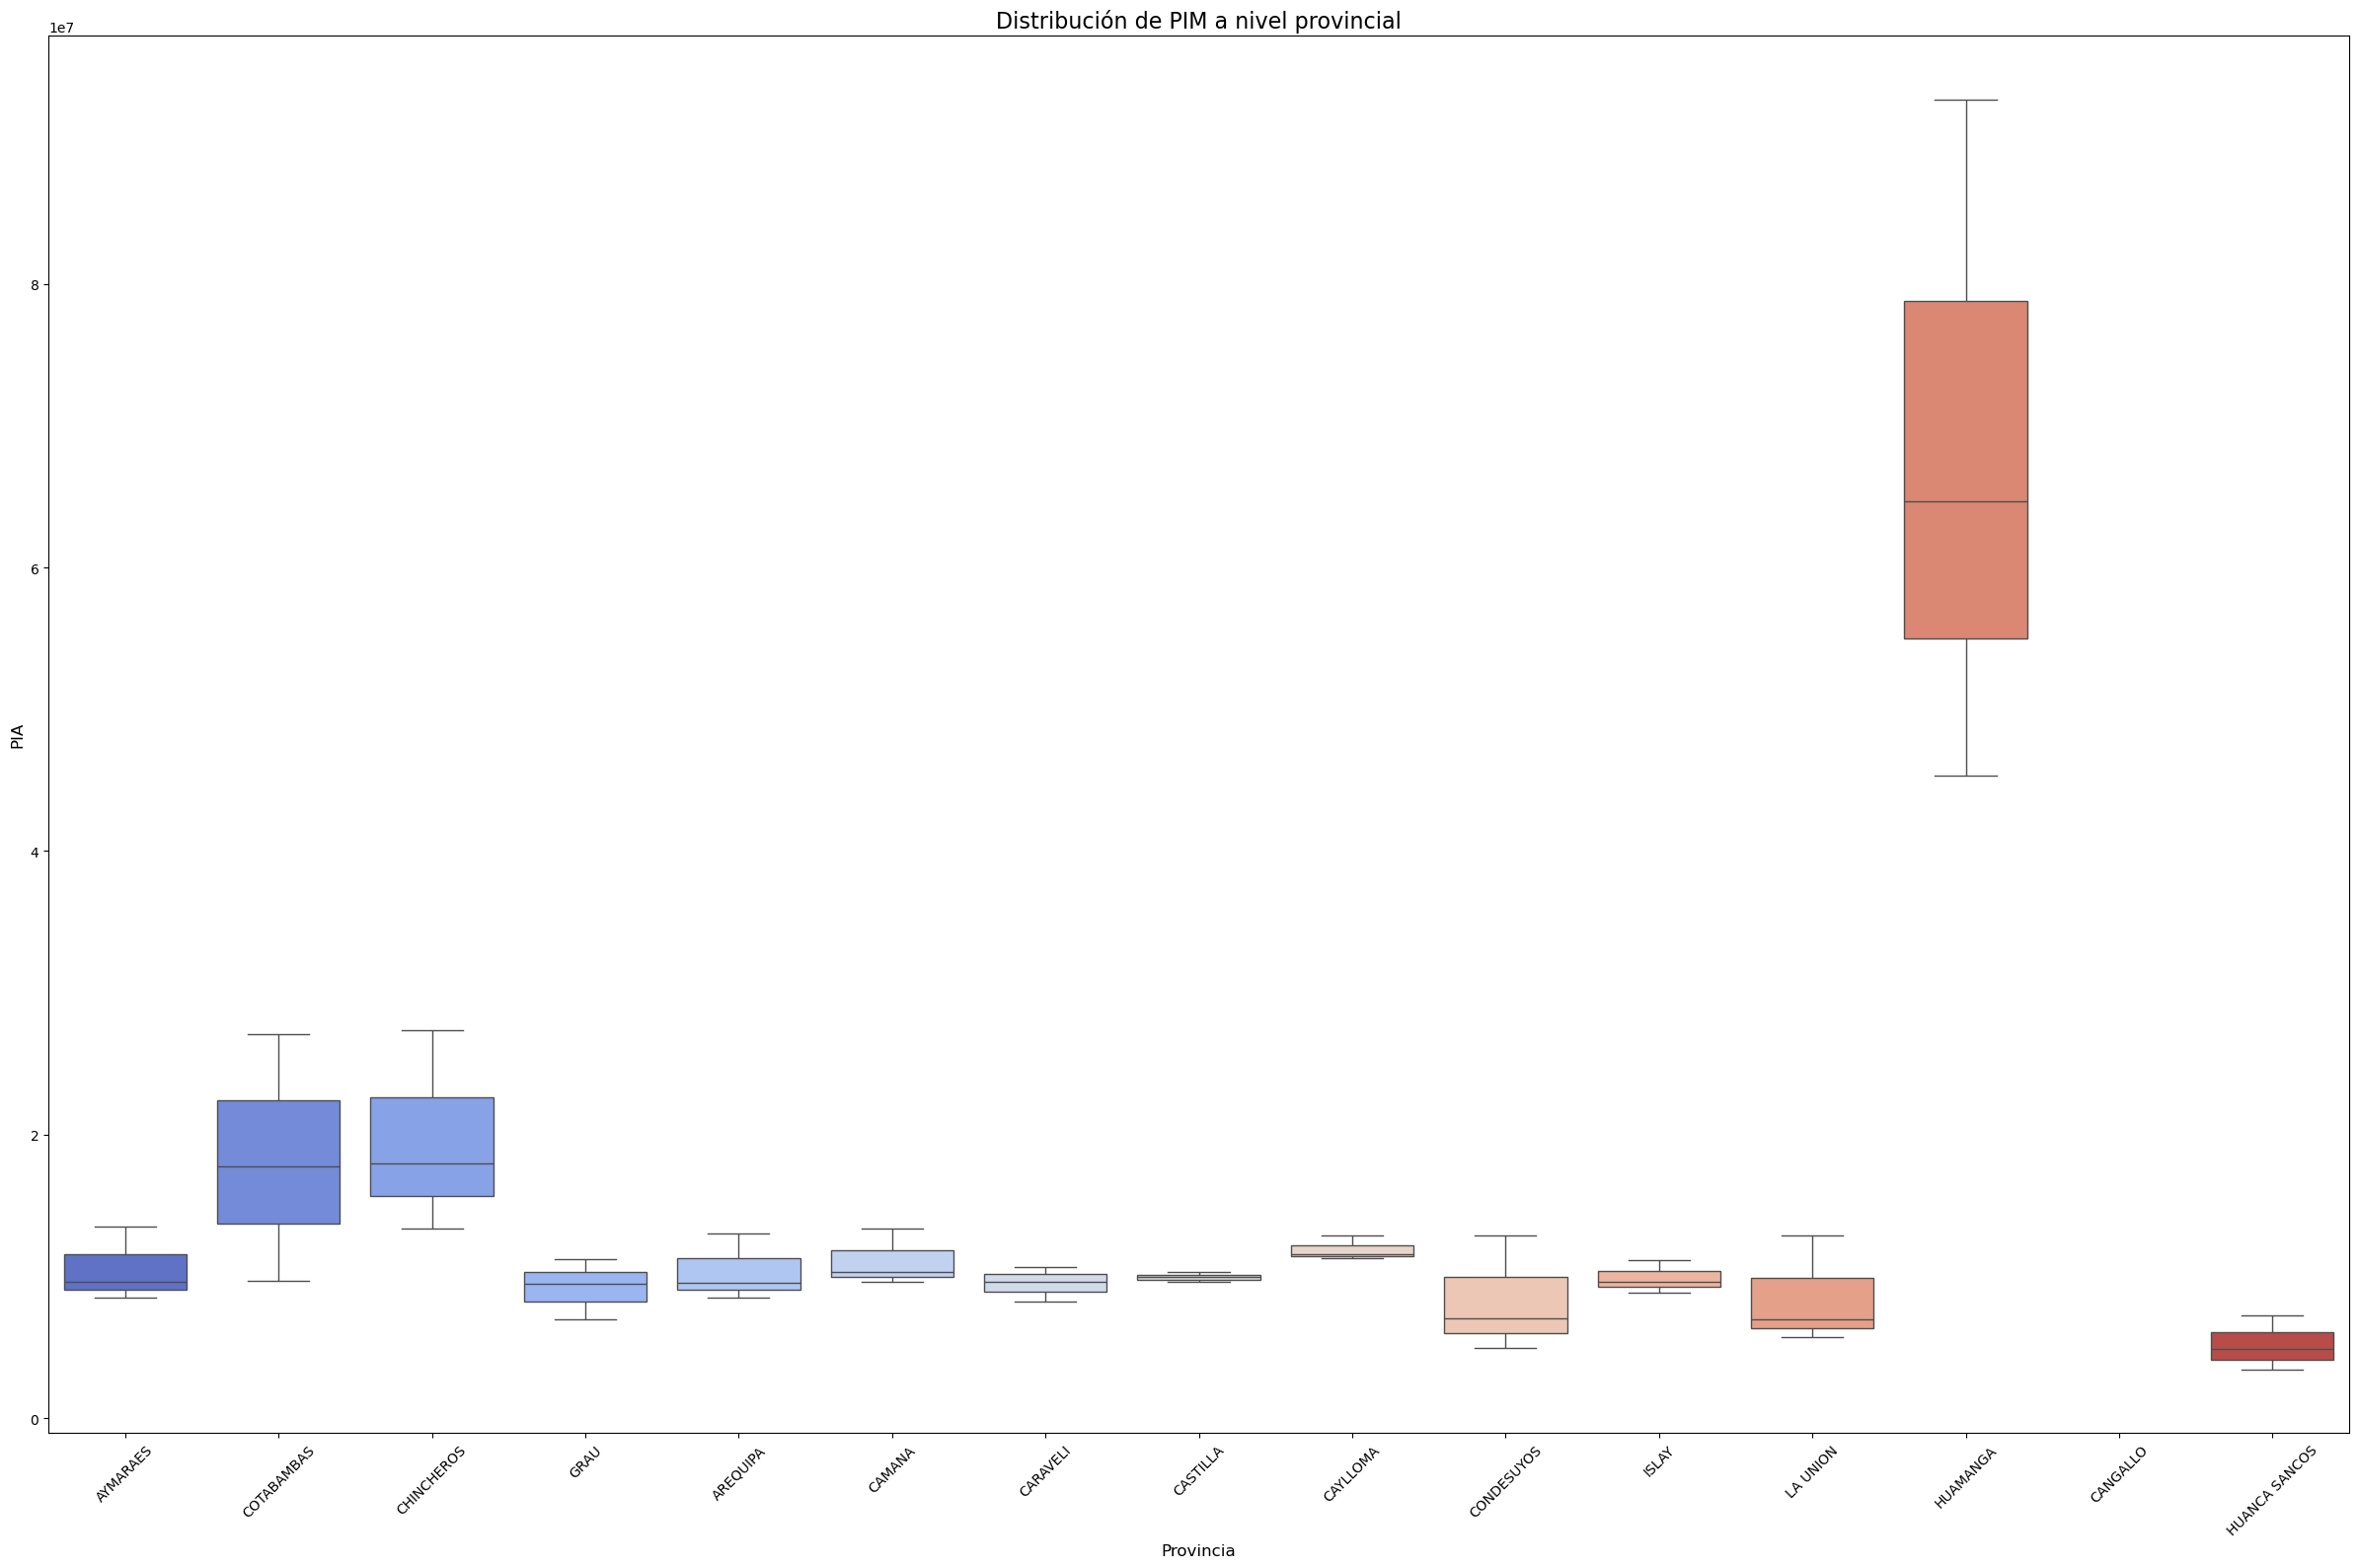

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


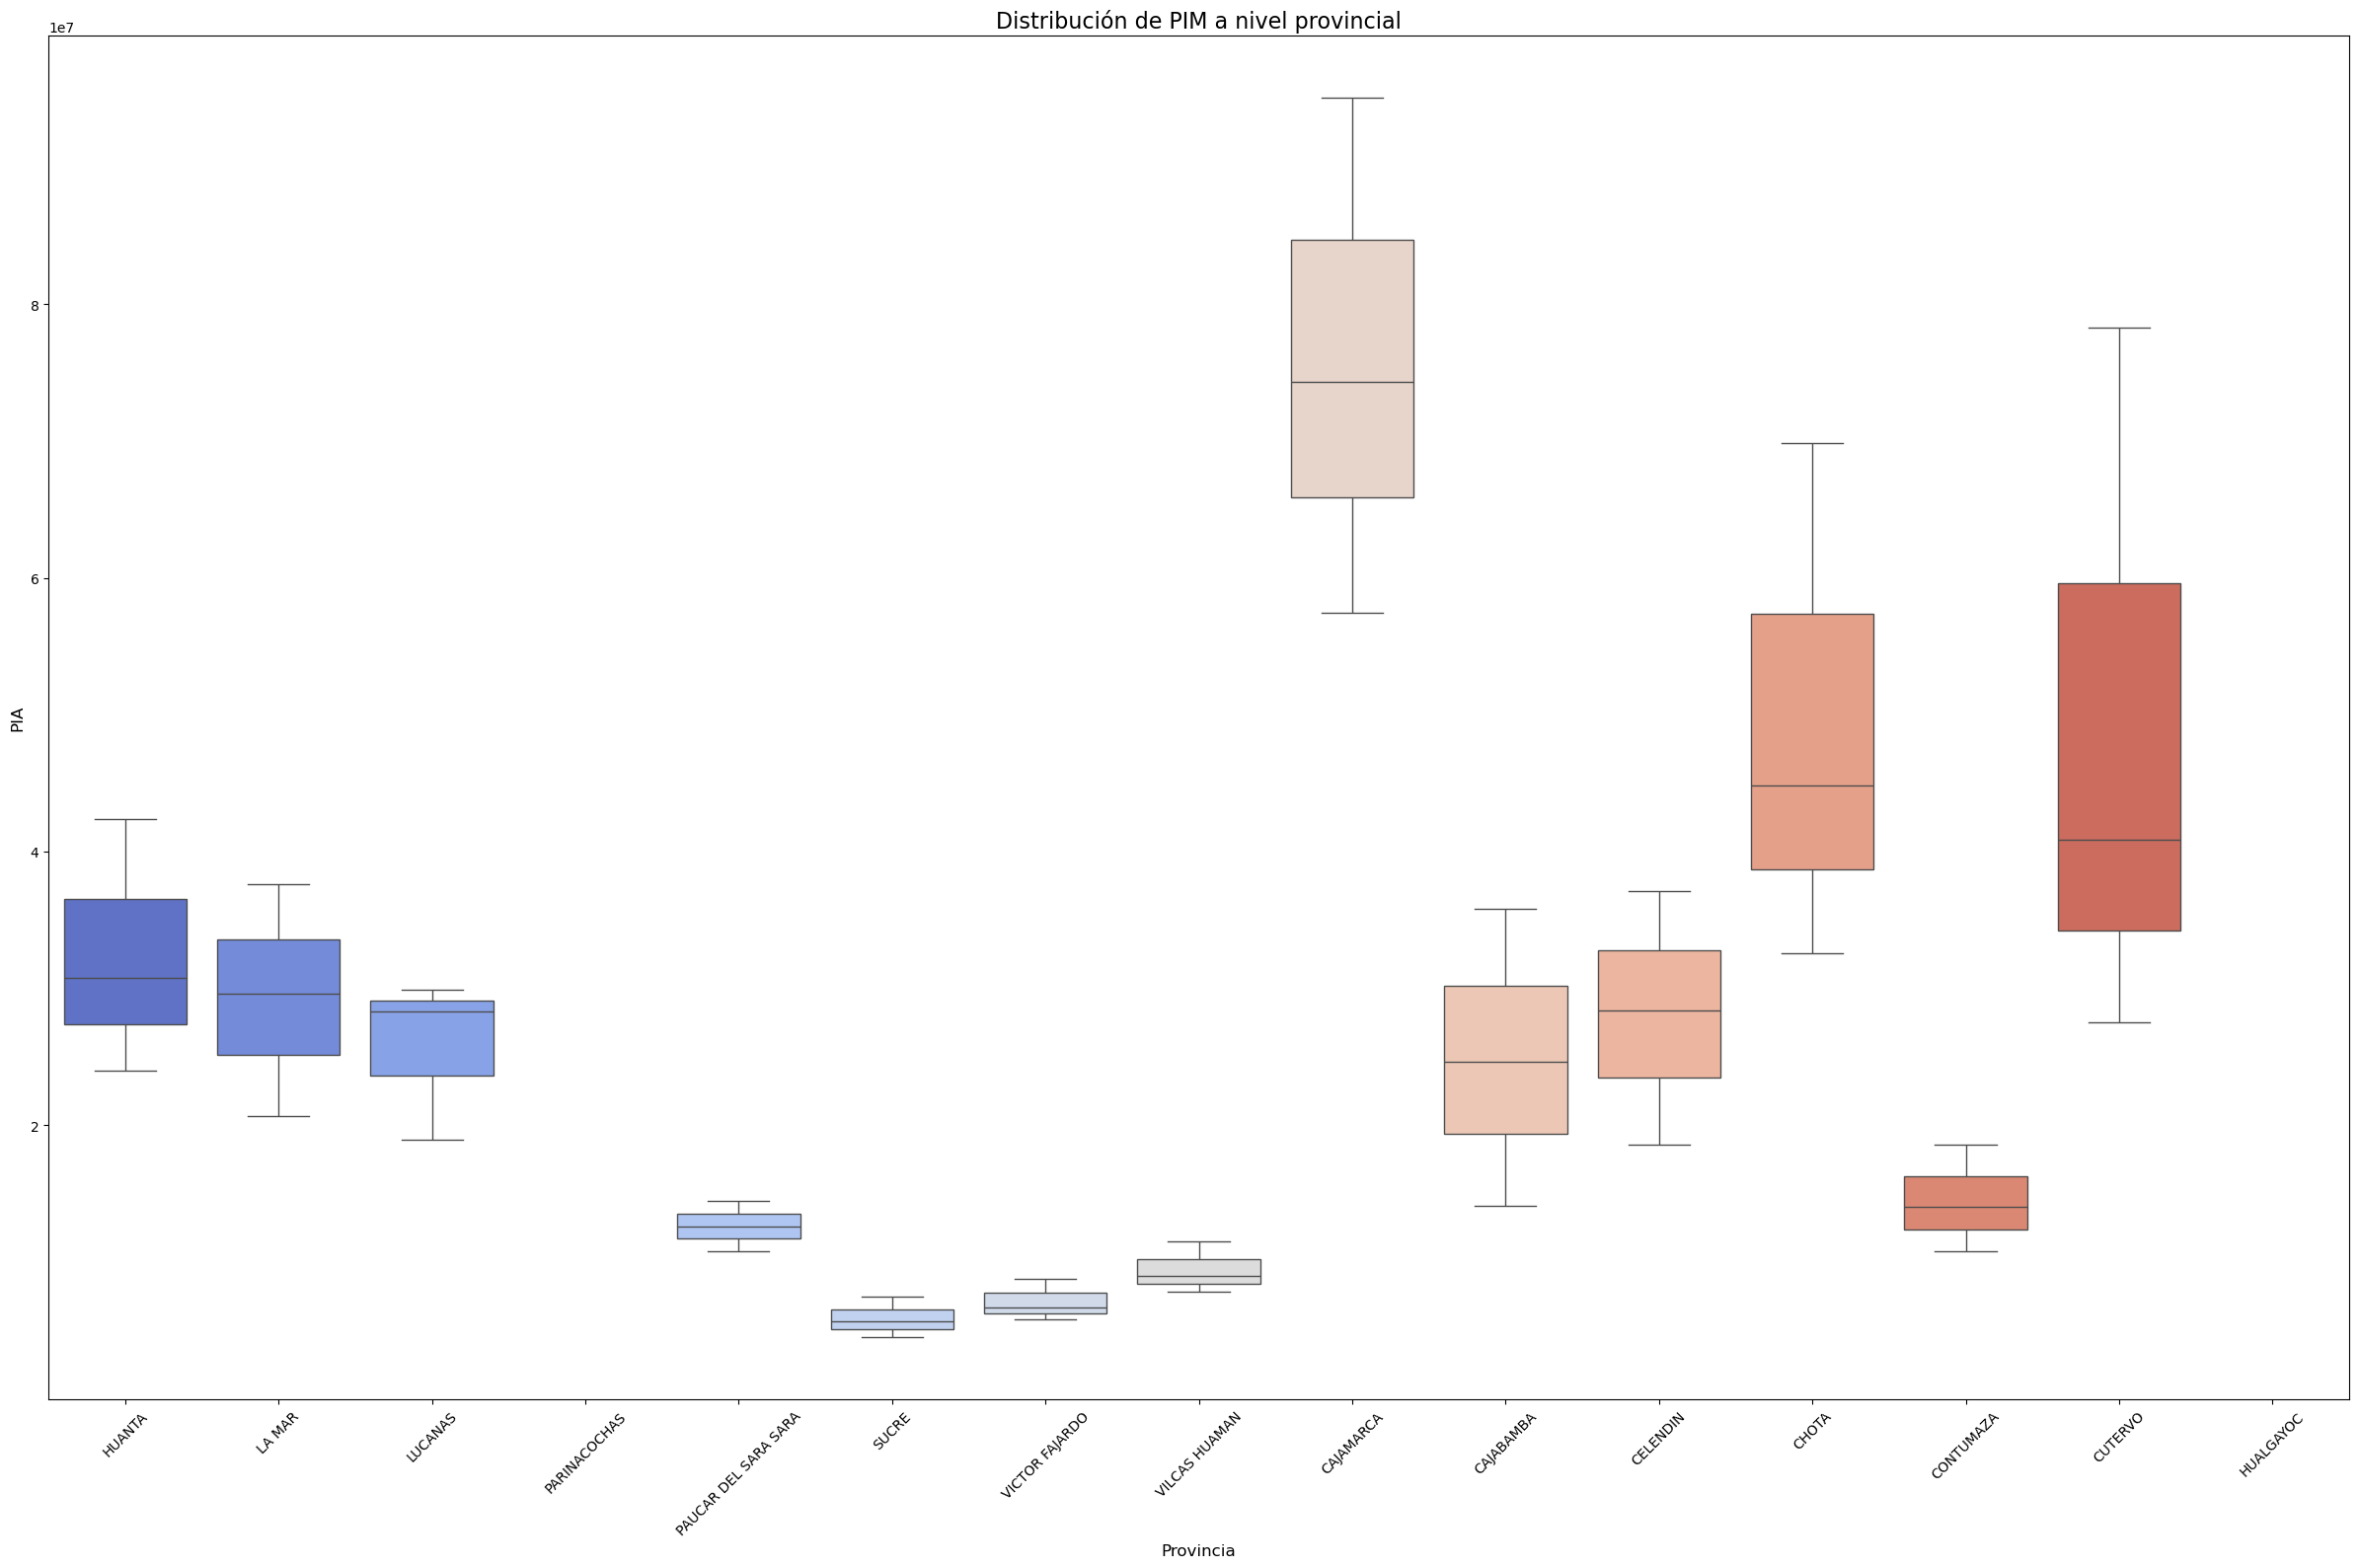

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


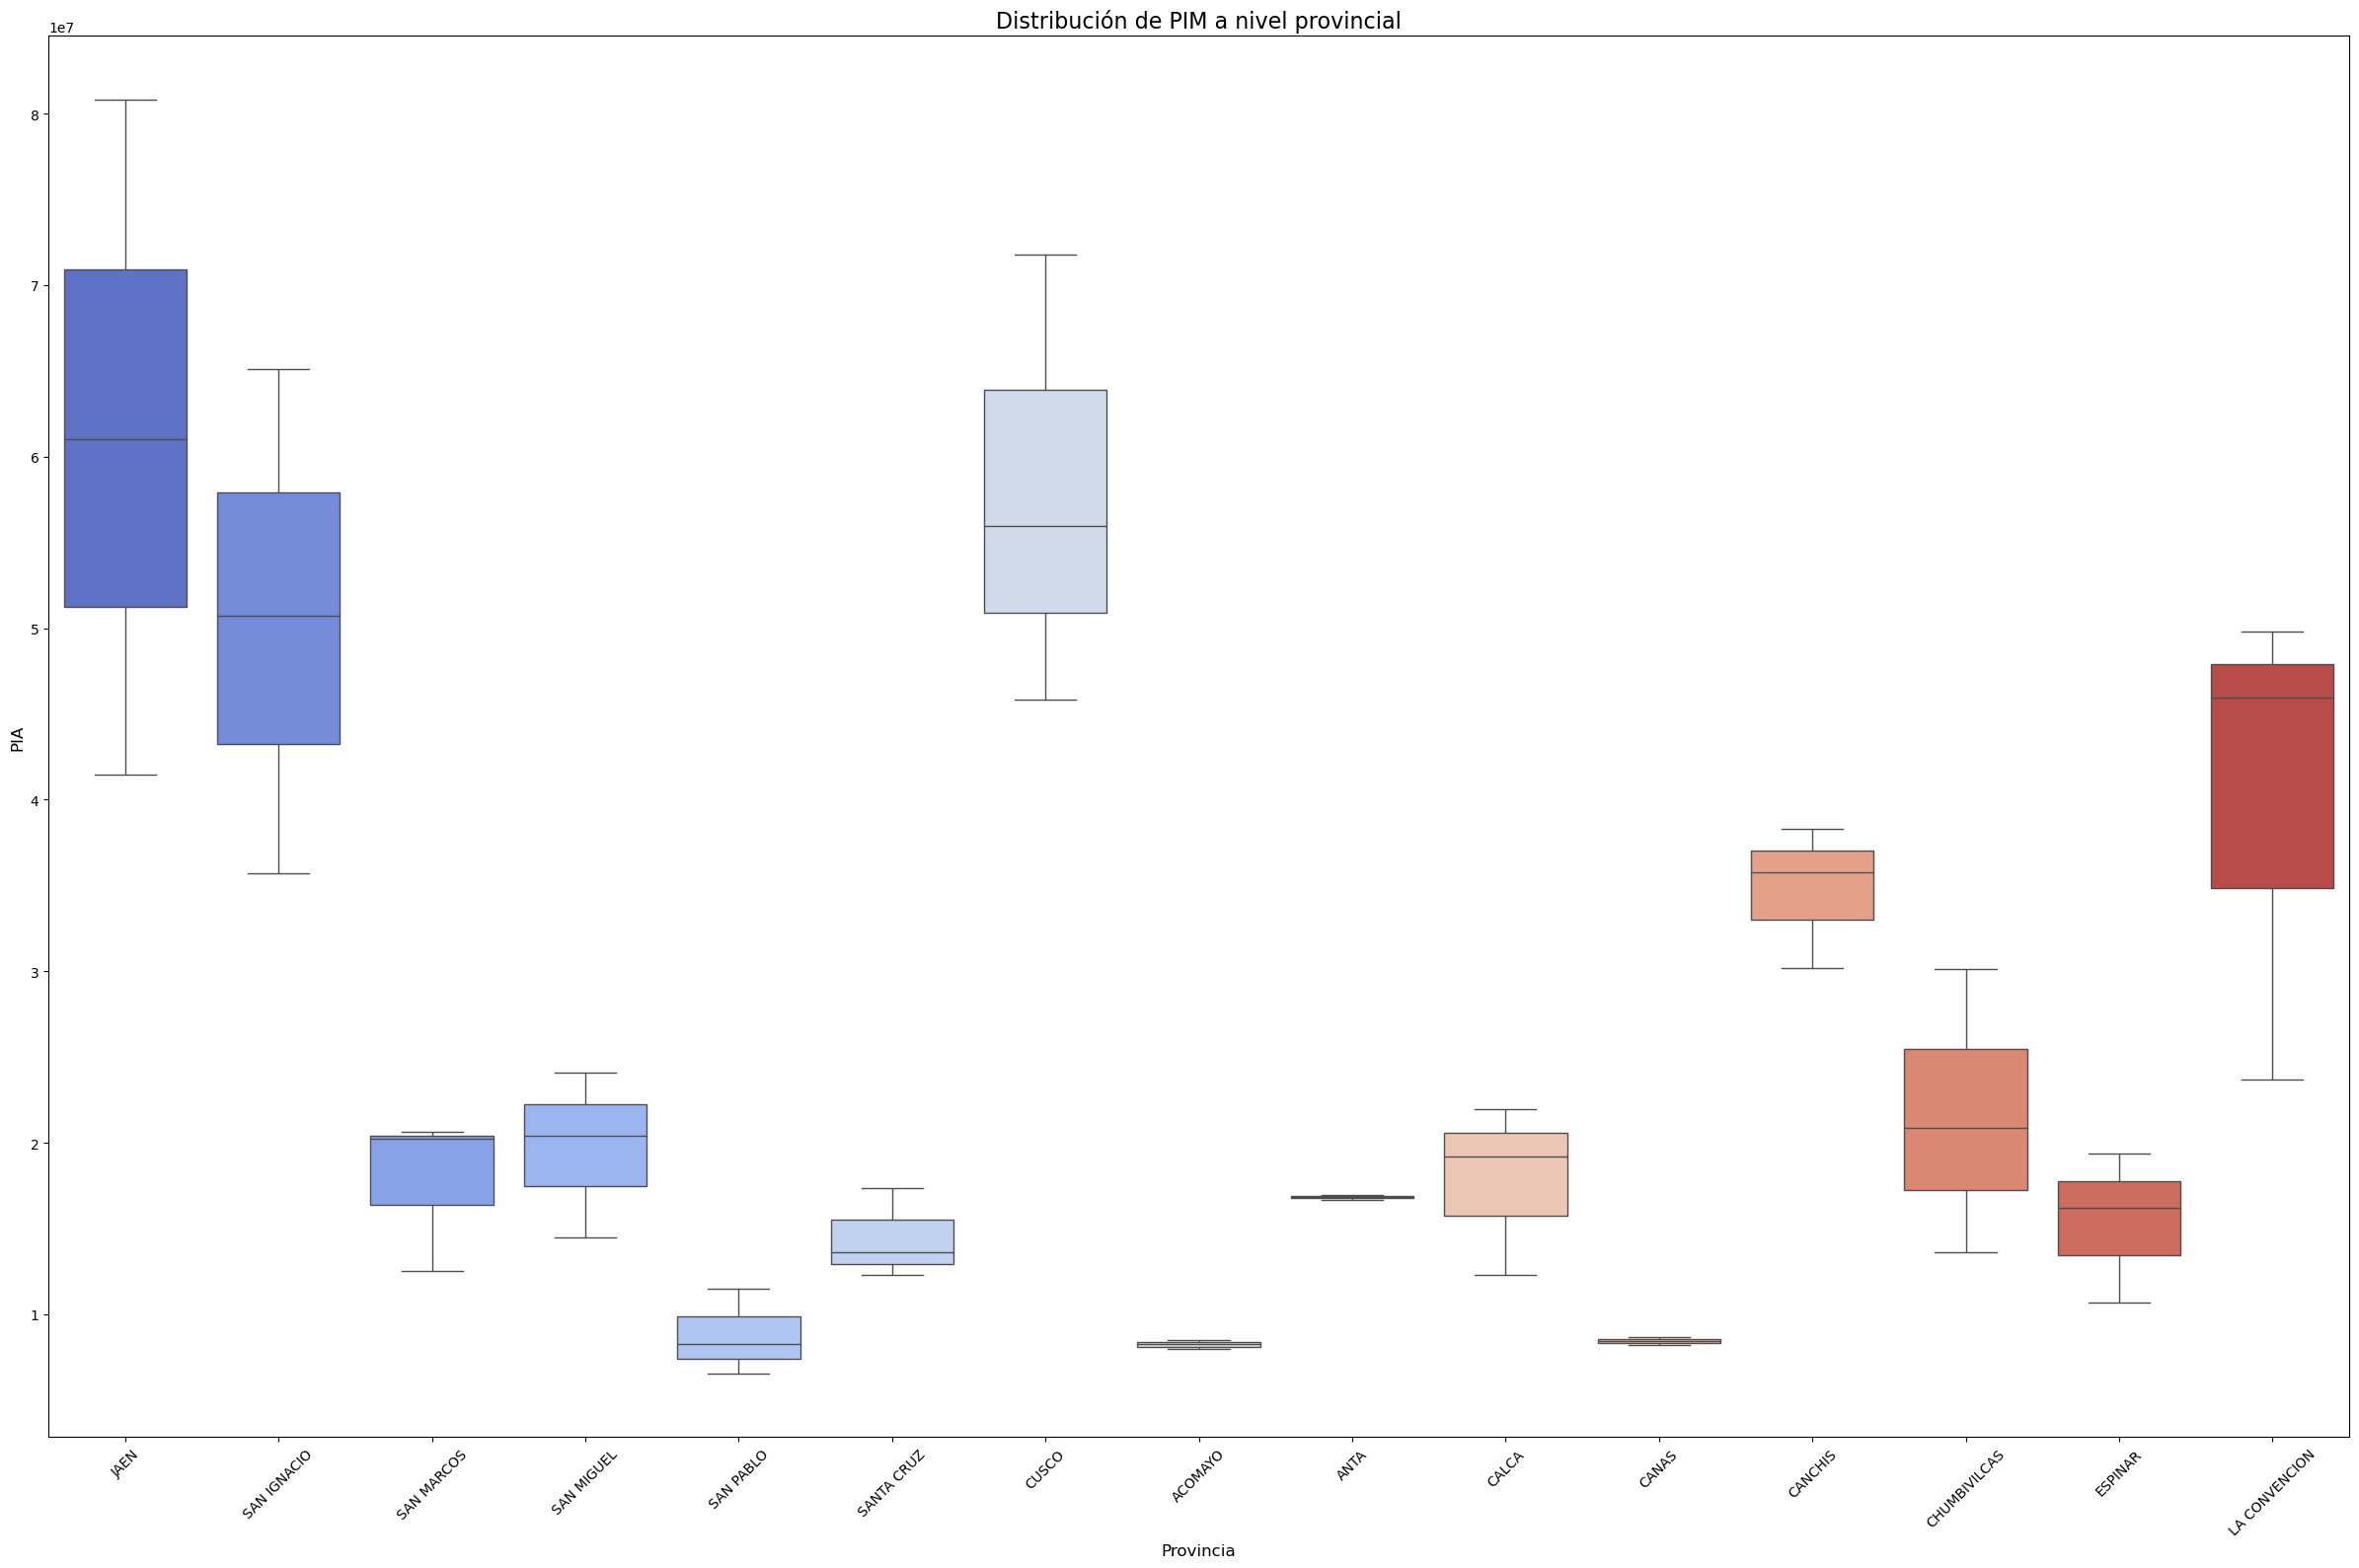

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


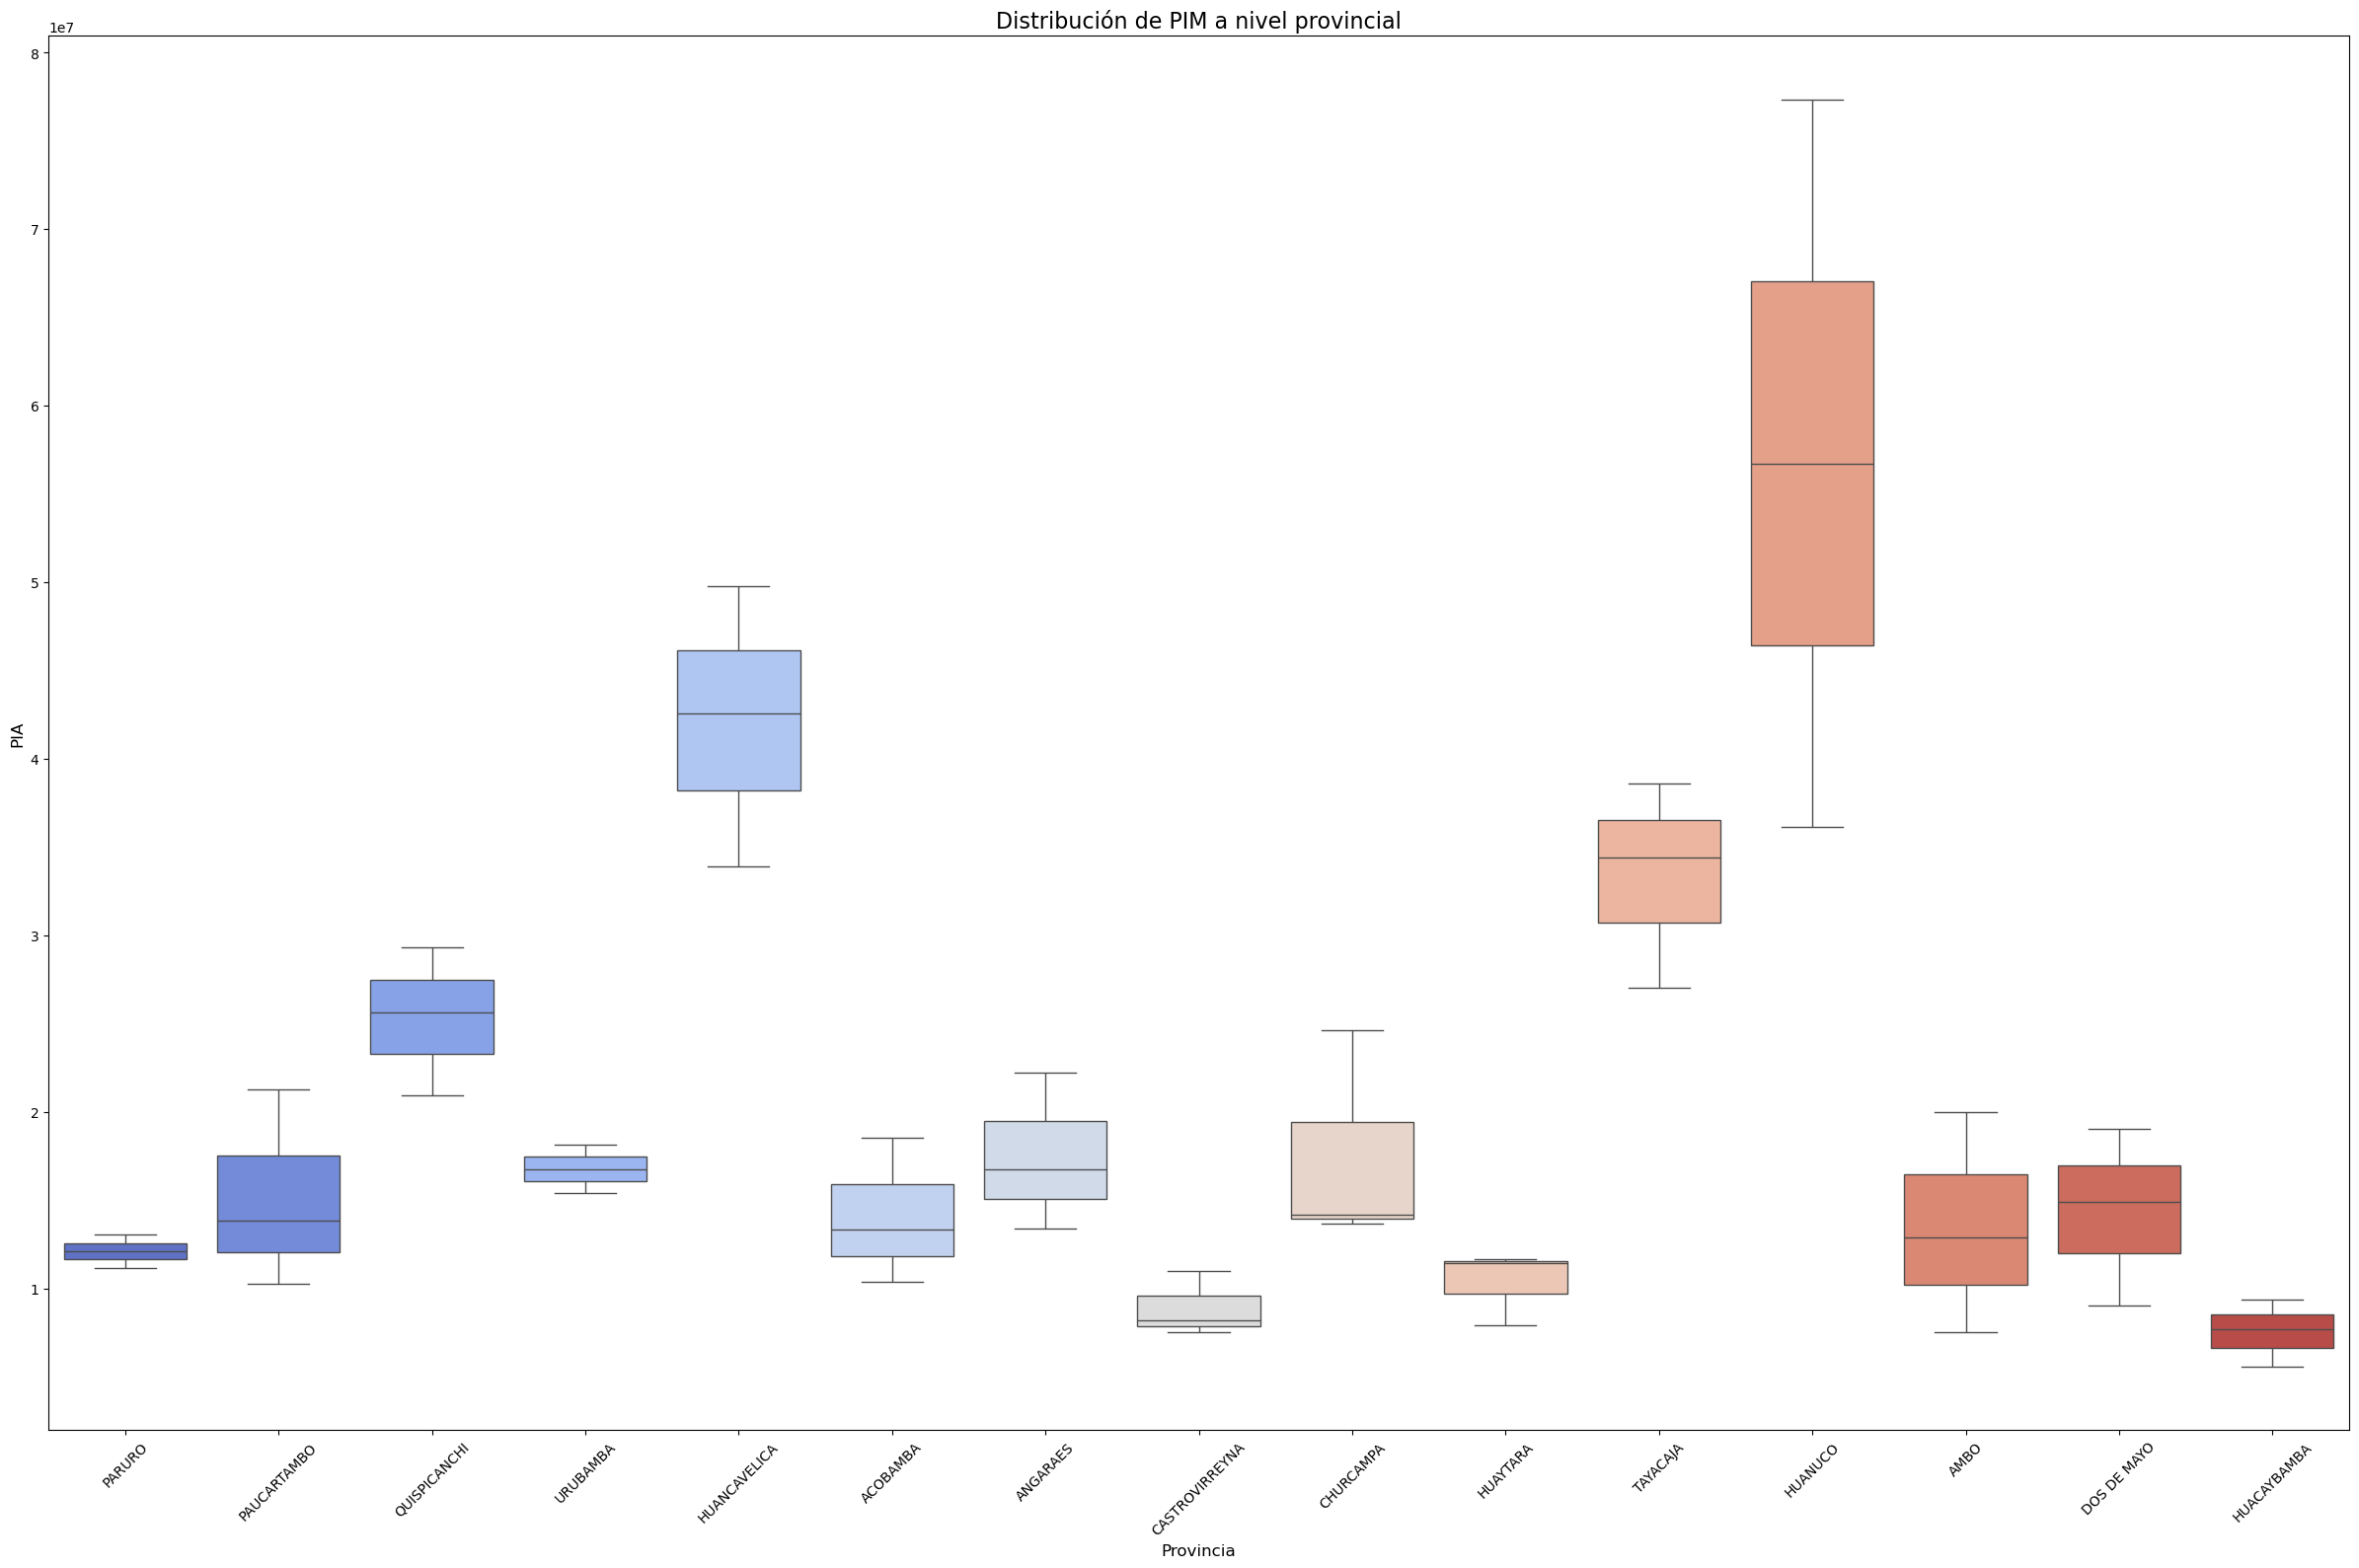

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


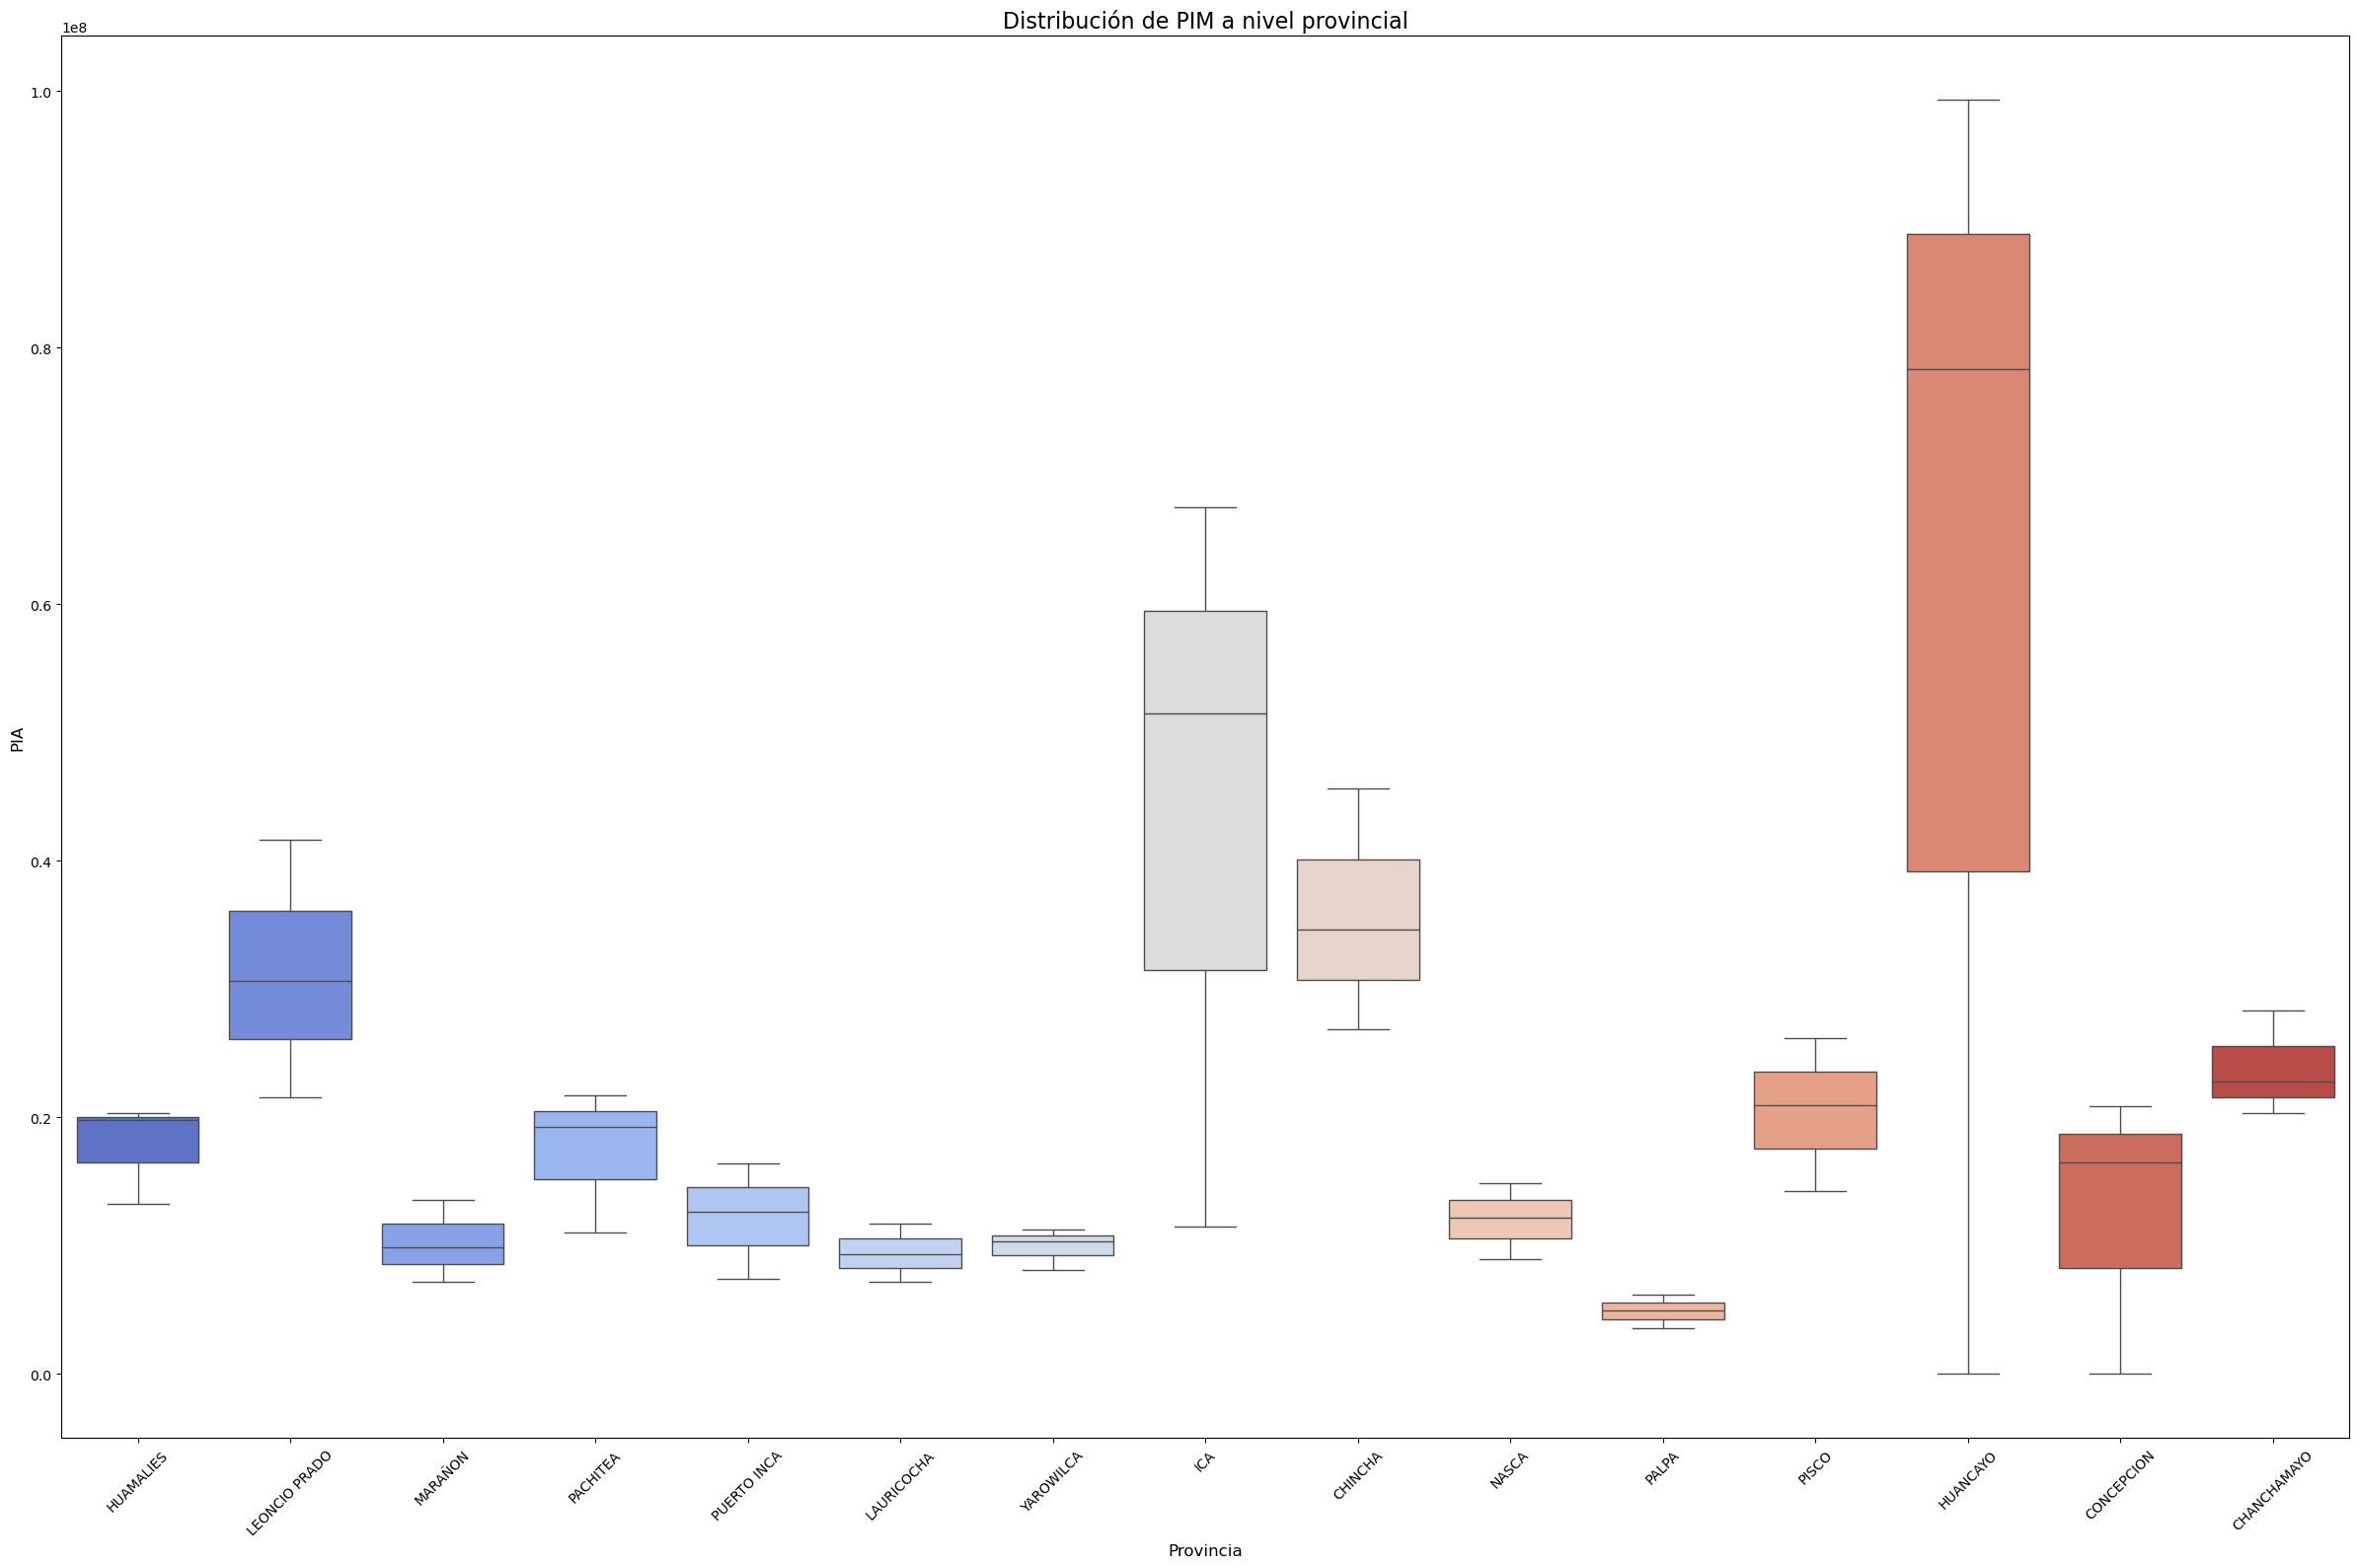

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


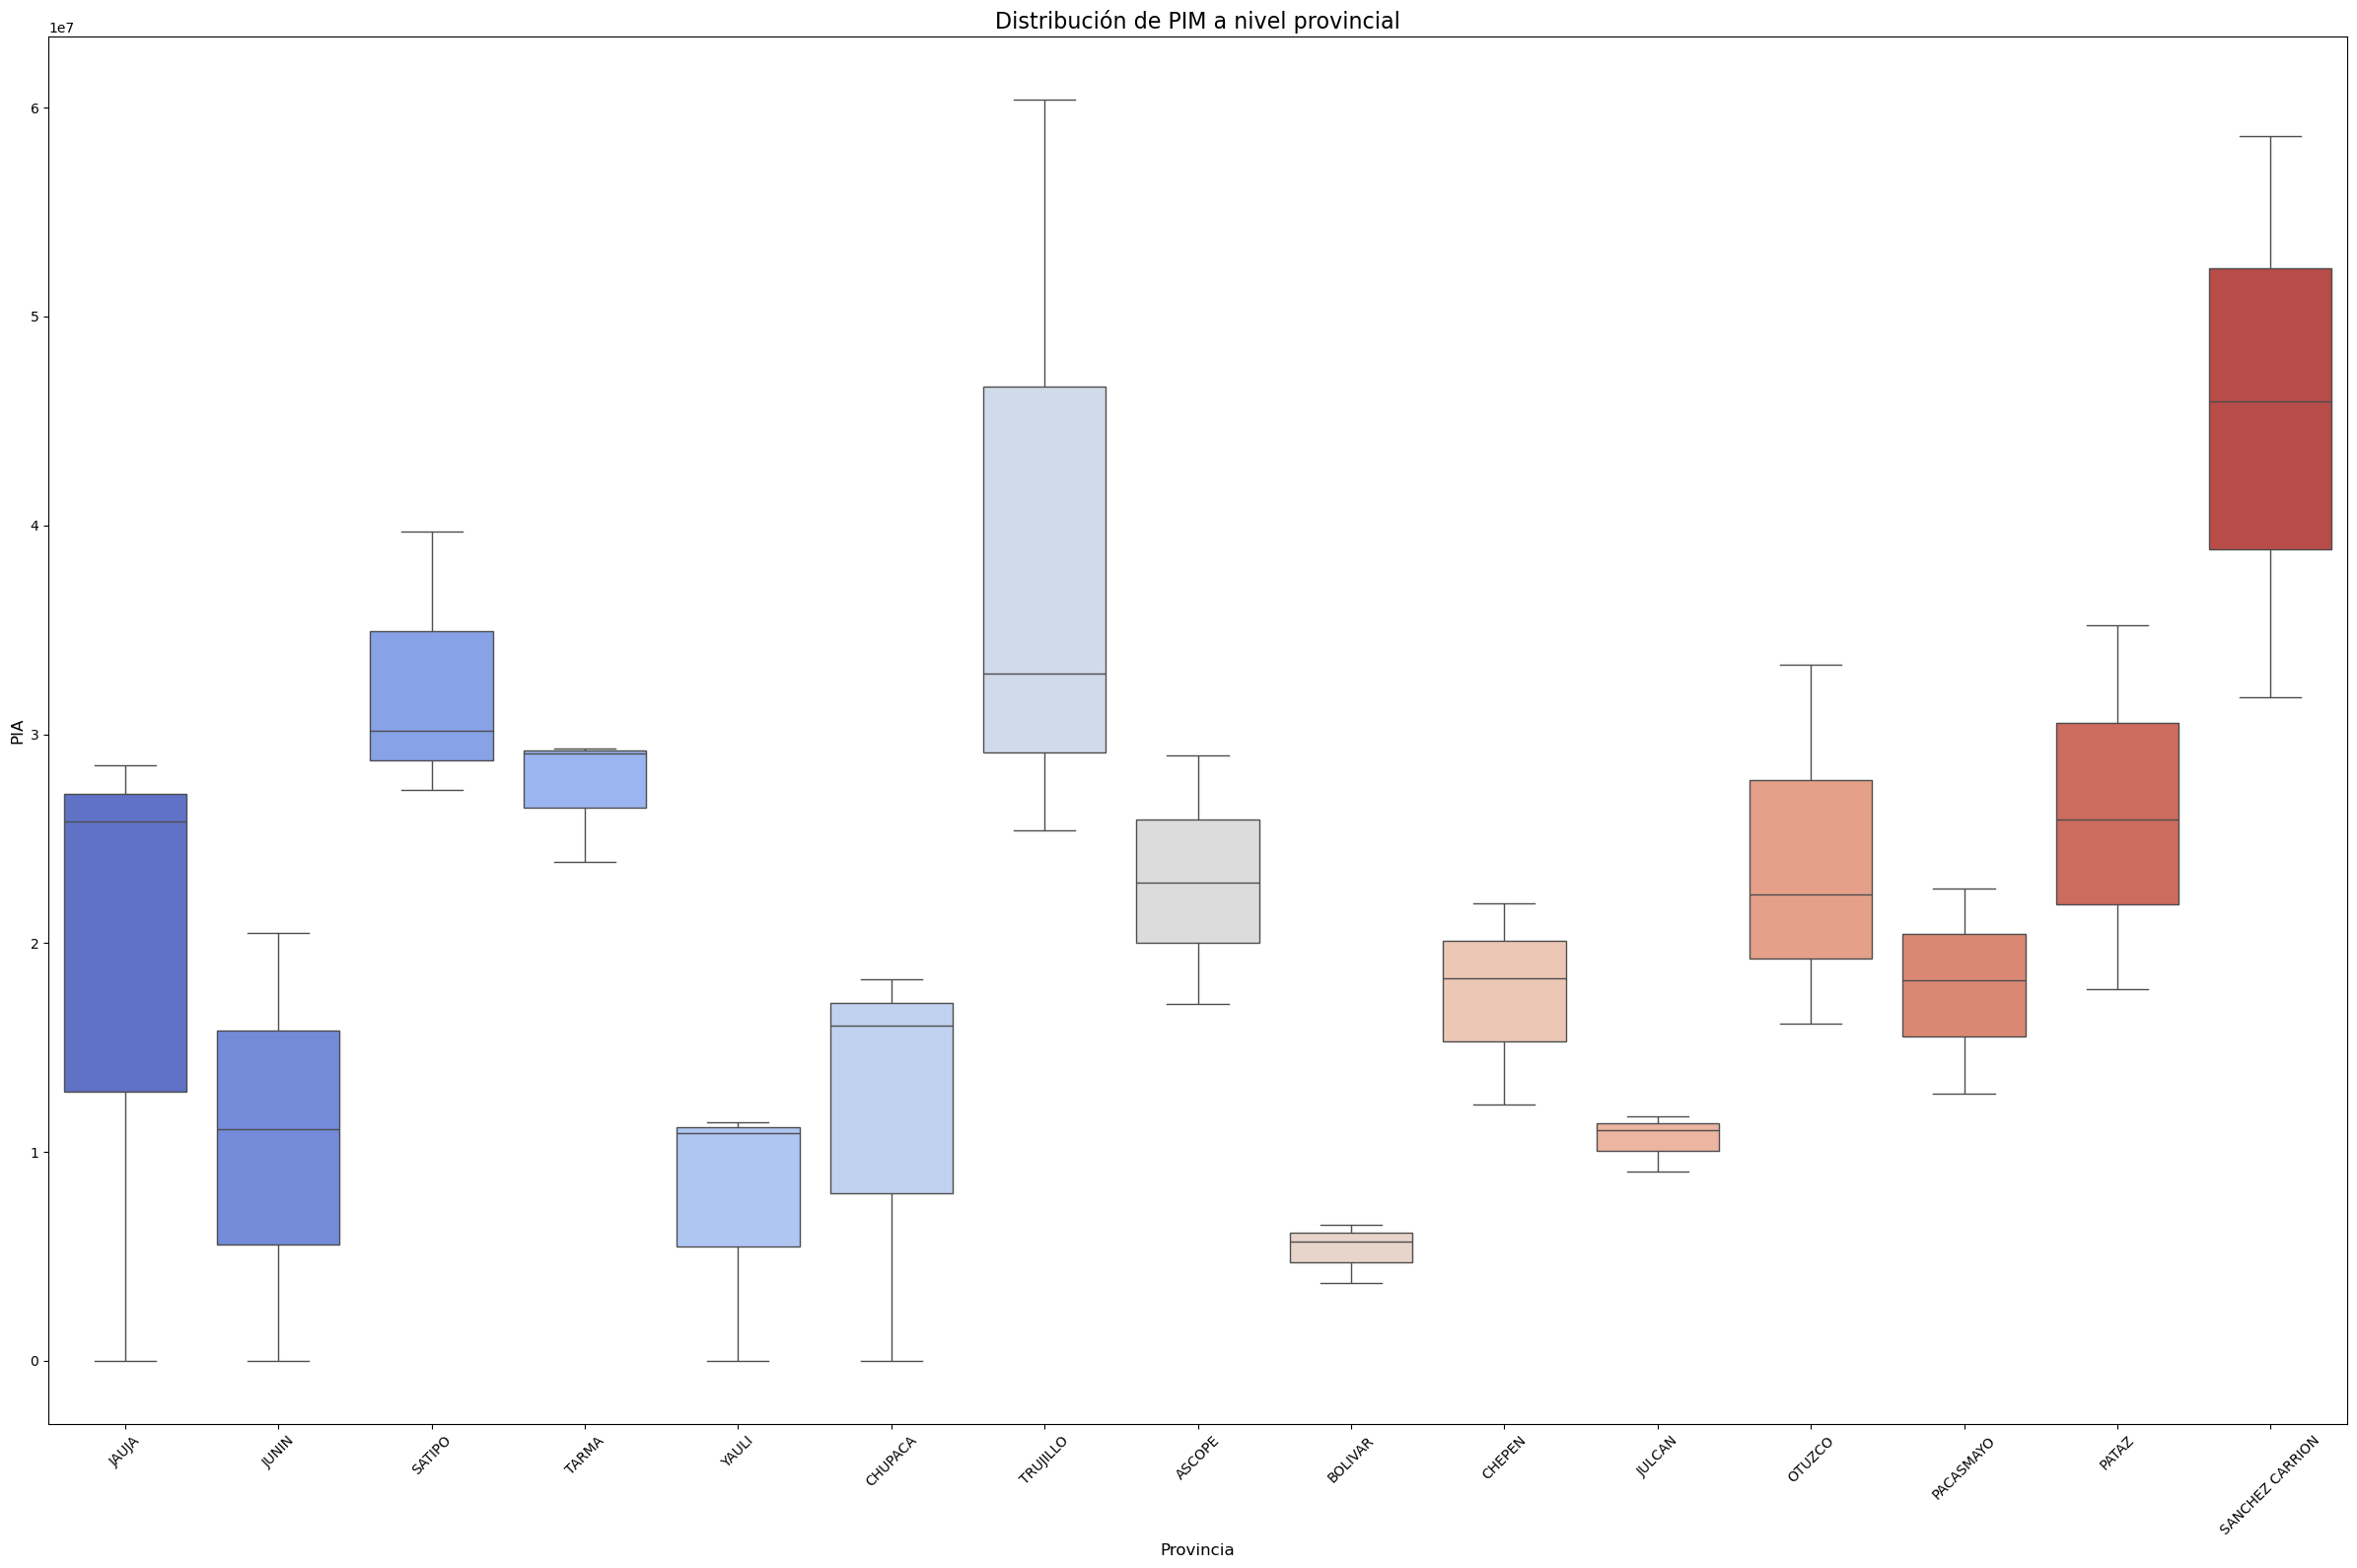

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


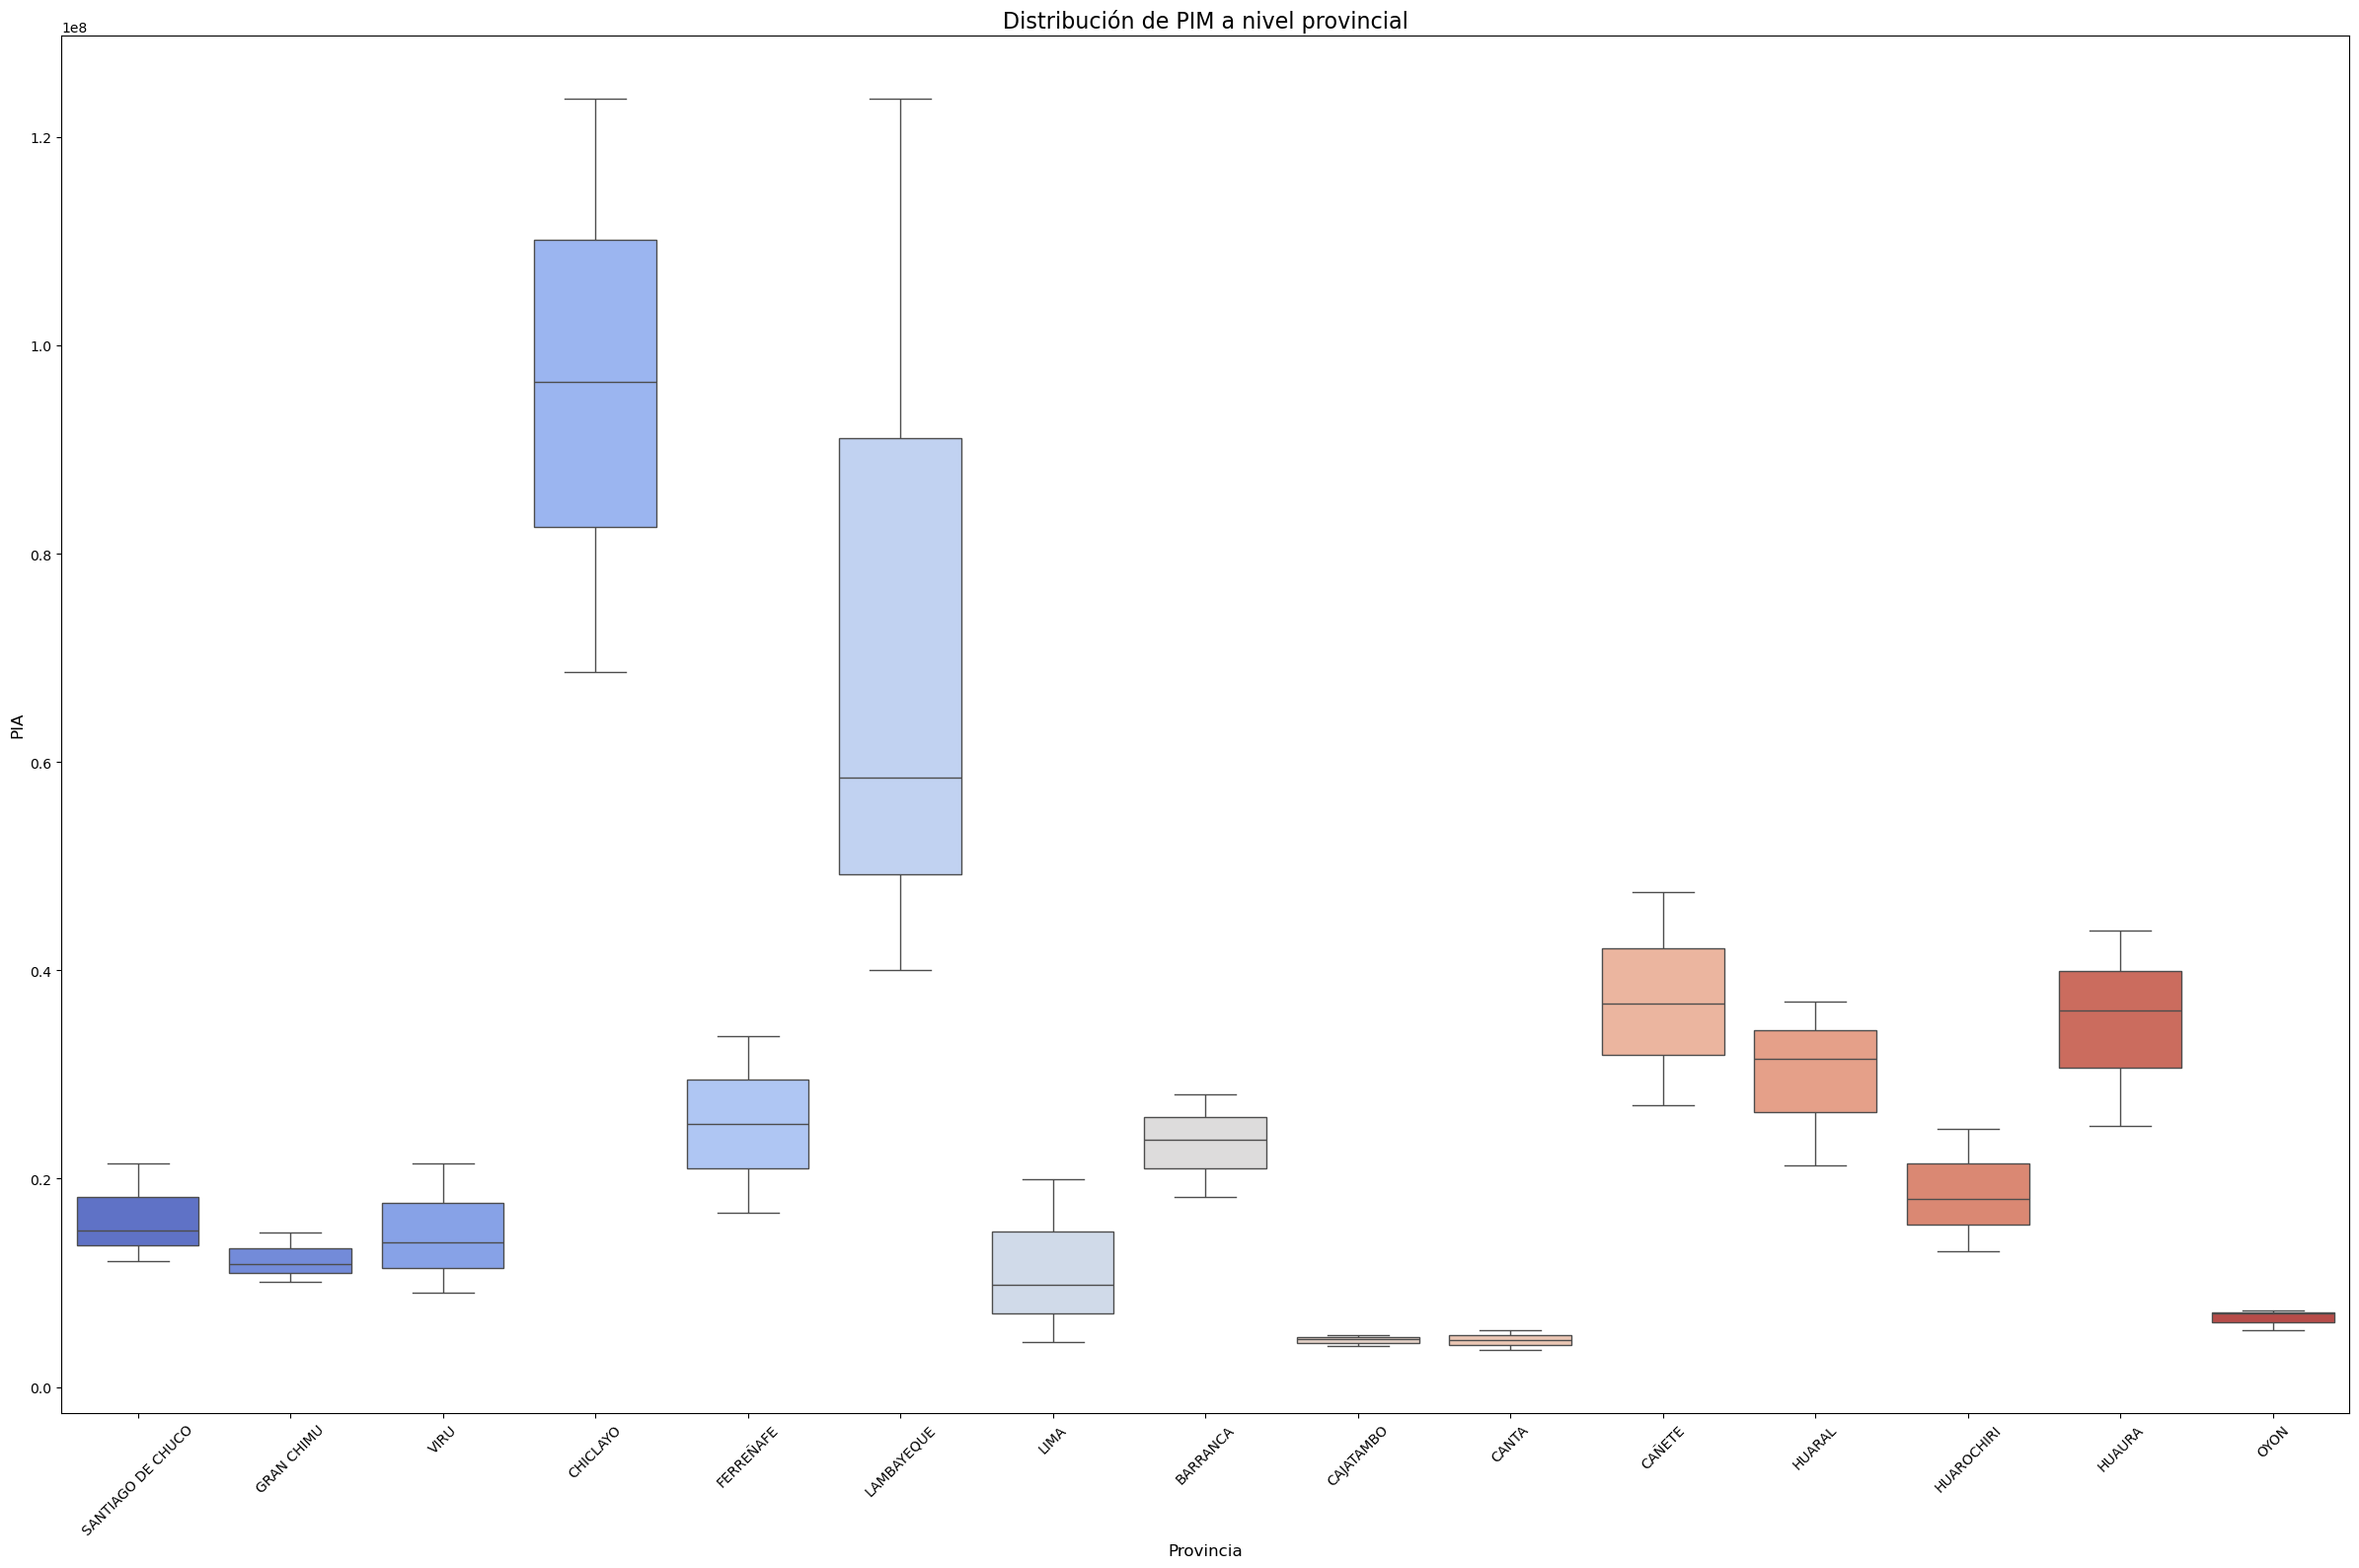

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


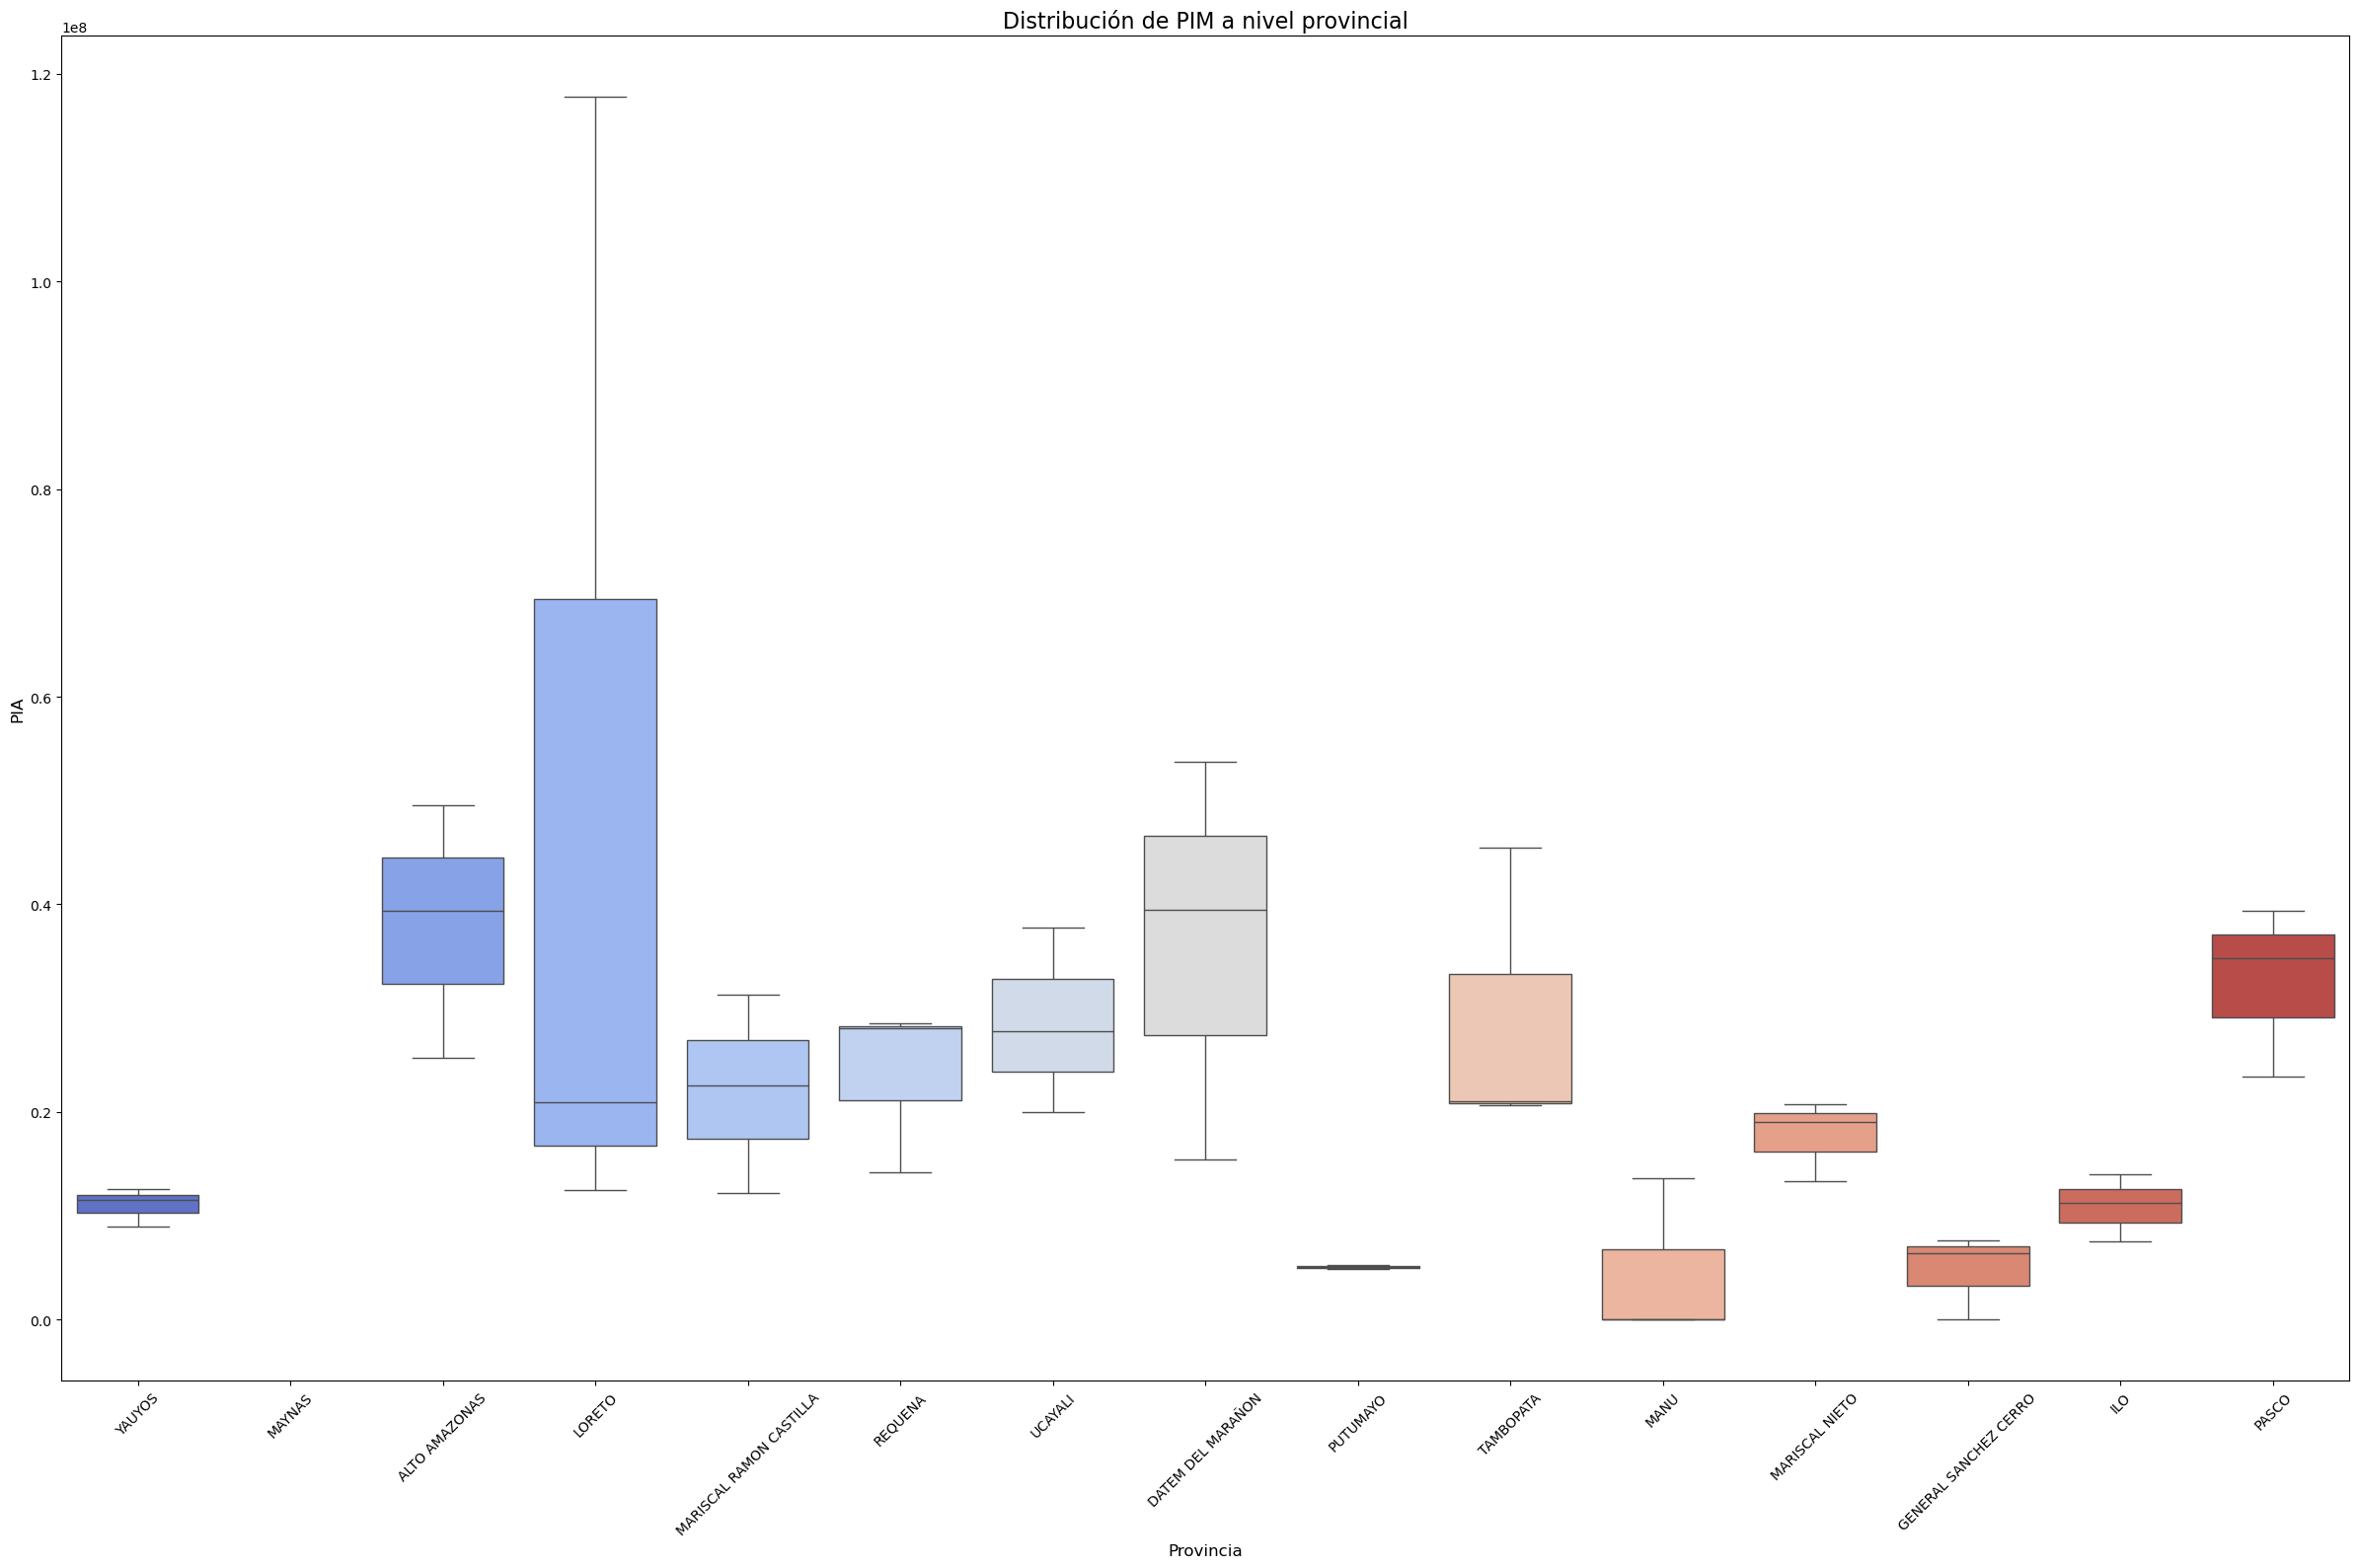

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


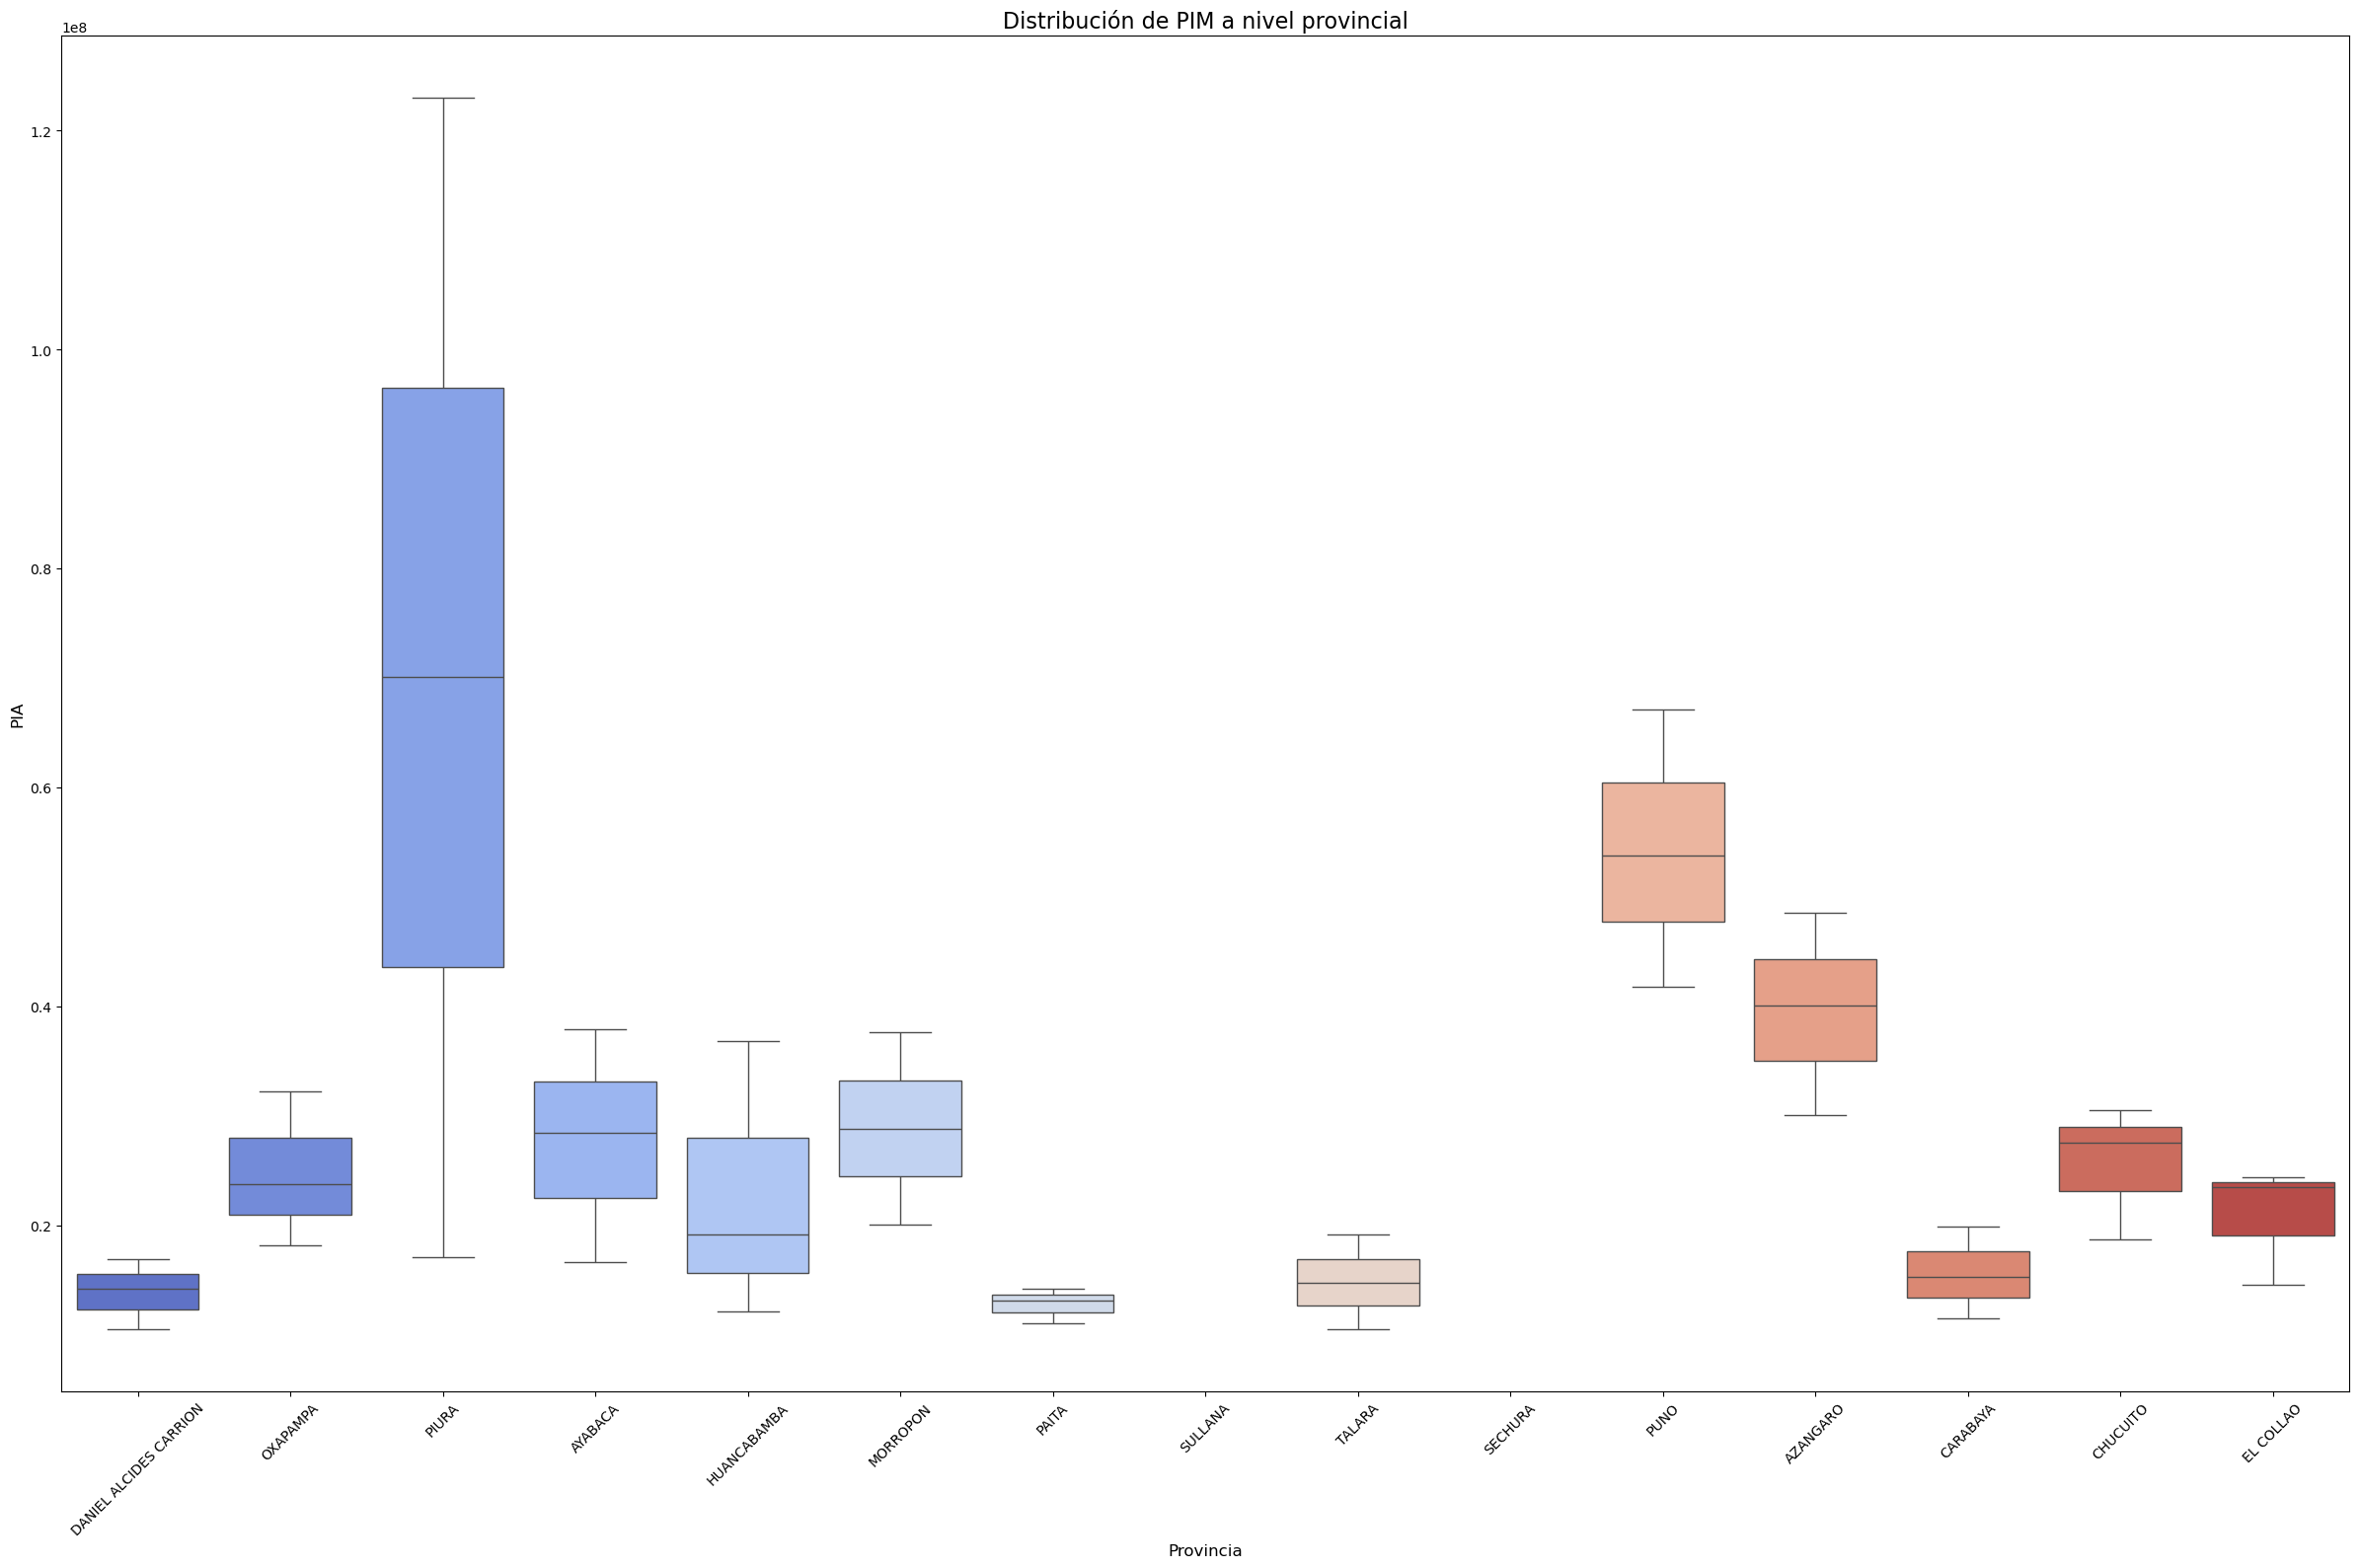

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


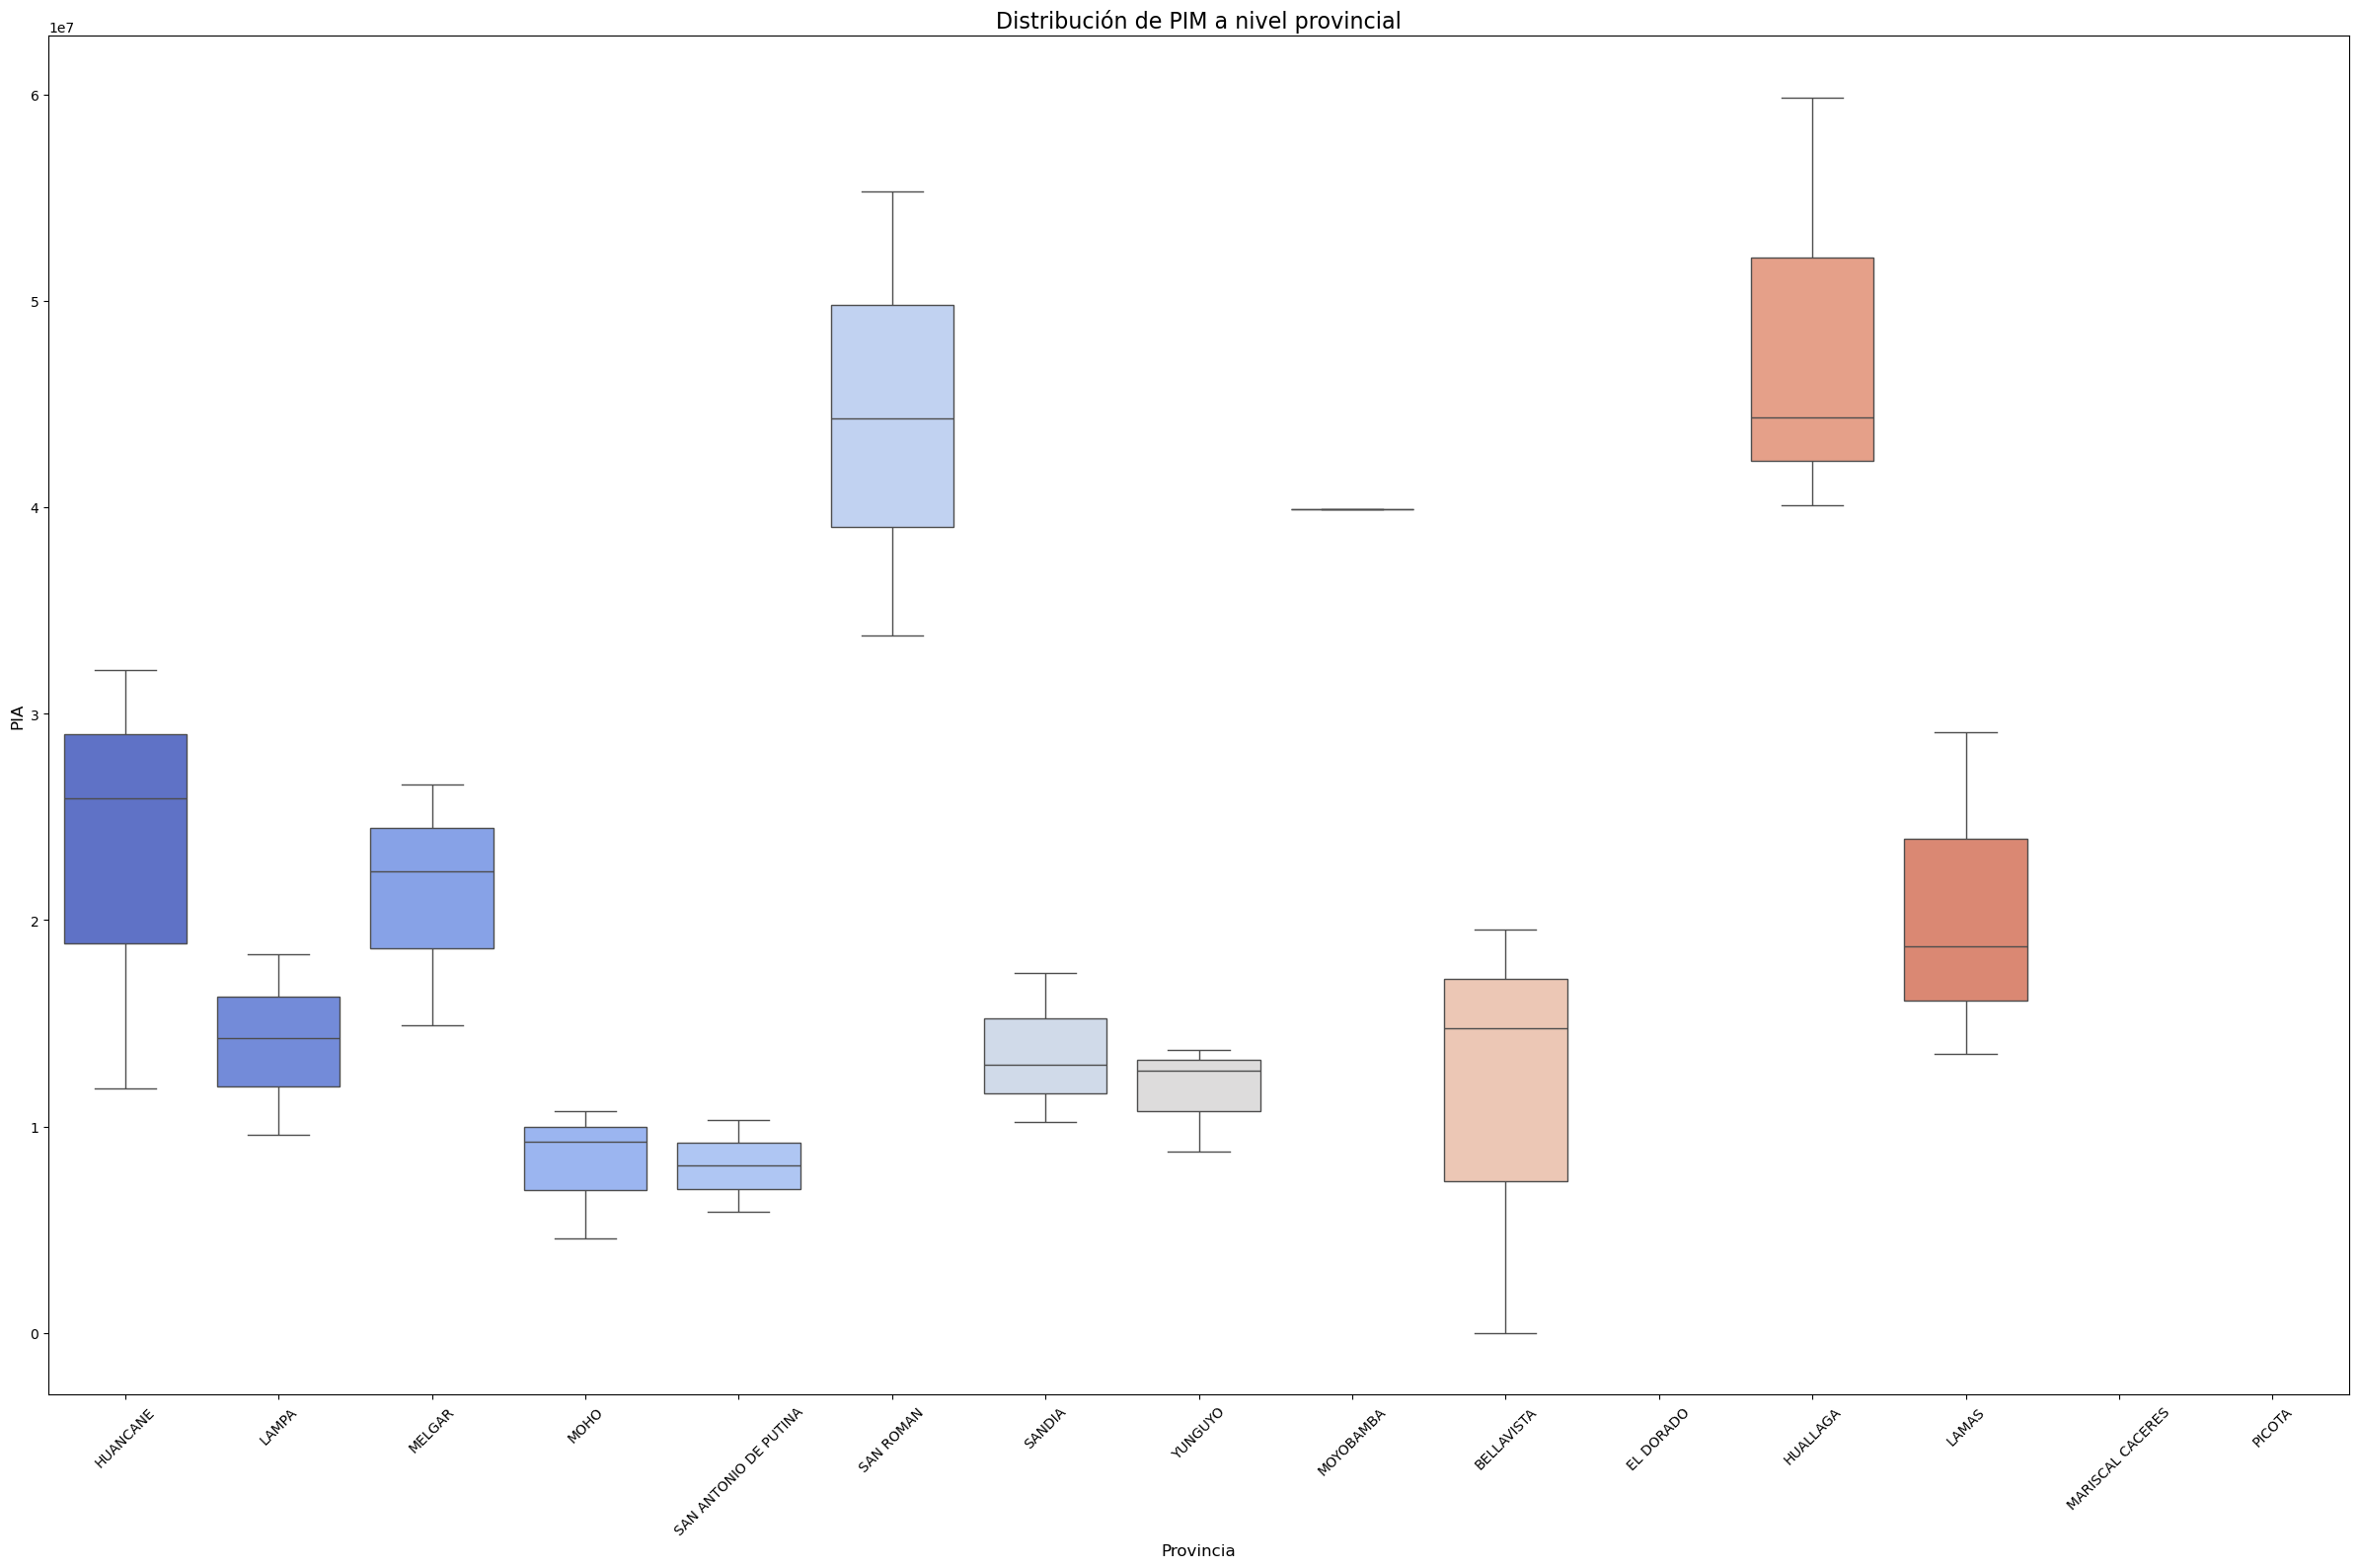

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14144\3615895692.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')


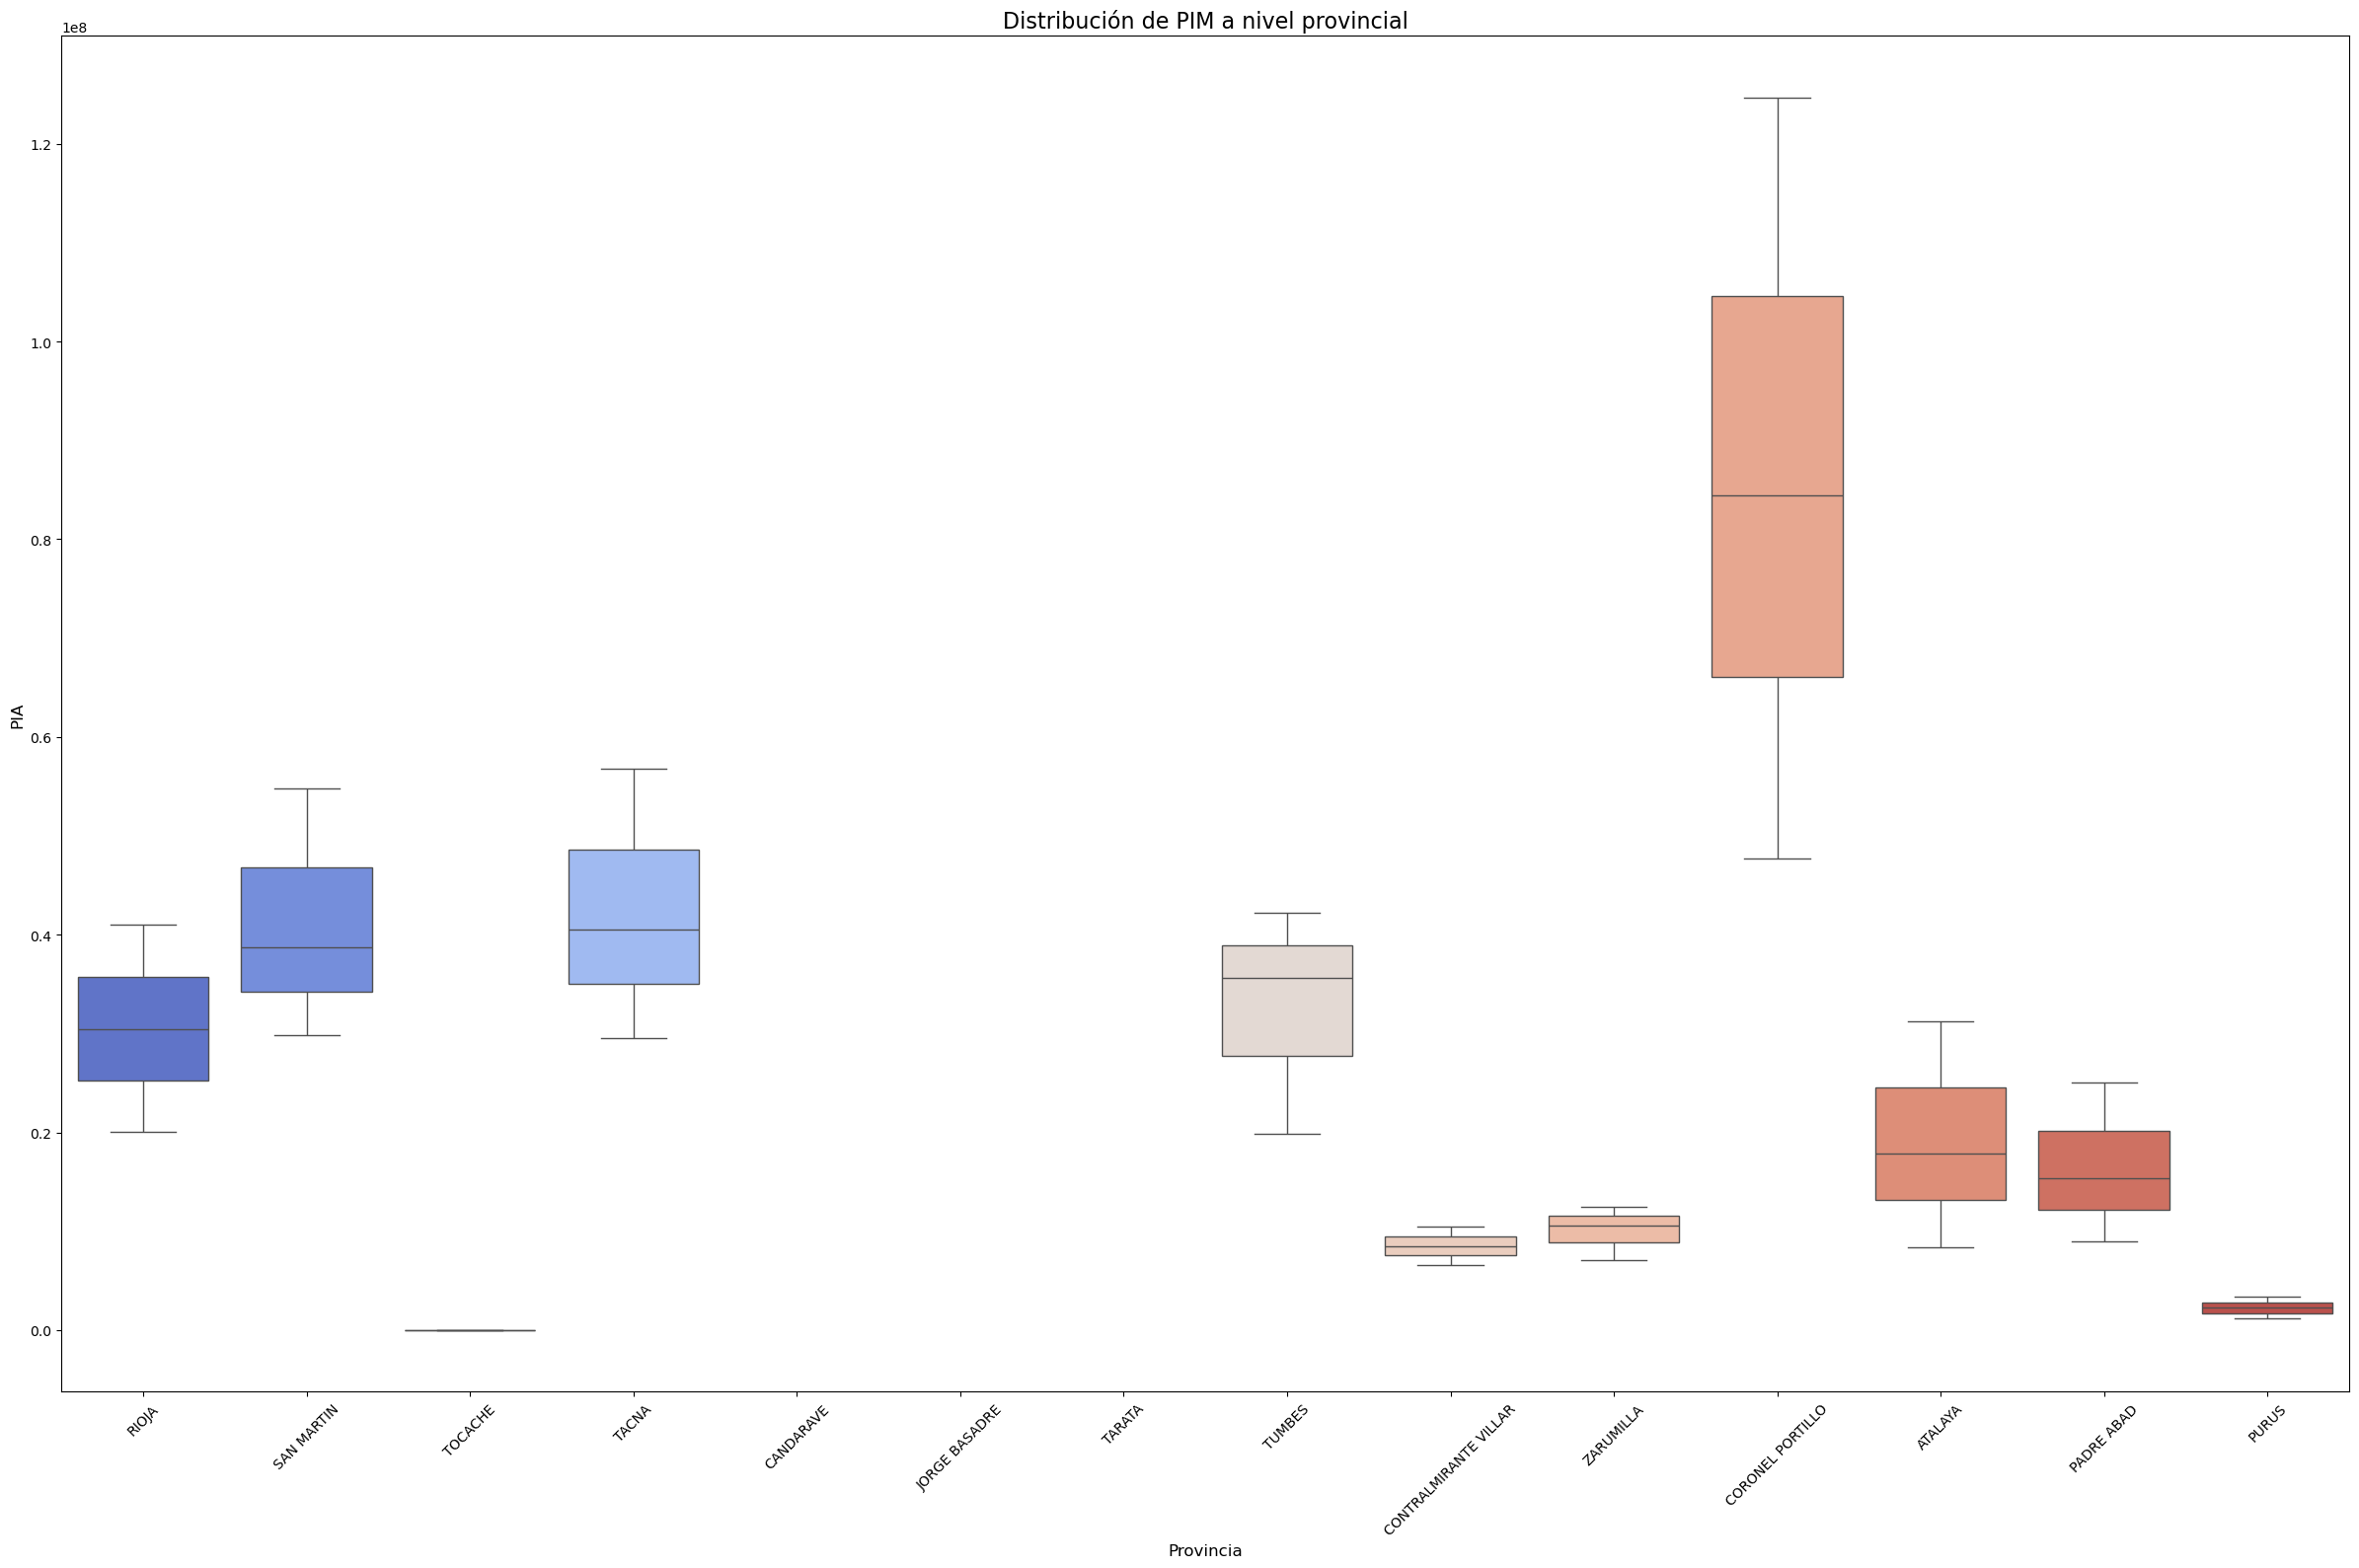

In [717]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que los datos estén en formato largo
years_columns = ['2015', '2019', '2023']  # Ajustar según las columnas disponibles
data_long = gdf_provincias.melt(id_vars=['PROVINCIA'], value_vars=years_columns, 
                                var_name='Año', value_name='Presupuesto')

provincias = data_long['PROVINCIA'].unique()

# Número de provincias y el número de grupos
num_provincias = len(provincias)
num_groups = (num_provincias + 14) // 15  # Agrupar en lotes de 15 provincias

for i in range(num_groups):
    plt.figure(figsize=(24, 16))  # Tamaño del gráfico
    
    provincias_subset = provincias[i*15:(i*15)+15]
    data_subset = data_long[data_long['PROVINCIA'].isin(provincias_subset)]
    
    # Boxplot
    sns.boxplot(x='PROVINCIA', y='Presupuesto', data=data_subset, palette='coolwarm')
    
    # Personalizamos
    plt.xticks(rotation=45)  # Rote los nombres de las provincias para mejor visibilidad
    plt.title(f'Distribución de PIM a nivel provincial', fontsize=16)
    plt.xlabel('Provincia', fontsize=12)
    plt.ylabel('PIA', fontsize=12)
    
    plt.tight_layout()
    plt.show()


In [718]:
import pandas as pd
LinkData3="https://docs.google.com/spreadsheets/d/1J8PUBJlYr9E27yup3Mxl3Bepw0Z8AaGWCcYWrMCbgJs/export?format=csv"
maindata = pd.read_csv(LinkData3,
                          index_col=0)
maindata

Provincia  DEPARTAMENTO  total_colegios  \
ProvinciaX                                                   
ABANCAY              ABANCAY      APURIMAC           158.0   
ACOBAMBA            ACOBAMBA  HUANCAVELICA           101.0   
ACOMAYO              ACOMAYO         CUSCO            61.0   
AIJA                    AIJA        ANCASH            34.0   
ALTO AMAZONAS  ALTO AMAZONAS        LORETO           399.0   
...                      ...           ...             ...   
YAULI                  YAULI         JUNIN            47.0   
YAUYOS                YAUYOS          LIMA           119.0   
YUNGAY                YUNGAY        ANCASH           143.0   
YUNGUYO              YUNGUYO          PUNO            47.0   
ZARUMILLA          ZARUMILLA        TUMBES            27.0   

               Col_Polidocente_Multigrado  Col_Unidocente  \
ProvinciaX                                                  
ABANCAY                                55              38   
ACOBAMBA                               56              17   
ACOMAYO                                29               9   
AIJA                                   14              11   
ALTO AMAZONAS                          94             210   
...                                   ...             ...   
YAULI                                  11              14   
YAUYOS                                 46              39   
YUNGAY                                 60              47   
YUNGUYO                                25               2   
ZARUMILLA                               9               5   

               Col_Polidocente_Completo  Col_No_disponible  colegios_urbanos  \
ProvinciaX                                                                     
ABANCAY                              51                 14                39   
ACOBAMBA                             21                  7                27   
ACOMAYO                              16                  7                15   
AIJA                                  7                  2                 6   
ALTO AMAZONAS                        43                 52                43   
...                                 ...                ...               ...   
YAULI                                20                  2                26   
YAUYOS                               27                  7                40   
YUNGAY                               27                  9                21   
YUNGUYO                              20                  0                12   
ZARUMILLA                            13                  0                13   

               colegios_rurales  total_alumnos_hom  total_alumnos_muj  \
ProvinciaX                                                              
ABANCAY                     119               6025               5946   
ACOBAMBA                     74               2946               2986   
ACOMAYO                      46               1809               1679   
AIJA                         28                466                470   
ALTO AMAZONAS               356              12362              11815   
...                         ...                ...                ...   
YAULI                        21               5385               5223   
YAUYOS                       79               2977               3208   
YUNGAY                      122               3695               3680   
YUNGUYO                      35               1712               1674   
ZARUMILLA                    14               3327               3006   

               total_alumnos  total_docentes  Pobreza_total_estimada  \
ProvinciaX                                                             
ABANCAY                11971             804                  45.201   
ACOBAMBA                5932             425                  51.899   
ACOMAYO                 3488             256                  51.059   
AIJA                     936              94                  43.25

In [720]:
import os, geopandas as gpd

provincias=gpd.read_file(os.path.join("data","Provincias_2023"))

In [721]:
provincias

OBJECTID CCDD CCPP DEPARTAMEN         PROVINCIA  \
0         1.0   01   01   AMAZONAS       CHACHAPOYAS   
1         2.0   01   02   AMAZONAS             BAGUA   
2         3.0   01   03   AMAZONAS           BONGARA   
3         4.0   01   04   AMAZONAS      CONDORCANQUI   
4         5.0   01   05   AMAZONAS              LUYA   
..        ...  ...  ...        ...               ...   
191     192.0   24   03     TUMBES         ZARUMILLA   
192     193.0   25   01    UCAYALI  CORONEL PORTILLO   
193     194.0   25   02    UCAYALI           ATALAYA   
194     195.0   25   03    UCAYALI        PADRE ABAD   
195     196.0   25   04    UCAYALI             PURUS   

                                              geometry  
0    POLYGON ((-77.72614 -5.94354, -77.72486 -5.943...  
1    POLYGON ((-78.61909 -4.51001, -78.61802 -4.510...  
2    POLYGON ((-77.72759 -5.1403, -77.72361 -5.1406...  
3    POLYGON ((-77.81399 -2.99278, -77.81483 -2.995...  
4    POLYGON ((-78.13023 -5.9037, -78.13011 -5.9041...  
..                                                 ...  
191  POLYGON ((-80.28521 -3.41276, -80.28406 -3.412...  
192  POLYGON ((-74.47145 -7.27617, -74.47052 -7.277...  
193  POLYGON ((-73.18146 -9.41174, -73.13475 -9.411...  
194  POLYGON ((-75.43663 -8.22999, -75.43651 -8.230...  
195  POLYGON ((-70.6138 -9.87339, -70.6214 -9.87808...  

[196 rows x 6 columns]

<Axes: >

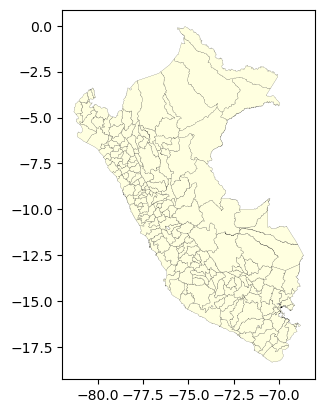

In [722]:
provincias.plot(facecolor="lightyellow",
               edgecolor='black',
               linewidth=0.1)

In [728]:
print(maindata.columns)


Index(['Provincia', 'DEPARTAMENTO', 'total_colegios',
       'Col_Polidocente_Multigrado', 'Col_Unidocente',
       'Col_Polidocente_Completo', 'Col_No_disponible', 'colegios_urbanos',
       'colegios_rurales', 'total_alumnos_hom', 'total_alumnos_muj',
       'total_alumnos', 'total_docentes', 'Pobreza_total_estimada',
       'P_En_Inicio', 'P_En_Proceso', 'P_Satisfactorio'],
      dtype='object')


In [730]:
maindata['Provincia']=maindata.Provincia.str.upper()
maindata.head()

Provincia  DEPARTAMENTO  total_colegios  \
ProvinciaX                                                   
ABANCAY              ABANCAY      APURIMAC           158.0   
ACOBAMBA            ACOBAMBA  HUANCAVELICA           101.0   
ACOMAYO              ACOMAYO         CUSCO            61.0   
AIJA                    AIJA        ANCASH            34.0   
ALTO AMAZONAS  ALTO AMAZONAS        LORETO           399.0   

               Col_Polidocente_Multigrado  Col_Unidocente  \
ProvinciaX                                                  
ABANCAY                                55              38   
ACOBAMBA                               56              17   
ACOMAYO                                29               9   
AIJA                                   14              11   
ALTO AMAZONAS                          94             210   

               Col_Polidocente_Completo  Col_No_disponible  colegios_urbanos  \
ProvinciaX                                                                     
ABANCAY                              51                 14                39   
ACOBAMBA                             21                  7                27   
ACOMAYO                              16                  7                15   
AIJA                                  7                  2                 6   
ALTO AMAZONAS                        43                 52                43   

               colegios_rurales  total_alumnos_hom  total_alumnos_muj  \
ProvinciaX                                                              
ABANCAY                     119               6025               5946   
ACOBAMBA                     74               2946               2986   
ACOMAYO                      46               1809               1679   
AIJA                         28                466                470   
ALTO AMAZONAS               356              12362              11815   

               total_alumnos  total_docentes  Pobreza_total_estimada  \
ProvinciaX                                                             
ABANCAY                11971             804                  45.201   
ACOBAMBA                5932             425                  51.899   
ACOMAYO                 3488             256                  51.059   
AIJA                     936              94                  43.258   
ALTO AMAZONAS          24177            1099                  64.278   

               P_En_Inicio  P_En_Proceso  P_Satisfactorio  
ProvinciaX                                                 
ABANCAY             27.969        48.765           23.266  
ACOBAMBA            14.406        58.928           26.667  
ACOMAYO             26.408        53.341           20.252  
AIJA                23.610        49.295           27.095  
ALTO AMAZONAS       64.402        30.089            5.509

NOMBRES DIFERENTES EN AMBAS DATAS:

In [733]:
onlymaindata=set(maindata.Provincia)- set(provincias.PROVINCIA)
onlyMap=set(provincias.PROVINCIA)- set(maindata.Provincia)

In [735]:
onlymaindata

set()

In [737]:
onlyMap

set()

In [739]:
# Convertir 'P_En_Inicio' a numérico, convirtiendo valores no numéricos en NaN
theMapAndData['P_En_Inicio'] = pd.to_numeric(theMapAndData['P_En_Inicio'], errors='coerce')


In [749]:
theMapAndData=provincias.merge(maindata,left_on='PROVINCIA', right_on='Provincia')
# nuevo mapa
theMapAndData.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   OBJECTID                    196 non-null    float64 
 1   CCDD                        196 non-null    object  
 2   CCPP                        196 non-null    object  
 3   DEPARTAMEN                  196 non-null    object  
 4   PROVINCIA                   196 non-null    object  
 5   geometry                    196 non-null    geometry
 6   Provincia                   196 non-null    object  
 7   DEPARTAMENTO                196 non-null    object  
 8   total_colegios              196 non-null    float64 
 9   Col_Polidocente_Multigrado  196 non-null    int64   
 10  Col_Unidocente              196 non-null    int64   
 11  Col_Polidocente_Completo    196 non-null    int64   
 12  Col_No_disponible           196 non-null    int64   
 13  colegios_urb

In [743]:
print(theMapAndData['P_En_Inicio'].describe())
print(theMapAndData['P_En_Inicio'].unique())


count    195.000000
mean      22.736595
std       12.612655
min        0.000000
25%       14.544000
50%       20.360000
75%       27.099500
max       65.581000
Name: P_En_Inicio, dtype: float64
[12.706 34.362 13.614 64.1   16.592 16.829 18.993 37.495 23.61  36.29
 22.398 22.039 29.076 34.771 20.242 32.944 30.751 22.619 40.927 45.803
 27.721 13.132 63.868 22.763 22.54  22.668 35.201 27.969 30.5   18.476
 24.359 36.723 43.204 25.952 14.116 13.281 15.384 17.981 18.073 19.467
  8.795 25.109 21.852 18.741 19.761 23.395 15.731 17.65  15.74  25.409
 19.12  25.29  21.189 27.113 32.163 22.886 15.627 14.187 20.497 15.221
 22.351 14.189 22.882 10.605 20.36  11.803 10.36  26.408 23.472 25.539
 23.476 13.499 21.206 18.581 26.618 23.106 30.727 19.374 14.43  23.06
 14.406 17.664  6.49  17.941 11.478 18.049 34.252 27.086 32.156 33.037
 29.73  25.277 40.077 26.482 21.157 19.317 17.131 14.624 14.043  4.425
  0.231 14.305 16.223 19.153 17.734 21.28  19.186 21.864 25.147 14.919
 16.131 16.581 14.819 26.89

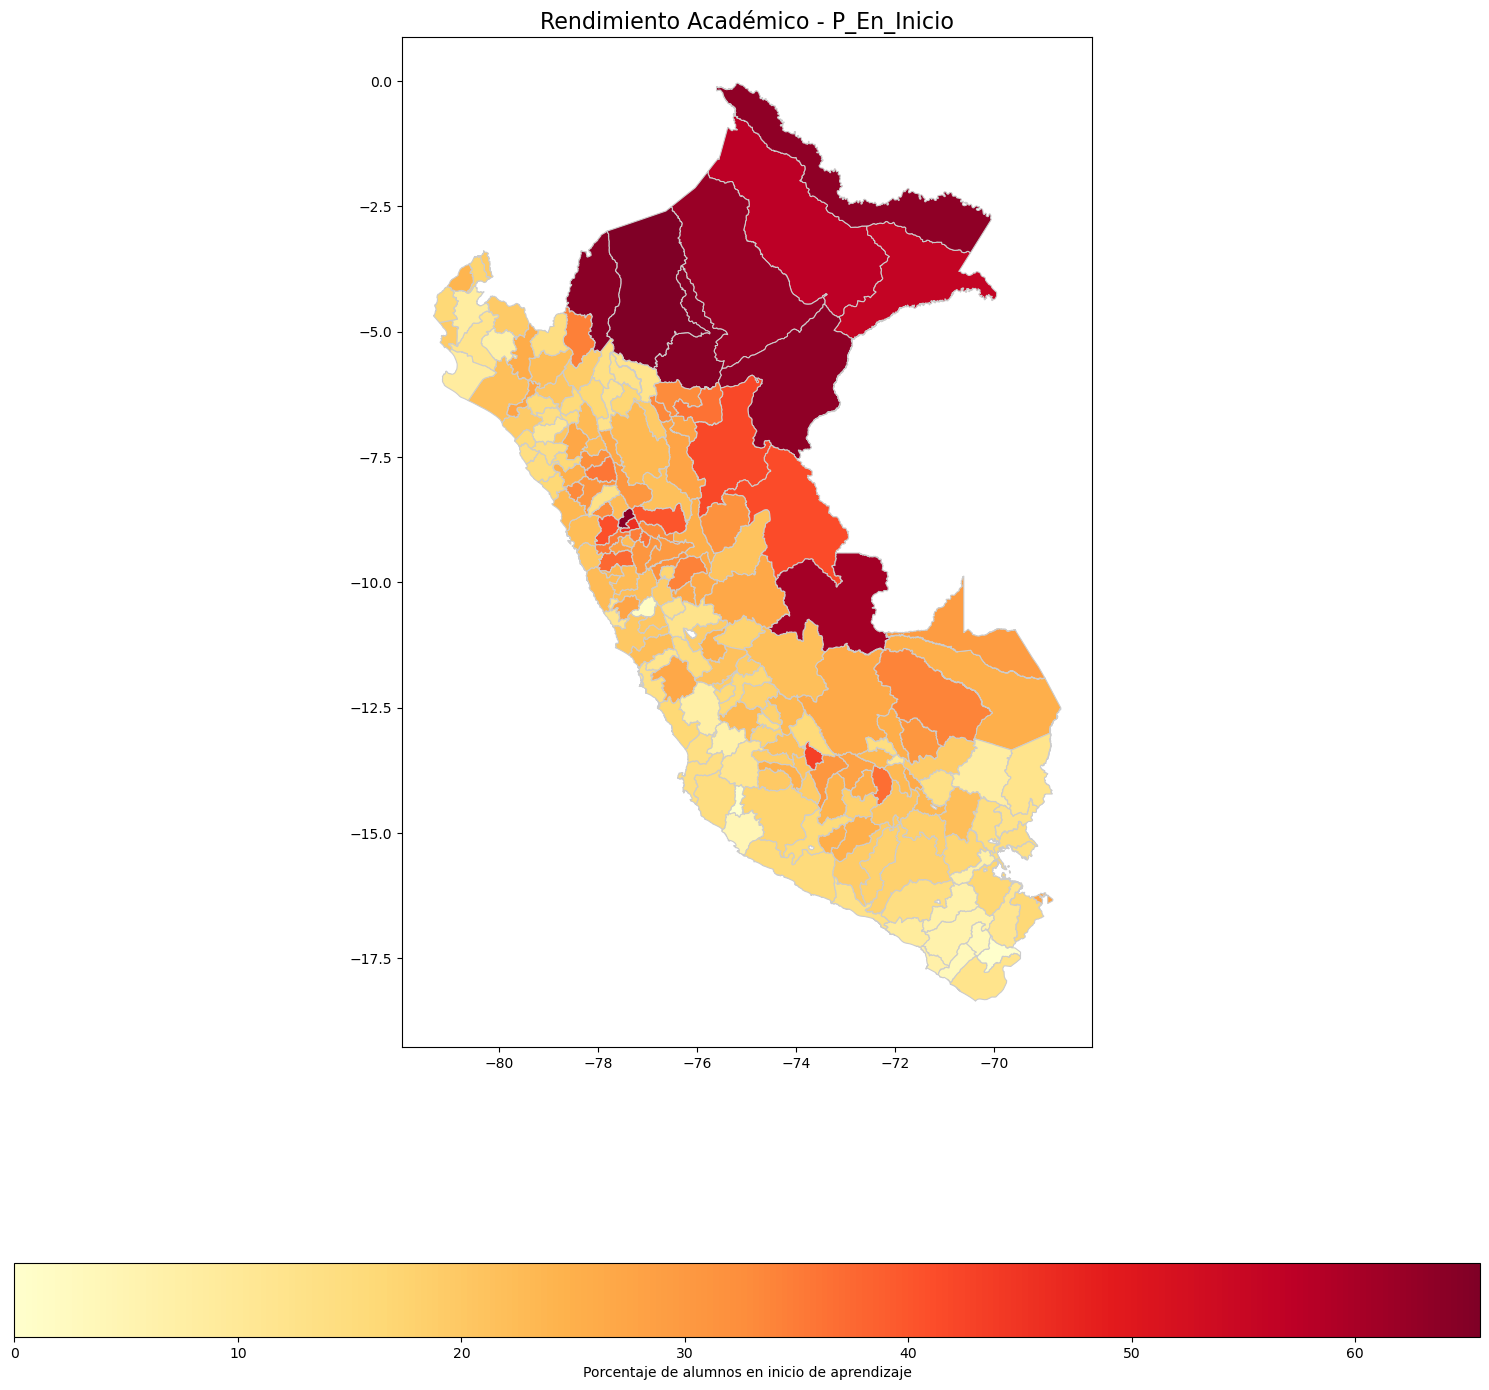

In [747]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que las columnas de porcentaje estén en formato numérico
theMapAndData['P_En_Inicio'] = pd.to_numeric(theMapAndData['P_En_Inicio'], errors='coerce')
theMapAndData['P_En_Proceso'] = pd.to_numeric(theMapAndData['P_En_Proceso'], errors='coerce')
theMapAndData['P_Satisfactorio'] = pd.to_numeric(theMapAndData['P_Satisfactorio'], errors='coerce')

# Selecciona la columna que deseas graficar
column_to_plot = 'P_En_Inicio'

# Crea el mapa de coropletas
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Asegúrate de que la proyección esté correcta
theMapAndData = theMapAndData.set_crs('EPSG:4326')  # Establece la proyección adecuada

# Gráfico del mapa con coropletas
theMapAndData.plot(column=column_to_plot, ax=ax, legend=True,
                  legend_kwds={'label': "Porcentaje de alumnos en inicio de aprendizaje",
                               'orientation': "horizontal"},
                  cmap='YlOrRd', linewidth=0.8, edgecolor='0.8')

# Añadir título
plt.title(f'Rendimiento Académico - {column_to_plot}', fontsize=16)

# Ajustar márgenes y mostrar el gráfico
plt.tight_layout()  # Ajusta el espaciado del gráfico
plt.show()


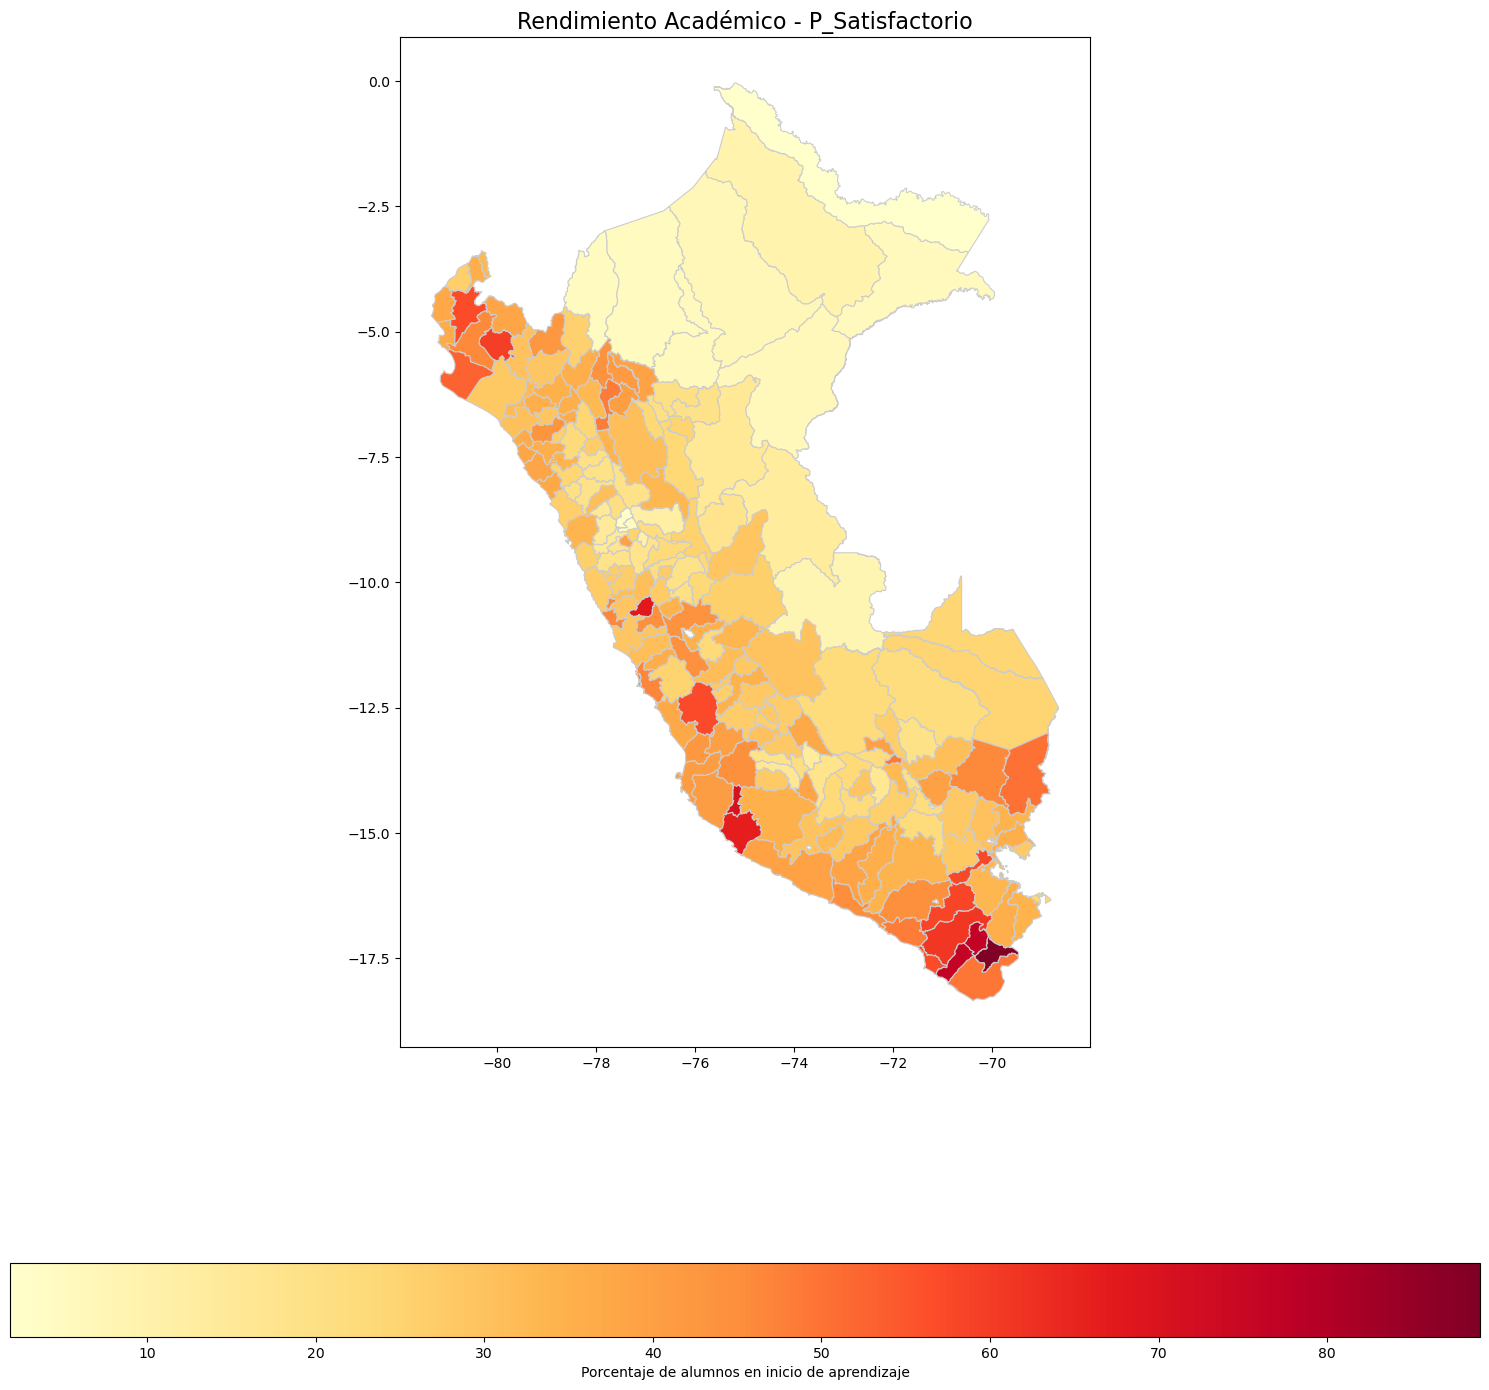

In [751]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que las columnas de porcentaje estén en formato numérico
theMapAndData['P_En_Inicio'] = pd.to_numeric(theMapAndData['P_En_Inicio'], errors='coerce')
theMapAndData['P_En_Proceso'] = pd.to_numeric(theMapAndData['P_En_Proceso'], errors='coerce')
theMapAndData['P_Satisfactorio'] = pd.to_numeric(theMapAndData['P_Satisfactorio'], errors='coerce')

# Selecciona la columna que deseas graficar
column_to_plot = 'P_Satisfactorio'

# Crea el mapa de coropletas
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Asegúrate de que la proyección esté correcta
theMapAndData = theMapAndData.set_crs('EPSG:4326')  # Establece la proyección adecuada

# Gráfico del mapa con coropletas
theMapAndData.plot(column=column_to_plot, ax=ax, legend=True,
                  legend_kwds={'label': "Porcentaje de alumnos en inicio de aprendizaje",
                               'orientation': "horizontal"},
                  cmap='YlOrRd', linewidth=0.8, edgecolor='0.8')

# Añadir título
plt.title(f'Rendimiento Académico - {column_to_plot}', fontsize=16)

# Ajustar márgenes y mostrar el gráfico
plt.tight_layout()  # Ajusta el espaciado del gráfico
plt.show()

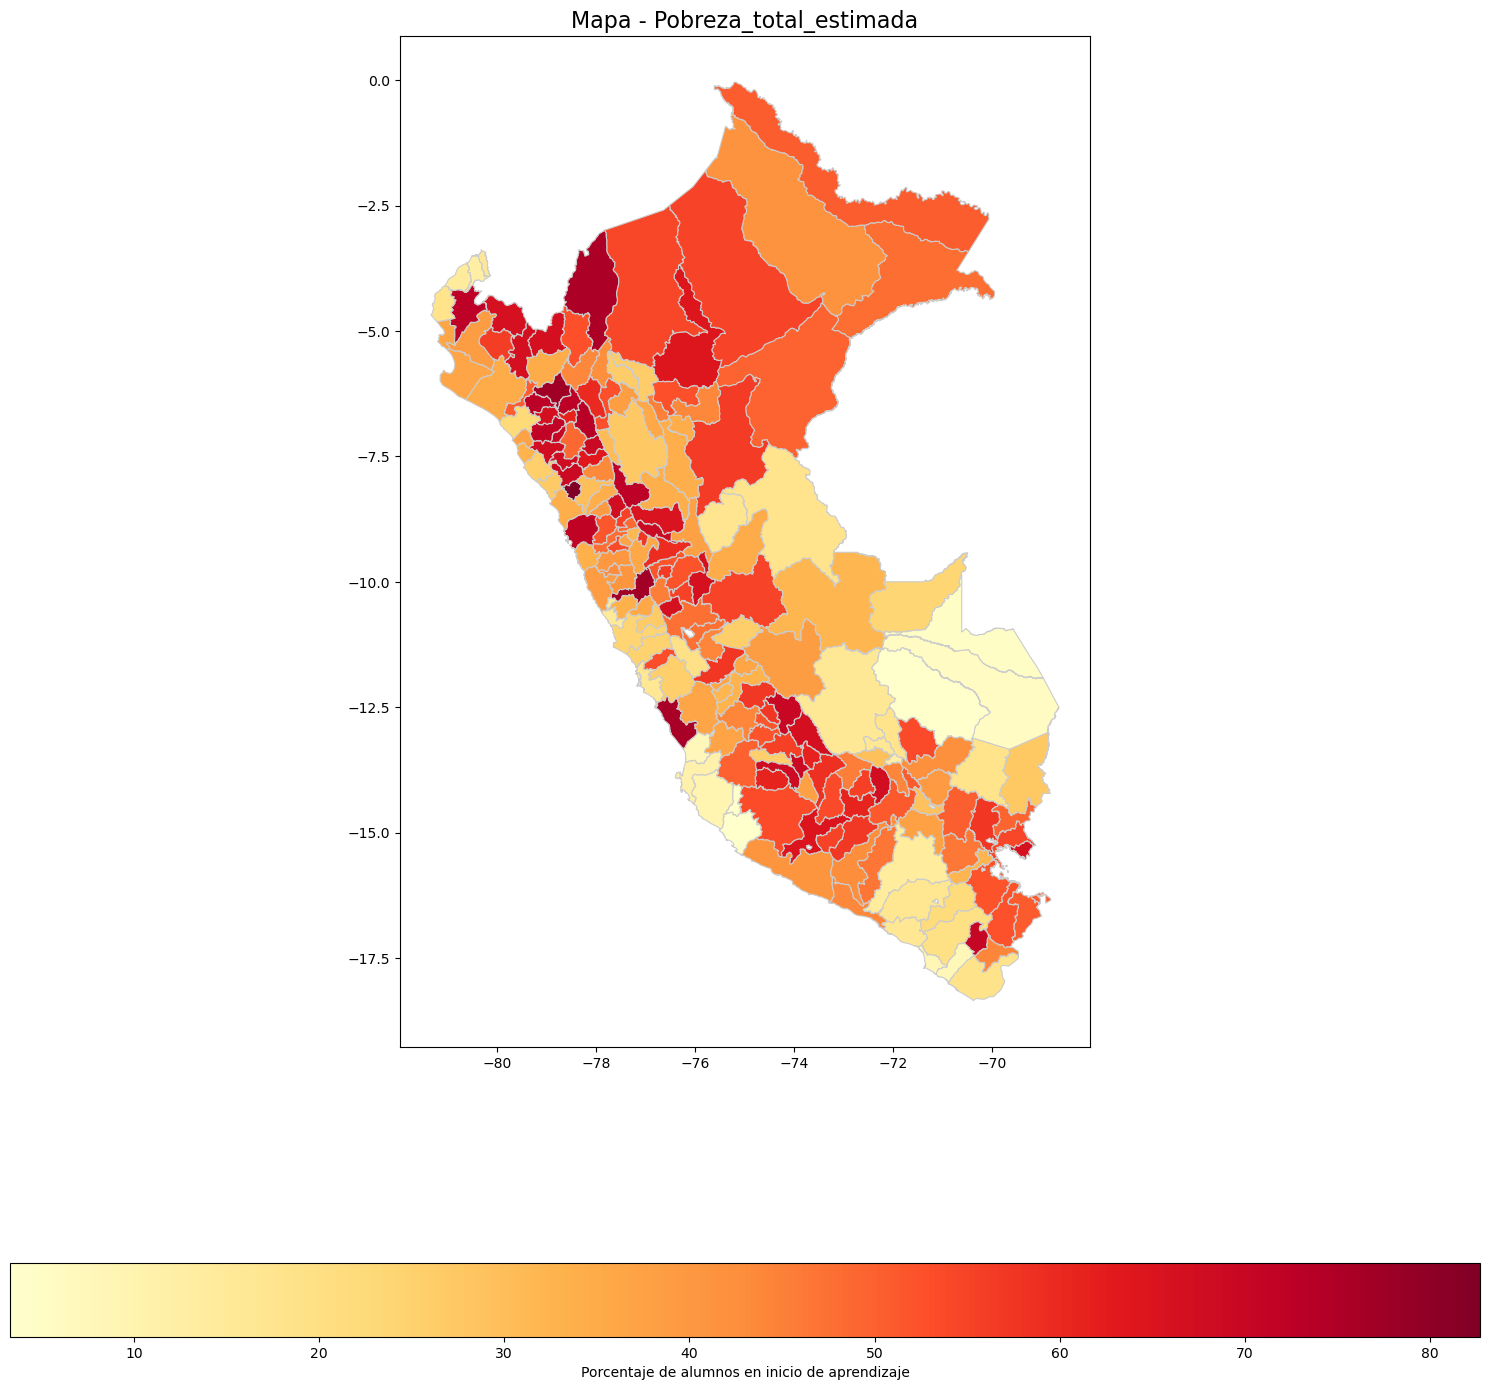

In [759]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que las columnas de porcentaje estén en formato numérico
theMapAndData['P_En_Inicio'] = pd.to_numeric(theMapAndData['P_En_Inicio'], errors='coerce')
theMapAndData['P_En_Proceso'] = pd.to_numeric(theMapAndData['P_En_Proceso'], errors='coerce')
theMapAndData['P_Satisfactorio'] = pd.to_numeric(theMapAndData['P_Satisfactorio'], errors='coerce')

# Selecciona la columna que deseas graficar
column_to_plot = 'Pobreza_total_estimada'

# Crea el mapa de coropletas
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Asegúrate de que la proyección esté correcta
theMapAndData = theMapAndData.set_crs('EPSG:4326')  # Establece la proyección adecuada

# Gráfico del mapa con coropletas
theMapAndData.plot(column=column_to_plot, ax=ax, legend=True,
                  legend_kwds={'label': "Porcentaje de alumnos en inicio de aprendizaje",
                               'orientation': "horizontal"},
                  cmap='YlOrRd', linewidth=0.8, edgecolor='0.8')

# Añadir título
plt.title(f'Mapa - {column_to_plot}', fontsize=16)

# Ajustar márgenes y mostrar el gráfico
plt.tight_layout()  # Ajusta el espaciado del gráfico
plt.show()

# OPTIMIZATION

In [860]:
import pandas as pd
LinkData3="https://docs.google.com/spreadsheets/d/1J8PUBJlYr9E27yup3Mxl3Bepw0Z8AaGWCcYWrMCbgJs/export?format=csv"
educa = pd.read_csv(LinkData3,
                          index_col=0)
educa

Provincia   DEPARTAMENTO  \
PROVINCIAX                                                          
ABANCAY                                    ABANCAY       APURIMAC   
ACOBAMBA                                  ACOBAMBA   HUANCAVELICA   
ACOMAYO                                    ACOMAYO          CUSCO   
AIJA                                          AIJA         ANCASH   
ALTO AMAZONAS                        ALTO AMAZONAS         LORETO   
AMBO                                          AMBO        HUANUCO   
ANDAHUAYLAS                            ANDAHUAYLAS       APURIMAC   
ANGARAES                                  ANGARAES   HUANCAVELICA   
ANTA                                          ANTA          CUSCO   
ANTABAMBA                                ANTABAMBA       APURIMAC   
ANTONIO RAYMONDI                  ANTONIO RAYMONDI         ANCASH   
AREQUIPA                                  AREQUIPA       AREQUIPA   
ASCOPE                                      ASCOPE    LA LIBERTAD   
ASUNCION                                  ASUNCION         ANCASH   
ATALAYA                                    ATALAYA        UCAYALI   
AYABACA                                    AYABACA          PIURA   
AYMARAES                                  AYMARAES       APURIMAC   
AZANGARO                                  AZANGARO           PUNO   
BAGUA                                        BAGUA       AMAZONAS   
BARRANCA                                  BARRANCA           LIMA   
BELLAVISTA                              BELLAVISTA     SAN MARTIN   
BOLIVAR                                    BOLIVAR    LA LIBERTAD   
BOLOGNESI                                BOLOGNESI         ANCASH   
BONGARA                                    BONGARA       AMAZONAS   
CAÑETE                                      CAÑETE           LIMA   
CAJABAMBA                                CAJABAMBA      CAJAMARCA   
CAJAMARCA                                CAJAMARCA      CAJAMARCA   
CAJATAMBO                                CAJATAMBO           LIMA   
CALCA                                        CALCA          CUSCO   
CALLAO                                      CALLAO         CALLAO   
CAMANA                                      CAMANA       AREQUIPA   
CANAS                                        CANAS          CUSCO   
CANCHIS                                    CANCHIS          CUSCO   
CANDARAVE                                CANDARAVE          TACNA   
CANGALLO                                  CANGALLO       AYACUCHO   
CANTA                                        CANTA           LIMA   
CARABAYA                                  CARABAYA           PUNO   
CARAVELI                                  CARAVELI       AREQUIPA   
CARHUAZ                                    CARHUAZ         ANCASH   
                         CARLOS FERMIN FITZCARRALD         ANCASH   
CASMA                                        CASMA         ANCASH   
CASTILLA                                  CASTILLA       AREQUIPA   
CASTROVIRREYNA                      CASTROVIRREYNA   HUANCAVELICA   
CAYLLOMA                                  CAYLLOMA       AREQUIPA   
CELENDIN                                  CELENDIN      CAJAMARCA   
CHACHAPOYAS                            CHACHAPOYAS       AMAZONAS   
CHANCHAMAYO                            CHANCHAMAYO          JUNIN   
CHEPEN                                      CHEPEN    LA LIBERTAD   
CHICLAYO                                  CHICLAYO     LAMBAYEQUE   
CHINCHA                                    CHINCHA            ICA   
CHINCHEROS                              CHINCHEROS       APURIMAC   
CHOTA                                        CHOTA      CAJAMARCA   
CHUCUITO                                  CHUCUITO           PUNO   
CHUMBIVILCAS                          CHUMBIVILCAS          CUSCO   
CHUPACA                                    CHUPACA          JUNIN   
CHURCAMPA                                CHURCAMPA   HUANCAVELICA   
CONCEPCION                             

In [862]:
import pandas as pd

# Asegúrate de que las columnas sean de tipo numérico, manejando los errores correctamente
educa['Presupuesto'] = pd.to_numeric(educa['Presupuesto'], errors='coerce')
educa['total_colegios'] = pd.to_numeric(educa['total_colegios'], errors='coerce')
educa['total_alumnos'] = pd.to_numeric(educa['total_alumnos'], errors='coerce')

# Verifica si hay valores NaN
print(educa.isna().sum())  # Para saber cuántos valores NaN hay en cada columna

# Realiza las operaciones ahora que las columnas son numéricas
educa['rate_Colegio_por_presupuesto'] = educa['Presupuesto'] / educa['total_colegios']
educa['rate_Docentes_por_alumnos'] = educa['Presupuesto'] / educa['total_alumnos']

# Verifica los primeros valores
print(educa[['rate_Colegio_por_presupuesto', 'rate_Docentes_por_alumnos']].head())


Provincia           0
DEPARTAMENTO        0
total_colegios      0
total_alumnos       0
total_docentes      0
P_En_Inicio         1
P_En_Proceso        1
P_Satisfactorio     1
Presupuesto        28
dtype: int64
               rate_Colegio_por_presupuesto  rate_Docentes_por_alumnos
PROVINCIAX                                                            
ABANCAY                       197990.367089                2613.188372
ACOBAMBA                      130524.504950                2222.349123
ACOMAYO                                 NaN                        NaN
AIJA                          108760.352941                3950.696581
ALTO AMAZONAS                  88501.421053                1460.564462


In [864]:
import altair as alt

points = alt.Chart(educa).mark_point().encode(
    x='rate_Docentes_por_alumnos',
    y='rate_Colegio_por_presupuesto'
)

text = points.mark_text(
    align='right',
    baseline='middle',
    dx=-7
).encode(
    text='Provincia'
).interactive()

points + text

alt.LayerChart(...)

In [866]:
educa[['Provincia','rate_Colegio_por_presupuesto','rate_Docentes_por_alumnos']].sort_values(by='rate_Colegio_por_presupuesto',ascending=False).head()

Provincia  rate_Colegio_por_presupuesto  \
PROVINCIAX                                                   
LIMA                    LIMA                  2.920484e+06   
CUSCO                  CUSCO                  8.858545e+05   
ILO                      ILO                  6.473144e+05   
HUALLAGA            HUALLAGA                  5.678092e+05   
HUANCA SANCOS  HUANCA SANCOS                  4.399005e+05   

               rate_Docentes_por_alumnos  
PROVINCIAX                                
LIMA                           21.342184  
CUSCO                        5497.235473  
ILO                          4736.446829  
HUALLAGA                    10455.192526  
HUANCA SANCOS                8500.491948

In [868]:
educa[['Provincia','rate_Colegio_por_presupuesto','rate_Docentes_por_alumnos']].sort_values(by='rate_Docentes_por_alumnos',ascending=False).head()

Provincia  rate_Colegio_por_presupuesto  \
PROVINCIAX                                                                 
HUALLAGA                          HUALLAGA                 567809.205882   
HUANCA SANCOS                HUANCA SANCOS                 439900.458333   
BARRANCA                          BARRANCA                 292821.400000   
PAUCAR DEL SARA SARA  PAUCAR DEL SARA SARA                 250033.586207   
CONDESUYOS                      CONDESUYOS                 258027.172414   

                      rate_Docentes_por_alumnos  
PROVINCIAX                                       
HUALLAGA                           10455.192526  
HUANCA SANCOS                       8500.491948  
BARRANCA                            7782.283841  
PAUCAR DEL SARA SARA                7417.876215  
CONDESUYOS                          6983.469902

In [870]:
Best_Colegio_por_presupuesto = educa.rate_Colegio_por_presupuesto.idxmax()
Best_Docentes_por_alumnos = educa.rate_Docentes_por_alumnos.idxmax()

# Obtener los datos para frontier1
frontier1_data = educa.loc[Best_Colegio_por_presupuesto, ['rate_Colegio_por_presupuesto', 'rate_Docentes_por_alumnos']]

# Verificar si es un DataFrame (múltiples filas)
if isinstance(frontier1_data, pd.DataFrame):
    # Seleccionar la primera fila
    frontier1 = frontier1_data.iloc[0].values.flatten().tolist()
else:
    # Si es una Serie (una sola fila)
    frontier1 = frontier1_data.values.flatten().tolist()

# Repetir el proceso para frontier2
frontier2_data = educa.loc[Best_Docentes_por_alumnos, ['rate_Colegio_por_presupuesto', 'rate_Docentes_por_alumnos']]

if isinstance(frontier2_data, pd.DataFrame):
    frontier2 = frontier2_data.iloc[0].values.flatten().tolist()
else:
    frontier2 = frontier2_data.values.flatten().tolist()

# Parallels
frontier1v = [frontier1[0], 0]
frontier2h = [0, frontier2[1]]

# Crear el DataFrame
envelope = pd.DataFrame([frontier2h, frontier2, frontier1, frontier1v], columns=['x', 'y'])
envelope

x             y
0  0.000000e+00  10455.192526
1  5.678092e+05  10455.192526
2  2.920484e+06     21.342184
3  2.920484e+06      0.000000

In [872]:
points + text + alt.Chart(envelope).mark_line(color='red').encode(
    x='x',
    y='y',
)

alt.LayerChart(...)

In [874]:
## installation
!pip install Pyfrontier

In [880]:
educaInput=educa.columns[1:7].to_list()
educaOutput=educa.columns[7:10].to_list()

In [886]:
educa = educa.dropna(subset=educaInput + educaOutput)  # Elimina filas con NaN en las columnas seleccionadas


In [888]:
print(educa[educaInput].dtypes)  # Verifica el tipo de datos de las entradas
print(educa[educaOutput].dtypes)  # Verifica el tipo de datos de las salidas


DEPARTAMENTO       object
total_colegios    float64
total_alumnos       int64
total_docentes      int64
P_En_Inicio       float64
P_En_Proceso      float64
dtype: object
P_Satisfactorio                 float64
Presupuesto                     float64
rate_Colegio_por_presupuesto    float64
dtype: object


In [892]:
# Fit sin n_jobs
dea_air_vrs_in.fit(
    inputs=educa[educaInput].to_numpy(),
    outputs=educa[educaOutput].to_numpy()
)


RecursionError: maximum recursion depth exceeded

In [902]:
import matplotlib.pyplot as plt
import pandas as pd

# Crear un DataFrame con los datos proporcionados
data = {
    'Provincia': ['BAGUA', 'BONGARA', 'CHACHAPOYAS', 'CONDORCANQUI', 'LUYA', 'RODRIGUEZ DE MENDOZA', 'UTCUBAMBA', 'AIJA', 
                  'ANTONIO RAYMONDI', 'ASUNCION', 'BOLOGNESI', 'CARHUAZ', 'CARLOS FERMIN FITZCARRALD', 'CASMA', 'CORONGO', 
                  'HUARAZ', 'HUARI', 'HUARMEY', 'HUAYLAS', 'MARISCAL LUZURIAGA', 'OCROS', 'PALLASCA', 'POMABAMBA', 'RECUAY', 
                  'SANTA', 'SIHUAS', 'YUNGAY', 'ABANCAY', 'ANDAHUAYLAS', 'ANTABAMBA', 'AYMARAES', 'CHINCHEROS', 'COTABAMBAS', 
                  'GRAU', 'AREQUIPA', 'CAMANA', 'CARAVELI', 'CASTILLA', 'CAYLLOMA', 'CONDESUYOS', 'ISLAY', 'LA UNION', 
                  'CANGALLO', 'HUAMANGA', 'HUANCA SANCOS', 'HUANTA', 'LA MAR', 'LUCANAS', 'PARINACOCHAS', 'PAUCAR DEL SARA SARA', 
                  'SUCRE', 'VICTOR FAJARDO', 'VILCAS HUAMAN', 'CAJABAMBA', 'CAJAMARCA', 'CELENDIN', 'CHOTA', 'CONTUMAZA', 
                  'CUTERVO', 'HUALGAYOC', 'JAEN', 'SAN IGNACIO', 'SAN MARCOS', 'SAN MIGUEL', 'SAN PABLO', 'SANTA CRUZ', 
                  'ACOMAYO', 'ANTA', 'CALCA', 'CANAS', 'CANCHIS', 'CHUMBIVILCAS', 'CUSCO', 'ESPINAR', 'LA CONVENCION', 
                  'PARURO', 'PAUCARTAMBO', 'QUISPICANCHI', 'URUBAMBA', 'ACOBAMBA', 'ANGARAES', 'CASTROVIRREYNA', 'CHURCAMPA', 
                  'HUANCAVELICA', 'HUAYTARA', 'TAYACAJA', 'AMBO', 'DOS DE MAYO', 'HUACAYBAMBA', 'HUAMALIES', 'HUANUCO', 
                  'LAURICOCHA', 'LEONCIO PRADO', 'MARANON', 'PACHITEA', 'PUERTO INCA', 'YAROWILCA', 'CHINCHA', 'ICA', 
                  'NASCA', 'PALPA', 'PISCO', 'CHANCHAMAYO', 'CHUPACA', 'CONCEPCION', 'HUANCAYO', 'JAUJA', 'JUNIN', 'SATIPO', 
                  'TARMA', 'YAULI', 'ASCOPE', 'BOLIVAR', 'CHEPEN', 'GRAN CHIMU', 'JULCAN', 'OTUZCO', 'PACASMAYO', 'PATAZ', 
                  'SANCHEZ CARRION', 'SANTIAGO DE CHUCO', 'TRUJILLO', 'VIRU', 'CHICLAYO', 'FERRENAFE', 'LAMBAYEQUE', 'BARRANCA', 
                  'CAÑETE', 'CAJATAMBO', 'CANTA', 'HUARAL', 'HUAROCHIRI', 'HUAURA', 'LIMA', 'OYON', 'YAUYOS', 'ALTO AMAZONAS', 
                  'DATEM DEL MARAÑON', 'LORETO', 'MARISCAL RAMON CASTILLA', 'MAYNAS', 'PUTUMAYO', 'REQUENA', 'UCAYALI', 'MANU', 
                  'TAMBOPATA', 'GENERAL SANCHEZ CERRO', 'ILO', 'MARISCAL NIETO', 'DANIEL ALCIDES CARRION', 'OXAPAMPA', 'PASCO', 
                  'AYABACA', 'HUANCABAMBA', 'MORROPON', 'PAITA', 'PIURA', 'SECHURA', 'SULLANA', 'TALARA', 'AZANGARO', 'CARABAYA', 
                  'CHUCUITO', 'EL COLLAO', 'HUANCANE', 'LAMPA', 'MELGAR', 'MOHO', 'PUNO', 'SAN ANTONIO DE PUTINA', 'SAN ROMAN', 
                  'SANDIA', 'YUNGUYO', 'BELLAVISTA', 'EL DORADO', 'HUALLAGA', 'LAMAS', 'MARISCAL CACERES', 'MOYOBAMBA', 'PICOTA', 
                  'RIOJA', 'SAN MARTIN', 'TOCACHE', 'CANDARAVE', 'JORGE BASADRE', 'TACNA', 'TARATA', 'CONTRALMIRANTE VILLAR', 
                  'TUMBES', 'ZARUMILLA', 'ATALAYA', 'CORONEL PORTILLO', 'PADRE ABAD', 'PURUS'],
    'vrs_in': [0.097891, 0.385593, 0.192493, 0.128378, 0.159446, 0.277401, 0.090664, 0.891667, 0.781338, 0.816346, 0.466917, 
               0.345471, 0.393939, 0.562360, 1.000000, 0.218460, 1.000000, 0.639577, 0.271193, 0.364253, 1.000000, 0.335507, 
               0.320403, 0.459021, 0.247213, 0.321783, 0.323705, 0.116071, 0.129786, 0.674074, 0.378258, 0.262867, 0.310625, 
               0.316440, 0.331468, 0.374112, 1.000000, 0.337223, 0.407451, 0.823028, 0.579348, 0.522878, 0.487146, 0.110421, 
               1.000000, 0.214187, 0.362703, 0.185428, 0.259024, 0.516995, 1.000000, 1.000000, 0.395082, 0.177611, 0.074204, 
               0.118145, 0.123793, 0.241016, 0.084467, 0.164858, 0.101356, 0.276290, 0.190129, 0.150721, 0.358268, 0.206490, 
               0.318361, 0.274889, 0.271851, 0.253833, 0.121566, 0.526105, 0.172468, 0.286086, 1.000000, 0.277916, 0.531198, 
               0.297036, 0.348688, 0.275424, 0.212377, 0.278948, 0.186026, 0.104721, 0.285706, 0.102013, 0.230993, 0.206818, 
               0.415525, 0.197451, 0.071135, 0.334559, 0.101244, 0.312268, 0.264685, 0.187886, 0.304774, 0.174258, 0.167013, 
               0.531817, 0.575949, 0.289438, 0.084745, 0.299608, 0.198418, 0.076039, 0.169440, 0.399281, 0.089226, 0.222669, 
               0.503299, 0.290226, 0.578372, 0.370671, 0.291040, 0.356541, 0.132520, 0.382035, 0.203753, 0.141959, 0.260506, 
               0.221889, 0.291187, 0.280940, 0.145920, 0.087536, 0.229757, 0.219168, 0.667029, 0.249179, 0.306479, 0.208472]
}

# Convertir los datos a un DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df['Provincia'], df['vrs_in'], color='skyblue')

# Rotar las etiquetas de las provincias para que se vean bien
plt.xticks(rotation=90)

# Añadir títulos y etiquetas
plt.title('Gráfico de barras de vrs_in por Provincia')
plt.xlabel('Provincia')
plt.ylabel('vrs_in')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

In [896]:
# Verificar las longitudes de las listas
print(len(data['Provincia']))
print(len(data['vrs_in']))


194
132


In [904]:
# Verificar desajustes
print(data['Provincia'][132:])  # Provincias sin datos


['HUAURA', 'LIMA', 'OYON', 'YAUYOS', 'ALTO AMAZONAS', 'DATEM DEL MARAÑON', 'LORETO', 'MARISCAL RAMON CASTILLA', 'MAYNAS', 'PUTUMAYO', 'REQUENA', 'UCAYALI', 'MANU', 'TAMBOPATA', 'GENERAL SANCHEZ CERRO', 'ILO', 'MARISCAL NIETO', 'DANIEL ALCIDES CARRION', 'OXAPAMPA', 'PASCO', 'AYABACA', 'HUANCABAMBA', 'MORROPON', 'PAITA', 'PIURA', 'SECHURA', 'SULLANA', 'TALARA', 'AZANGARO', 'CARABAYA', 'CHUCUITO', 'EL COLLAO', 'HUANCANE', 'LAMPA', 'MELGAR', 'MOHO', 'PUNO', 'SAN ANTONIO DE PUTINA', 'SAN ROMAN', 'SANDIA', 'YUNGUYO', 'BELLAVISTA', 'EL DORADO', 'HUALLAGA', 'LAMAS', 'MARISCAL CACERES', 'MOYOBAMBA', 'PICOTA', 'RIOJA', 'SAN MARTIN', 'TOCACHE', 'CANDARAVE', 'JORGE BASADRE', 'TACNA', 'TARATA', 'CONTRALMIRANTE VILLAR', 'TUMBES', 'ZARUMILLA', 'ATALAYA', 'CORONEL PORTILLO', 'PADRE ABAD', 'PURUS']


In [906]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegúrate de que las listas tengan la misma longitud
data['Provincia'] = data['Provincia'][:132]  # Truncar la lista si es necesario
data['vrs_in'] = data['vrs_in'] + [0] * (194 - 132)  # Completar valores faltantes

# Crear un DataFrame
df = pd.DataFrame(data)

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df['Provincia'], df['vrs_in'], color='skyblue')

# Rotar las etiquetas de las provincias
plt.xticks(rotation=90, fontsize=8)

# Añadir títulos y etiquetas
plt.title('Gráfico de barras de vrs_in por Provincia', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('vrs_in', fontsize=12)

# Ajustar el diseño
plt.tight_layout()
plt.show()


ValueError: All arrays must be of the same length

In [884]:
print(educa[educaInput].shape)  # Verifica las dimensiones de las entradas
print(educa[educaOutput].shape)  # Verifica las dimensiones de las salidas
print(educa[educaInput].head())  # Revisa las primeras filas de las entradas
print(educa[educaOutput].head())  # Revisa las primeras filas de las salidas


(196, 6)
(196, 3)
               DEPARTAMENTO  total_colegios  total_alumnos  total_docentes  \
PROVINCIAX                                                                   
ABANCAY            APURIMAC           158.0          11971             804   
ACOBAMBA       HUANCAVELICA           101.0           5932             425   
ACOMAYO               CUSCO            61.0           3488             256   
AIJA                 ANCASH            34.0            936              94   
ALTO AMAZONAS        LORETO           399.0          24177            1099   

               P_En_Inicio  P_En_Proceso  
PROVINCIAX                                
ABANCAY            27.9693       48.7646  
ACOBAMBA           14.4056       58.9275  
ACOMAYO            26.4076       53.3409  
AIJA               23.6102       49.2947  
ALTO AMAZONAS      64.4021       30.0885  
               P_Satisfactorio  Presupuesto  rate_Colegio_por_presupuesto
PROVINCIAX                                                  

In [882]:
from Pyfrontier.frontier_model import EnvelopDEA

dea_air_vrs_in = EnvelopDEA("VRS", "in")
dea_air_vrs_in.fit(
    inputs=educa[educaInput].to_numpy(),
    outputs=educa[educaOutput].to_numpy()
)


RecursionError: maximum recursion depth exceeded

In [ ]:
educa['vrs_in']=[r.score for r in dea_air_vrs_in.result]
educa.set_index(educa.D_PROV,inplace=True)
educa['vrs_in']

In [806]:
import pandas as pd

# Asegúrate de que las columnas sean de tipo numérico
educa['Presupuesto'] = pd.to_numeric(educa['Presupuesto'], errors='coerce')
educa['total_colegios'] = pd.to_numeric(educa['total_colegios'], errors='coerce')
educa['total_alumnos'] = pd.to_numeric(educa['total_alumnos'], errors='coerce')
educa['P_Satisfactorio'] = pd.to_numeric(educa['P_Satisfactorio'], errors='coerce')

# Calculamos la tasa de presupuesto por colegio
educa['rate_Presupuesto_por_colegio'] = educa['Presupuesto'] / educa['total_colegios']

# Calculamos la tasa de presupuesto por alumno
educa['rate_Presupuesto_por_alumno'] = educa['Presupuesto'] / educa['total_alumnos']

# Ahora, podemos calcular la relación entre el presupuesto y el rendimiento académico
# Por ejemplo, podemos calcular el impacto potencial del presupuesto en la tasa de alumnos satisfactorios:
educa['impacto_presupuesto_en_rendimiento'] = educa['Presupuesto'] * educa['P_Satisfactorio'] / 100

# Esto nos da una idea de cuánto impacto tendría el presupuesto en el rendimiento académico

# Mostrar las nuevas columnas calculadas
print(educa[['Provincia', 'rate_Colegio_por_presupuesto', 'rate_Docentes_por_alumnos', 
             'impacto_presupuesto_en_rendimiento']])



                   Provincia  rate_Colegio_por_presupuesto  \
PROVINCIAX                                                   
ABANCAY              ABANCAY                 197990.367089   
ACOBAMBA            ACOBAMBA                 130524.504950   
ACOMAYO              ACOMAYO                           NaN   
AIJA                    AIJA                 108760.352941   
ALTO AMAZONAS  ALTO AMAZONAS                  88501.421053   
...                      ...                           ...   
YAULI                  YAULI                  62675.276596   
YAUYOS                YAUYOS                  87652.151261   
YUNGAY                YUNGAY                 106954.160839   
YUNGUYO              YUNGUYO                 241780.063830   
ZARUMILLA          ZARUMILLA                 335848.481481   

               rate_Docentes_por_alumnos  impacto_presupuesto_en_rendimiento  
PROVINCIAX                                                                    
ABANCAY                      2613.1

In [808]:
import altair as alt

points = alt.Chart(educa).mark_point().encode(
    x='rate_Presupuesto_por_colegio',
    y='rate_Presupuesto_por_alumno'
)

text = points.mark_text(
    align='right',
    baseline='middle',
    dx=-7
).encode(
    text='Provincia'
).interactive()

points + text

alt.LayerChart(...)

In [810]:
educa[['Provincia','rate_Presupuesto_por_colegio','rate_Presupuesto_por_alumno']].sort_values(by='rate_Presupuesto_por_alumno',ascending=False).head()

Provincia  rate_Presupuesto_por_colegio  \
PROVINCIAX                                                                 
HUALLAGA                          HUALLAGA                 567809.205882   
HUANCA SANCOS                HUANCA SANCOS                 439900.458333   
BARRANCA                          BARRANCA                 292821.400000   
PAUCAR DEL SARA SARA  PAUCAR DEL SARA SARA                 250033.586207   
CONDESUYOS                      CONDESUYOS                 258027.172414   

                      rate_Presupuesto_por_alumno  
PROVINCIAX                                         
HUALLAGA                             10455.192526  
HUANCA SANCOS                         8500.491948  
BARRANCA                              7782.283841  
PAUCAR DEL SARA SARA                  7417.876215  
CONDESUYOS                            6983.469902

In [812]:
Best_Presupuesto_por_alumno = educa.rate_Presupuesto_por_alumno.idxmax()
Best_resupuesto_por_colegio = educa.rate_Presupuesto_por_colegio.idxmax()

# Obtener los datos para frontier1
frontier1_data = educa.loc[Best_Presupuesto_por_alumno, ['rate_Presupuesto_por_alumno', 'rate_Presupuesto_por_colegio']]

# Verificar si es un DataFrame (múltiples filas)
if isinstance(frontier1_data, pd.DataFrame):
    # Seleccionar la primera fila
    frontier1 = frontier1_data.iloc[0].values.flatten().tolist()
else:
    # Si es una Serie (una sola fila)
    frontier1 = frontier1_data.values.flatten().tolist()

# Repetir el proceso para frontier2
frontier2_data = educa.loc[Best_Presupuesto_por_alumno, ['rate_Presupuesto_por_alumno', 'rate_Presupuesto_por_colegio']]

if isinstance(frontier2_data, pd.DataFrame):
    frontier2 = frontier2_data.iloc[0].values.flatten().tolist()
else:
    frontier2 = frontier2_data.values.flatten().tolist()

# Parallels
frontier1v = [frontier1[0], 0]
frontier2h = [0, frontier2[1]]

# Crear el DataFrame
envelope = pd.DataFrame([frontier2h, frontier2, frontier1, frontier1v], columns=['x', 'y'])
envelope



x              y
0      0.000000  567809.205882
1  10455.192526  567809.205882
2  10455.192526  567809.205882
3  10455.192526       0.000000

In [814]:
points + text + alt.Chart(envelope).mark_line(color='red').encode(
    x='x',
    y='y',
)

alt.LayerChart(...)

In [816]:
## installation
!pip install Pyfrontier

In [832]:
educaInput=educa.columns[1:3,12].to_list()
educaOutput=educa.columns[14:17].to_list()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [822]:
from Pyfrontier.frontier_model import EnvelopDEA

dea_air_vrs_in = EnvelopDEA("VRS", "in")
dea_air_vrs_in.fit(
    inputs=educa[educaInput].to_numpy(),
    outputs=educa[educaOutput].to_numpy()
)

RecursionError: maximum recursion depth exceeded

In [824]:
educa['vrs_in']=[r.score for r in dea_air_vrs_in.result]
educa.set_index(educa.Provincia,inplace=True)
educa['vrs_in']

ValueError: Length of values (0) does not match length of index (196)

In [826]:
# Asegúrate de que se muestren todas las filas en el output
import pandas as pd

# Configuración para que se muestren todas las filas sin truncar
pd.set_option('display.max_rows', None)

# Visualizar todas las observaciones de la columna 'vrs_in'
print(educa['vrs_in'])


KeyError: 'vrs_in'

In [828]:
!pip install py4etrics


In [830]:
import numpy as np # linear algebra
from py4etrics import tobit
# import statsmodels.api as sm

educa['censored'] =np.where(educa['vrs_in']==1, 1, 0)
cens = educa['censored']
endog = educa.loc[:,'vrs_in']
exog = educa.loc[:,'Total_Alumnos':'Presupuesto_Asignado']

tobit_res = tobit.Tobit(endog, exog, cens,right=1).fit()
tobit_res.summary()

KeyError: 'vrs_in'